In [19]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd 
import numpy as np
import os
import os.path
import scipy 
import networkx as nx
#from math import pow
import math
import cmath
from numpy.polynomial.polynomial import polyfit

#Carica librerie python e libreria funzioni.py

%run function.py

 # C'È LA REPLICA 509 NEI DATI DI MIA CHE NON È PALESEMENTE UN P1LONGORI3 QUINDI LA TOLGO DAL DATASET, PER QUESTO HO 3 REPLICHE DEL P1LONGORI INVECE CHE 4 COME APPAIONO NEL DATASET

In [20]:
p1longori3_index[0:3:2]

array([20160229, 20160323])

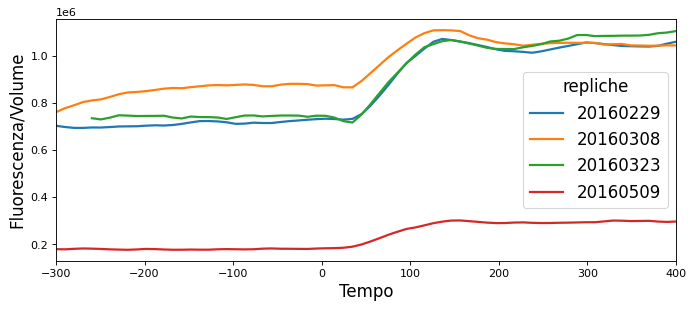

In [21]:
#P1longori plot di tutte le repliche
fig=plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot( )

ax.set_xlabel("Tempo", fontsize=15)
ax.set_ylabel('Fluorescenza/Volume', fontsize=15)

for i in p1longori3_index_sbagliato:
    df_p1longori=read_replica_tot('P1longori3',i)
    t_bin_mean=bin_mean(df_p1longori.tTrans,(df_p1longori.Itot/df_p1longori.V),10,20,-300,400,interval='custom')
    ax.set_xlim(-300,400)
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=2, label= str(i))
    ax.legend(fontsize=15, title='repliche',title_fontsize=15)

In [22]:
df_p1longori.tTrans.max()-df_p1longori.tTrans.min()

1021.45

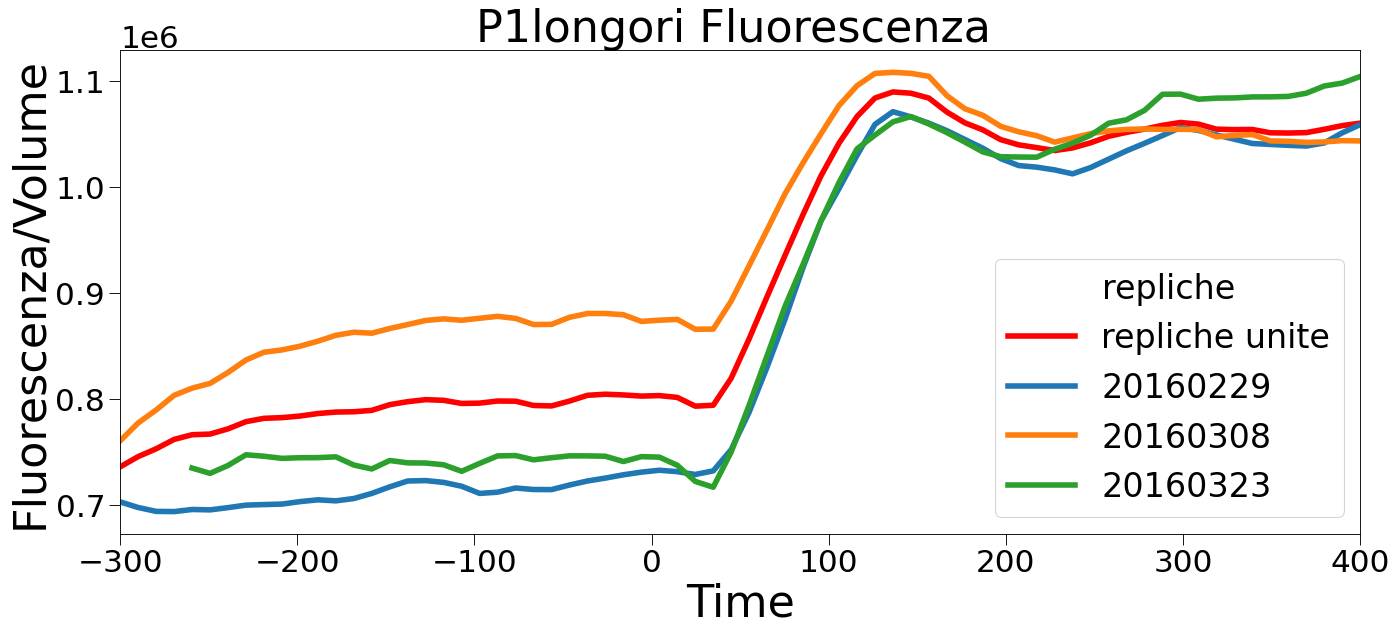

In [23]:
#P1longori plot di tutte le repliche
fig=plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1 )
ax.set_xlabel("Time", fontsize=40)
ax.set_ylabel('Fluorescenza/Volume', fontsize=40)
ax.tick_params(which='major', length=10, labelsize=28)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.yaxis.offsetText.set_fontsize(28)


ax.set_title('P1longori Fluorescenza ', fontsize=40)


unified_p1longori=unify_replicas_tot('P1longori3', p1longori3_index)
t_bin_mean=bin_mean(unified_p1longori.tTrans,(unified_p1longori.Itot/unified_p1longori.V),10,20,-300,400,interval='custom')
ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, 'r-',markersize=5, linewidth=5,label= 'repliche unite')


for i in p1longori3_index:
    df_p1longori=read_replica_tot('P1longori3',i)
    t_bin_mean=bin_mean(df_p1longori.tTrans,(df_p1longori.Itot/df_p1longori.V),10,20,-300,400,interval='custom')
    ax.set_xlim(-300,400)
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=5, linewidth=5, label= str(i))
    ax.legend(fontsize=30, title='repliche',title_fontsize=30)


#ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=4, label= 'repliche unificate')

    
#plt.savefig('/home/valerio/tesi/data_managment/P1longori_replicas1.pdf')

In [24]:
markers=['^','o','X']
colors=['tab:red','tab:orange','tab:green']

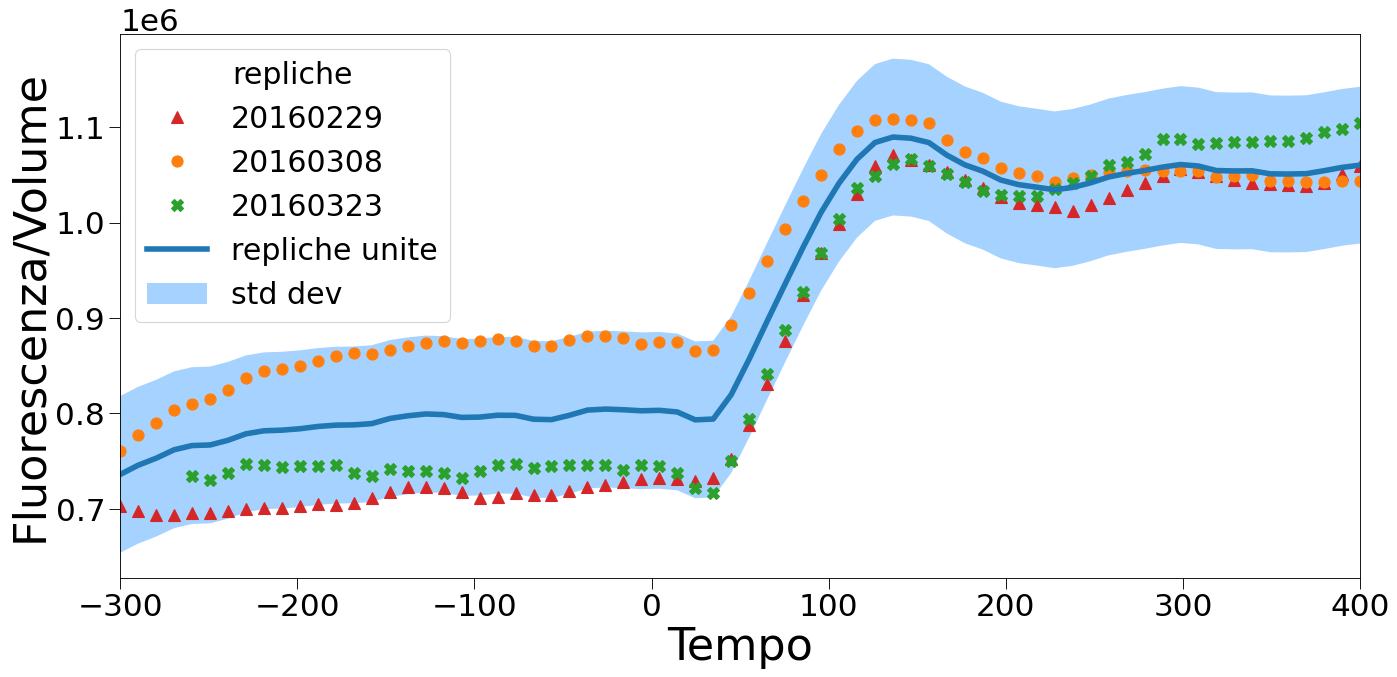

In [25]:
#P1longori plot di tutte le repliche
fig=plt.figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1 )
ax.set_xlabel("Tempo", fontsize=40)
ax.set_ylabel('Fluorescenza/Volume', fontsize=40)
ax.tick_params(which='major', length=10, labelsize=28)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.yaxis.offsetText.set_fontsize(28)

#ax.set_title('P1longori Fluorescenza ', fontsize=40)


unified_p1longori=unify_replicas_tot('P1longori3', p1longori3_index)

k=0

for i in p1longori3_index:
    df_p1longori=read_replica_tot('P1longori3',i)
    t_bin_mean=bin_mean(df_p1longori.tTrans,(df_p1longori.Itot/df_p1longori.V),10,20,-300,400,interval='custom')
    ax.set_xlim(-300,400)
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, markers[k],color=colors[k],markersize=10,
            linewidth=2, label= str(i))
    k=k+1

t_bin_mean=bin_mean(unified_p1longori.tTrans,(unified_p1longori.Itot/unified_p1longori.V),10,20,-300,400,interval='custom')

ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-', color='tab:blue',markersize=5, linewidth=5,label= 'repliche unite')

t_bin_std_dev=scipy.stats.binned_statistic(unified_p1longori.tTrans, (unified_p1longori.Itot/unified_p1longori.V)
                                           , statistic='std', bins=175)


ax.fill_between(np.linspace(-300,400,len(t_bin_mean)), t_bin_mean+(t_bin_std_dev[0].min()),
                t_bin_mean-(t_bin_std_dev[0].min()), facecolor='dodgerblue', alpha=0.4, label='std dev')

ax.legend(fontsize=27, title='repliche',title_fontsize=27)
#ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=4, label= 'repliche unificate')

    
plt.savefig('/home/valerio/tesi/data_managment/P1longori_replicas1.pdf')

In [26]:
t_bin_std_dev[0].mean()

116295.14570642037

In [27]:
# #P1longori plot di tutte le repliche
# fig=plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1,1,1 )
# ax.set_xlabel("Time", fontsize=40)
# ax.set_ylabel('Fluorescenza/Volume', fontsize=40)
# ax.tick_params(which='major', length=10, labelsize=25)
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

# unified_p1longori=unify_replicas_tot('P1longori3', p1longori3_index[0:3:2])
# t_bin_mean=bin_mean(unified_p1longori.tTrans,(unified_p1longori.Itot/unified_p1longori.V),10,20,-300,400,interval='custom')
# ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, 'r-',markersize=4, linewidth=4, label= 'unified replicas')
# ax.set_title('P1longori Fluorescenza ', fontsize=30)


# for i in p1longori3_index[0:3:2]:
#     df_p1longori=read_replica_tot('P1longori3',i)
#     t_bin_mean=bin_mean(df_p1longori.tTrans,(df_p1longori.Itot/df_p1longori.V),10,20,-300,400,interval='custom')
#     ax.set_xlim(-300,400)
#     ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=3, label= str(i))
#     ax.legend(fontsize=30, title='replicas',title_fontsize=30)


# #ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=4, label= 'repliche unificate')

    
# plt.savefig('/home/valerio/tesi/data_managment/P1longori_replicas2.pdf')

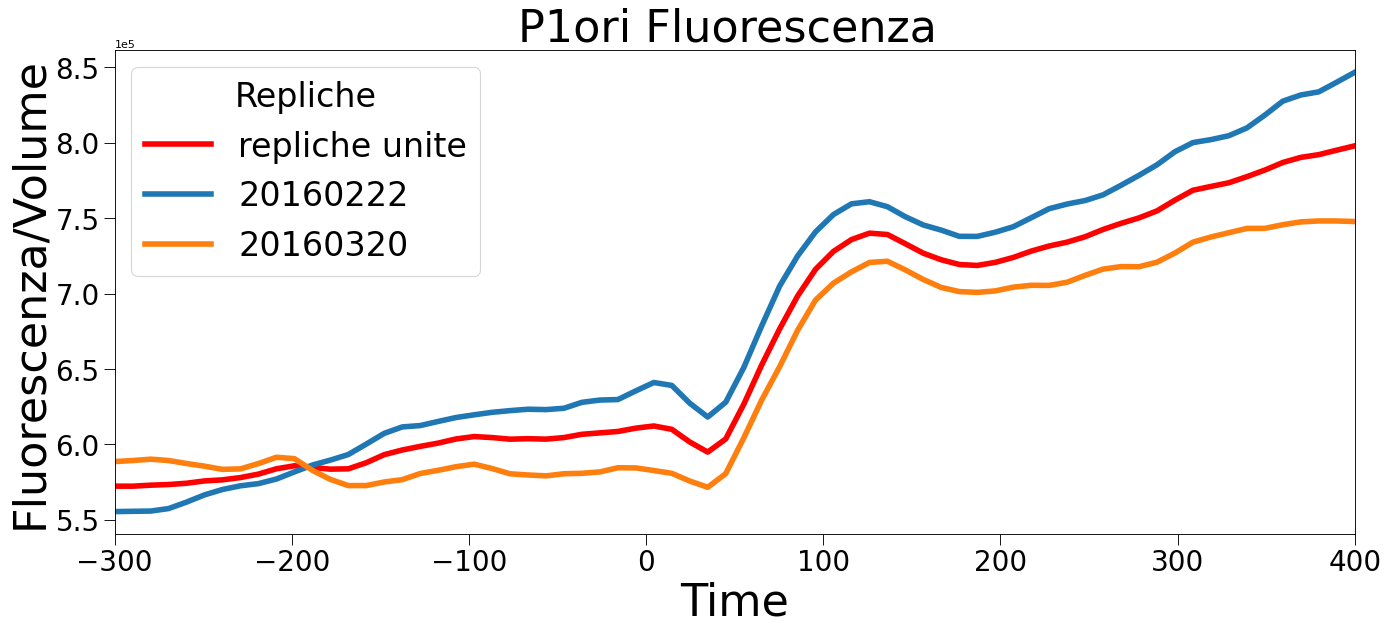

In [28]:
#VARIANTE INGLESE
fig=plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1 )
ax.set_xlabel("Time", fontsize=40)
ax.set_ylabel('Fluorescenza/Volume', fontsize=40)
ax.tick_params(which='major', length=10, labelsize=25)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_title('P1ori Fluorescenza ', fontsize=40)


unified_p1ori=unify_replicas_tot('P1ori3', p1ori3_index)

t_bin_mean=bin_mean(unified_p1ori.tTrans,(unified_p1ori.Itot/unified_p1ori.V),10,20,-300,400,interval='custom')
ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, 'r-',markersize=4, linewidth=5, label= 'repliche unite')


for i in p1ori3_index:
    df_p1longori=read_replica_tot('P1ori3',i)
    t_bin_mean=bin_mean(df_p1longori.tTrans,(df_p1longori.Itot/df_p1longori.V),10,20,-300,400,interval='custom')
    ax.set_xlim(-300,400)
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=5, label= str(i))
    ax.legend(fontsize=30, title='Repliche',title_fontsize=30)

#plt.savefig('/home/valerio/tesi/data_managment/P1ori_replicas.pdf')

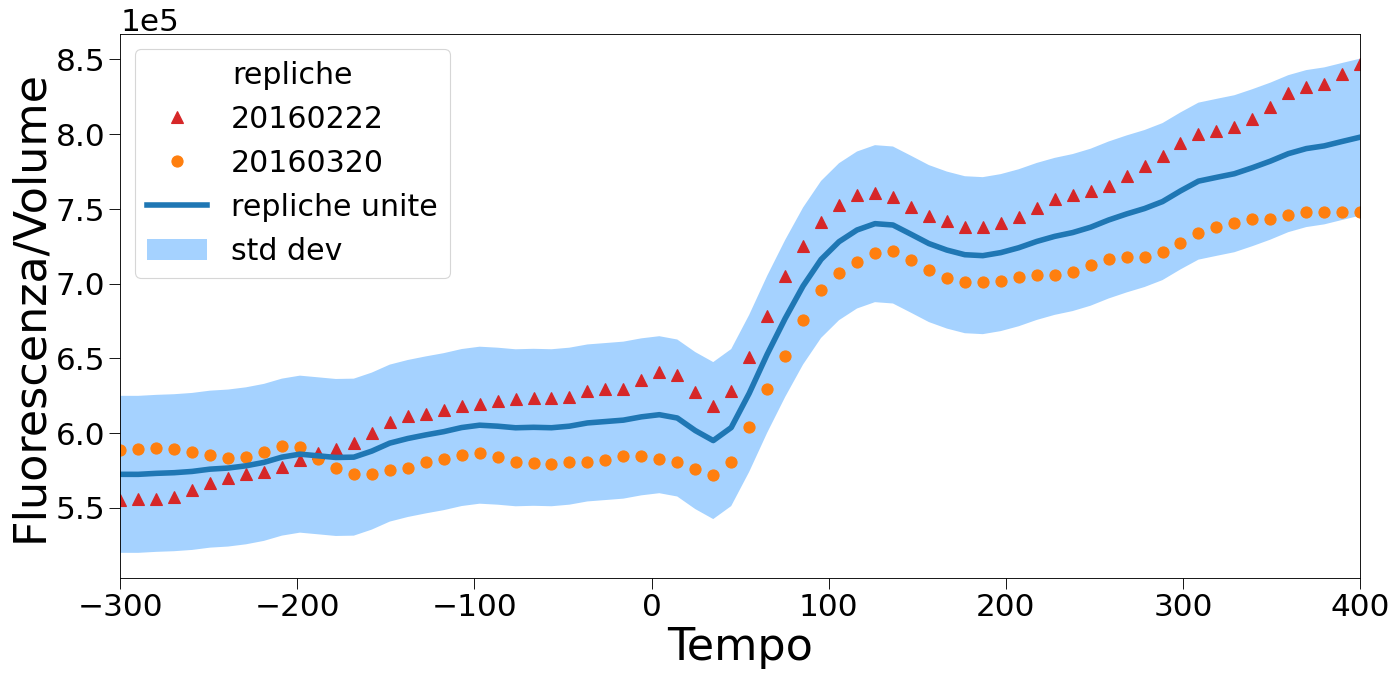

In [29]:
#p1ori plot di tutte le repliche
fig=plt.figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1 )
ax.set_xlabel("Tempo", fontsize=40)
ax.set_ylabel('Fluorescenza/Volume', fontsize=40)
ax.tick_params(which='major', length=10, labelsize=28)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.yaxis.offsetText.set_fontsize(28)

#ax.set_title('p1ori Fluorescenza ', fontsize=40)


unified_p1ori=unify_replicas_tot('P1ori3', p1ori3_index)

k=0

for i in p1ori3_index:
    df_p1ori=read_replica_tot('P1ori3',i)
    t_bin_mean=bin_mean(df_p1ori.tTrans,(df_p1ori.Itot/df_p1ori.V),10,20,-300,400,interval='custom')
    ax.set_xlim(-300,400)
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, markers[k],color=colors[k],markersize=10,
            linewidth=2, label= str(i))
    k=k+1

t_bin_mean=bin_mean(unified_p1ori.tTrans,(unified_p1ori.Itot/unified_p1ori.V),10,20,-300,400,interval='custom')

ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-', color='tab:blue',markersize=5, linewidth=5,label= 'repliche unite')

t_bin_std_dev=scipy.stats.binned_statistic(unified_p1ori.tTrans, (unified_p1ori.Itot/unified_p1ori.V)
                                           , statistic='std', bins=175)


ax.fill_between(np.linspace(-300,400,len(t_bin_mean)), t_bin_mean+(t_bin_std_dev[0].min()),
                t_bin_mean-(t_bin_std_dev[0].min()), facecolor='dodgerblue', alpha=0.4, label='std dev')

ax.legend(fontsize=27, title='repliche',title_fontsize=27)
#ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=4, label= 'repliche unificate')

    
plt.savefig('/home/valerio/tesi/data_managment/p1ori_replicas1.pdf')

In [30]:
t_bin_std_dev[0].min()

52551.78518992897

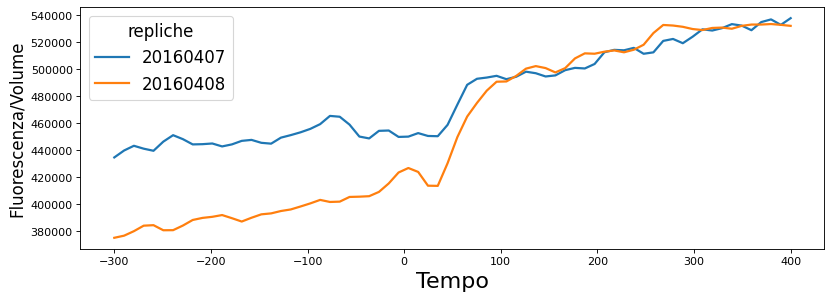

In [31]:
#plot correto P1longter repliche

fig=plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot( )
ax.set_xlabel("Tempo", fontsize=20)
ax.set_ylabel('Fluorescenza/Volume', fontsize=15)


for i in p1longter3_index:
    df_p1longter=read_replica_tot('P1longter3',i)
    t_bin_mean=bin_mean(df_p1longter.tTrans,(df_p1longter.Itot/df_p1longter.V),10,20,-300,400,interval='custom')
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-' ,markersize=4,linewidth=2, label= str(i))
    ax.legend(fontsize=15, title='repliche',title_fontsize=15)

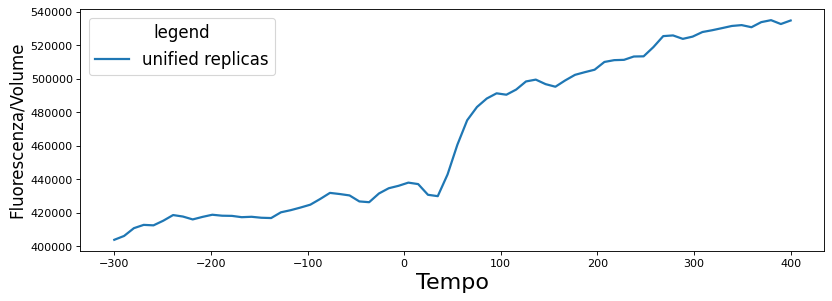

In [32]:
#plot correto P1longter repliche unificate

fig=plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot( )
ax.set_xlabel("Tempo", fontsize=20)
ax.set_ylabel('Fluorescenza/Volume', fontsize=15)

unified_p1longter=unify_replicas_tot('P1longter3', p1longter3_index)

t_bin_mean=bin_mean(unified_p1longter.tTrans,(unified_p1longter.Itot/unified_p1longter.V),10,20,-300,400,interval='custom')
ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=2, label= 'unified replicas')
ax.legend(fontsize=15, title='legend',title_fontsize=15)

# P1ter mi sembra strano...

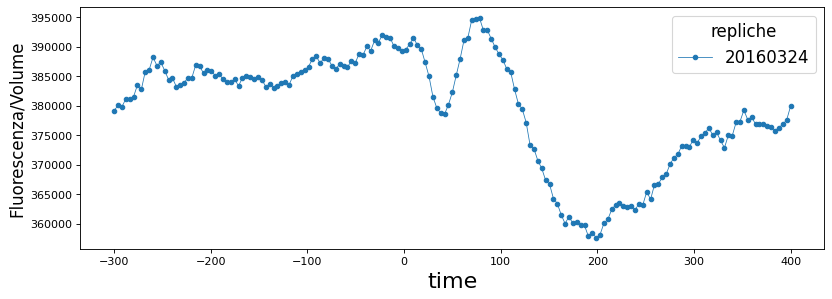

In [33]:
#plot correto P1ter repliche

fig=plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot( )
ax.set_xlabel("time", fontsize=20)
ax.set_ylabel('Fluorescenza/Volume', fontsize=15)
#ax.set_xlim(-100,200)

for i in p1ter3_index:
    df_p1ter=read_replica_tot('P1ter3',i)
    t_bin_mean=bin_mean(df_p1ter.tTrans,(df_p1ter.Itot/df_p1ter.V),4,20,-300,400,interval='custom')
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, 'o-' ,markersize=4,linewidth=0.7, label= str(i))
    ax.legend(fontsize=15, title='repliche',title_fontsize=15)

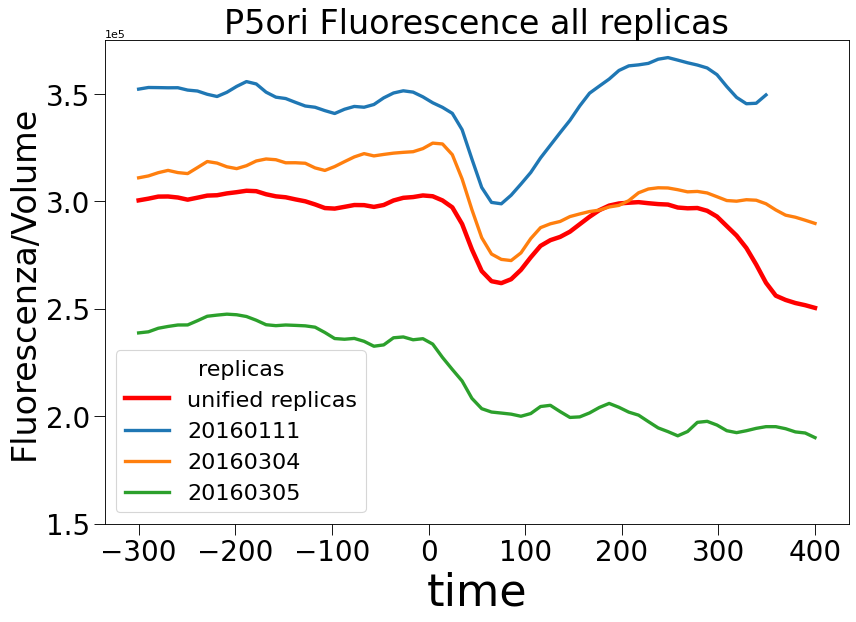

In [34]:
#plot correto P5ori repliche

fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot( )
ax.set_xlabel("time", fontsize=40)
ax.set_ylabel('Fluorescenza/Volume', fontsize=30)

ax.set_title('P5ori Fluorescence all replicas', fontsize=30)

ax.set_ylim(150000,375000)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.tick_params(which='major', length=10, labelsize=25)


unified_p5ori=unify_replicas_tot('P5ori3', p5ori3_index)

t_bin_mean=bin_mean(unified_p5ori.tTrans,(unified_p5ori.Itot/unified_p5ori.V),10,20,-300,400,interval='custom')
ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, 'r-',markersize=4, linewidth=4, label= 'unified replicas')

for i in p5ori3_index:
    df_p5ori=read_replica_tot('P5ori3',i)
    t_bin_mean=bin_mean(df_p5ori.tTrans,(df_p5ori.Itot/df_p5ori.V),10,20,-300,400,interval='custom')
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-' ,markersize=4,linewidth=3, label= str(i))
    ax.legend(fontsize=20, title='replicas',title_fontsize=20)
    
#plt.savefig('/home/valerio/tesi/data_managment/P5ori_replicas1.pdf')

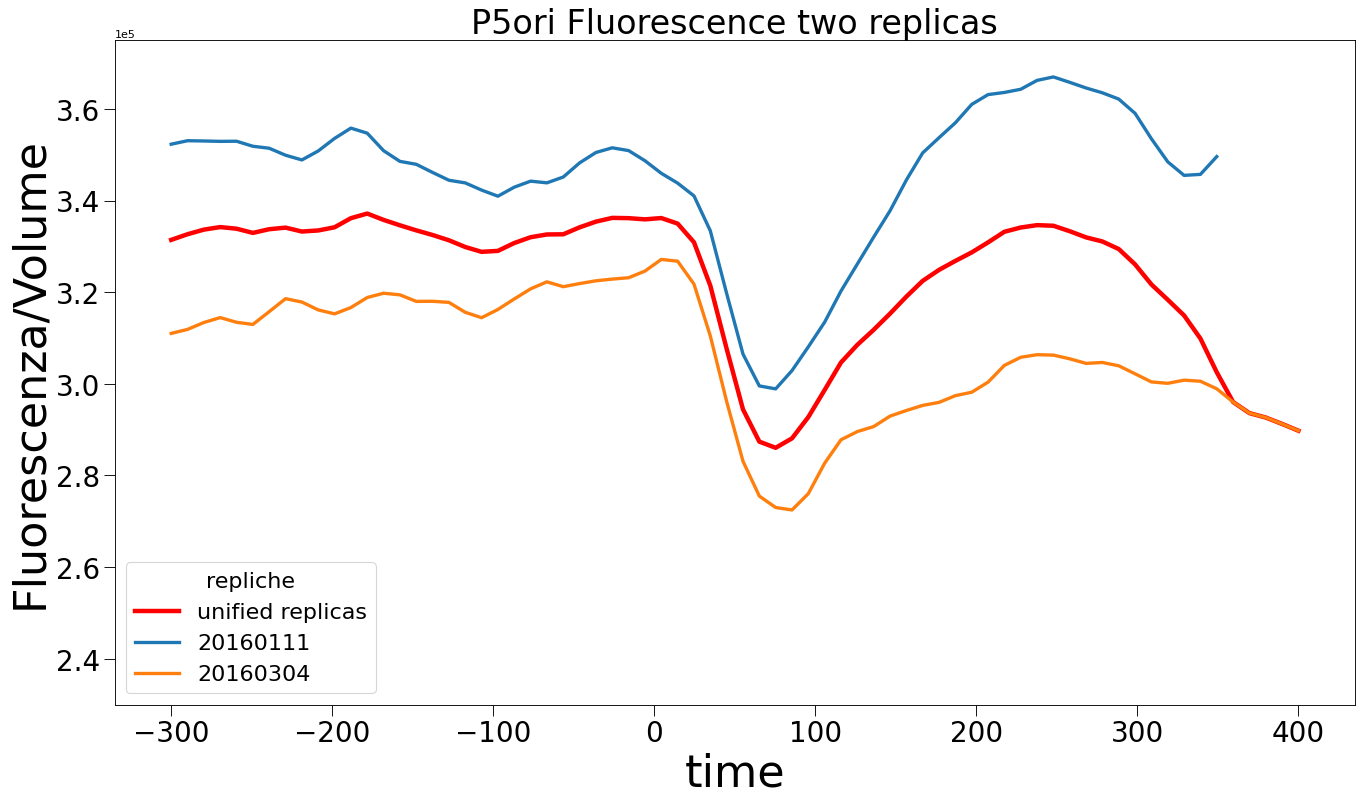

In [35]:
#plot correto P5ori repliche

fig=plt.figure(num=None, figsize=(20, 11), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot( )
ax.set_xlabel("time", fontsize=40)
ax.set_ylabel('Fluorescenza/Volume', fontsize=40)

ax.set_title('P5ori Fluorescence two replicas', fontsize=30)

ax.set_ylim(230000,375000)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.tick_params(which='major', length=10, labelsize=25)


unified_p5ori=unify_replicas_tot('P5ori3', p5ori3_index[:-1])

t_bin_mean=bin_mean(unified_p5ori.tTrans,(unified_p5ori.Itot/unified_p5ori.V),10,20,-300,400,interval='custom')
ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, 'r-',markersize=4, linewidth=4, label= 'unified replicas')

for i in p5ori3_index[:-1]:
    df_p5ori=read_replica_tot('P5ori3',i)
    t_bin_mean=bin_mean(df_p5ori.tTrans,(df_p5ori.Itot/df_p5ori.V),10,20,-300,400,interval='custom')
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-' ,markersize=4,linewidth=3, label= str(i))
    ax.legend(fontsize=20, title='repliche',title_fontsize=20)
    
    #plt.savefig('/home/valerio/tesi/data_managment/P5ori_replicas2.pdf')

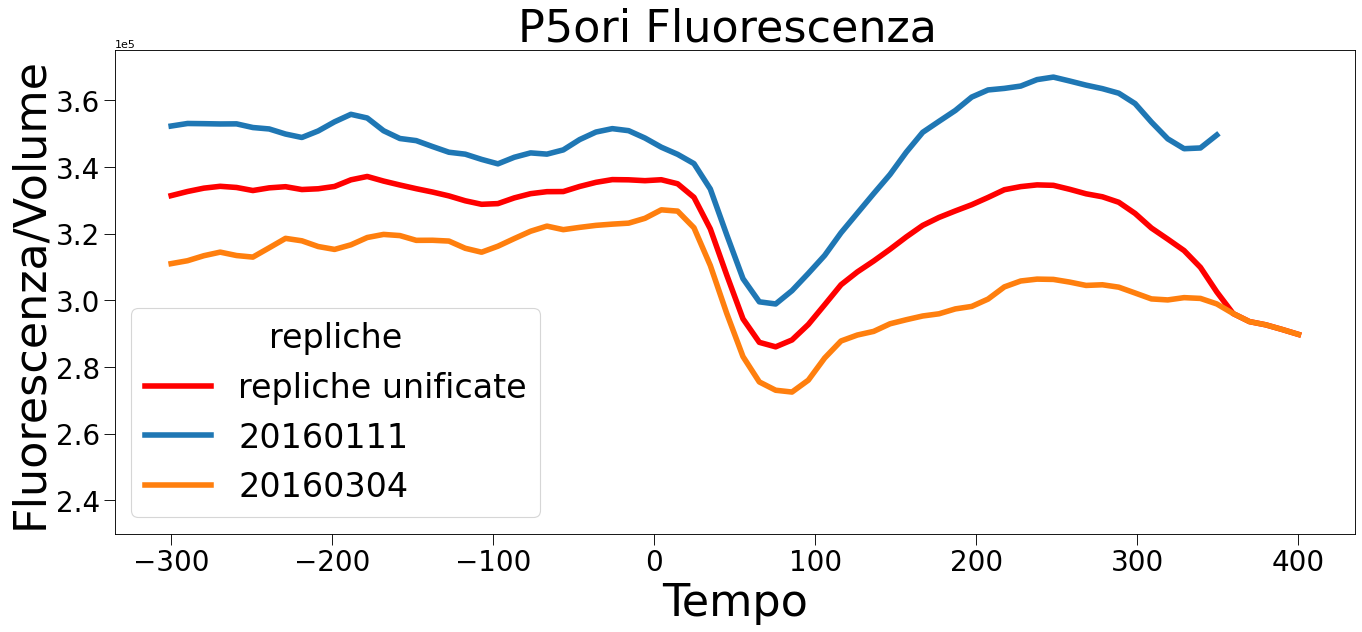

In [36]:
#plot correto P5ori repliche

fig=plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot( )
ax.set_xlabel("Tempo", fontsize=40)
ax.set_ylabel('Fluorescenza/Volume', fontsize=40)

ax.set_title('P5ori Fluorescenza ', fontsize=40)

ax.set_ylim(230000,375000)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.tick_params(which='major', length=10, labelsize=25)


unified_p5ori=unify_replicas_tot('P5ori3', p5ori3_index[:-1])

t_bin_mean=bin_mean(unified_p5ori.tTrans,(unified_p5ori.Itot/unified_p5ori.V),10,20,-300,400,interval='custom')
ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, 'r-',markersize=4, linewidth=5, label= 'repliche unificate')

for i in p5ori3_index[:-1]:
    df_p5ori=read_replica_tot('P5ori3',i)
    t_bin_mean=bin_mean(df_p5ori.tTrans,(df_p5ori.Itot/df_p5ori.V),10,20,-300,400,interval='custom')
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-' ,markersize=4,linewidth=5, label= str(i))
    ax.legend(fontsize=30, title='repliche',title_fontsize=30)
    
plt.savefig('/home/valerio/tesi/data_managment/P5ori_replicas2.pdf')

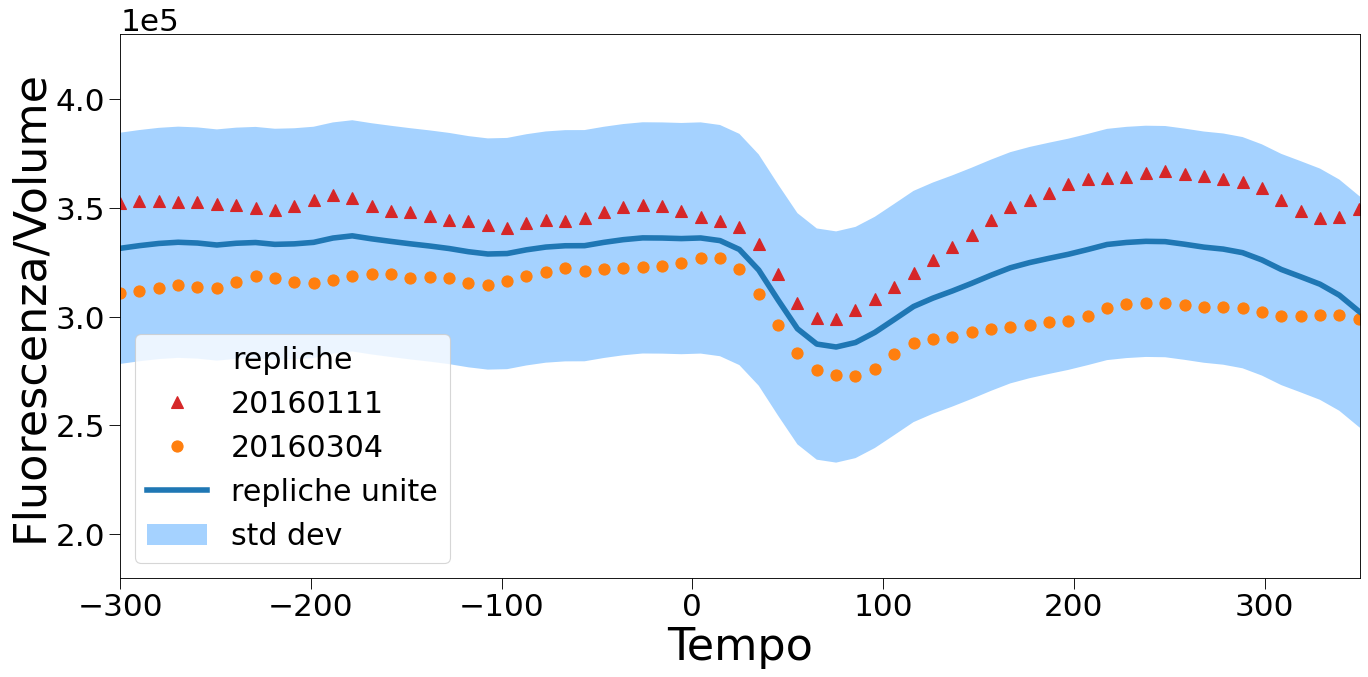

In [37]:
#p5ori plot di tutte le repliche
fig=plt.figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1 )
ax.set_xlabel("Tempo", fontsize=40)
ax.set_ylabel('Fluorescenza/Volume', fontsize=40)
ax.tick_params(which='major', length=10, labelsize=28)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.yaxis.offsetText.set_fontsize(28)

#ax.set_title('p5ori Fluorescenza ', fontsize=40)
ax.set_xlim(-300,350)
ax.set_ylim(1.8e5, 4.3e5)


unified_p5ori=unify_replicas_tot('P5ori3', p5ori3_index[:-1])

k=0

for i in p5ori3_index[:-1]:
    df_p5ori=read_replica_tot('P5ori3',i)
    t_bin_mean=bin_mean(df_p5ori.tTrans,(df_p5ori.Itot/df_p5ori.V),10,20,-300,400,interval='custom')
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, markers[k],color=colors[k],markersize=10,
            linewidth=2, label= str(i))
    k=k+1

t_bin_mean=bin_mean(unified_p5ori.tTrans,(unified_p5ori.Itot/unified_p5ori.V),10,20,-300,400,interval='custom')

ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-', color='tab:blue',markersize=5, linewidth=5,label= 'repliche unite')

t_bin_std_dev=scipy.stats.binned_statistic(unified_p5ori.tTrans, (unified_p5ori.Itot/unified_p5ori.V)
                                           , statistic='std', bins=175)


ax.fill_between(np.linspace(-300,400,len(t_bin_mean)), t_bin_mean+(t_bin_std_dev[0].min()),
                t_bin_mean-(t_bin_std_dev[0].min()), facecolor='dodgerblue', alpha=0.4, label='std dev')

ax.legend(fontsize=27, title='repliche',title_fontsize=27)
#ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=4, label= 'repliche unificate')

    
plt.savefig('/home/valerio/tesi/data_managment/p5ori_replicas1.pdf')

In [38]:
t_bin_std_dev[0].min()

53170.6008503336

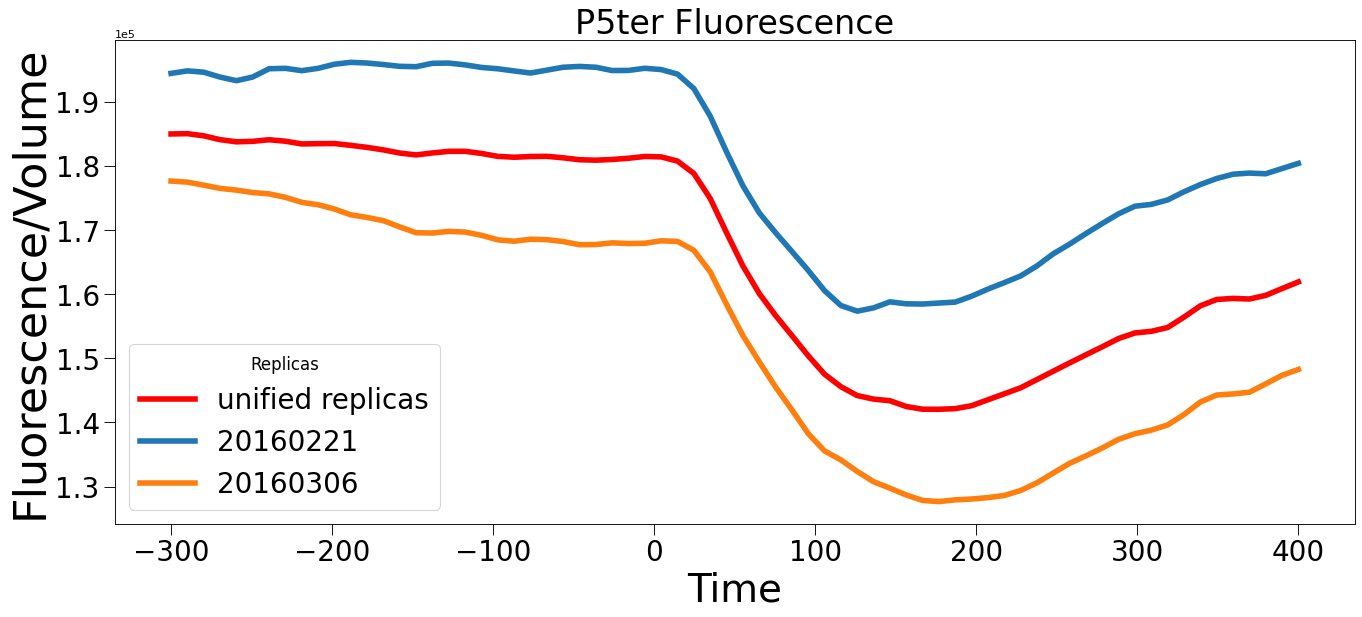

In [39]:
#plot correto P5ter repliche inglese

fig=plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1 )
ax.set_xlabel("Time", fontsize=35)
ax.set_ylabel('Fluorescence/Volume', fontsize=40)
ax.tick_params(which='major', length=10, labelsize=25)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('P5ter Fluorescence', fontsize=30)


unified_p5ter=unify_replicas_tot('P5ter3', p5ter3_index)

t_bin_mean=bin_mean(unified_p5ter.tTrans,(unified_p5ter.Itot/unified_p5ter.V),10,20,-300,400,interval='custom')
ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, 'r-',markersize=4, linewidth=5, label= 'unified replicas')


for i in p5ter3_index:
    df_p5ori=read_replica_tot('P5ter3',i)
    t_bin_mean=bin_mean(df_p5ori.tTrans,(df_p5ori.Itot/df_p5ori.V),10,20,-300,400,interval='custom')
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-' ,markersize=4,linewidth=5, label= str(i))
    ax.legend(fontsize=25, title='Replicas',title_fontsize=15)

#plt.savefig('/home/valerio/tesi/data_managment/P5ter_replicas.pdf')

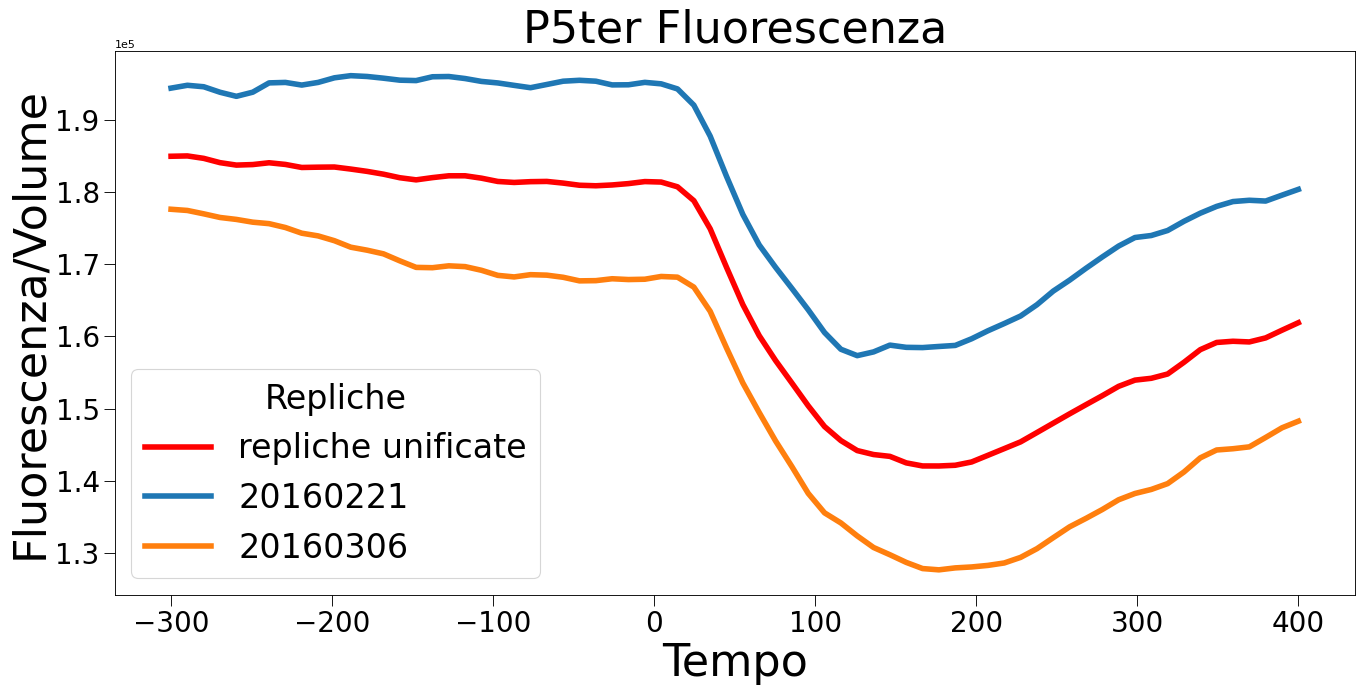

In [40]:
#plot correto P5ter repliche inglese

fig=plt.figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1 )
ax.set_xlabel("Tempo", fontsize=40)
ax.set_ylabel('Fluorescenza/Volume', fontsize=40)
ax.tick_params(which='major', length=10, labelsize=25)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('P5ter Fluorescenza', fontsize=40)


unified_p5ter=unify_replicas_tot('P5ter3', p5ter3_index)

t_bin_mean=bin_mean(unified_p5ter.tTrans,(unified_p5ter.Itot/unified_p5ter.V),10,20,-300,400,interval='custom')
ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, 'r-',markersize=4, linewidth=5, label= 'repliche unificate')


for i in p5ter3_index:
    df_p5ori=read_replica_tot('P5ter3',i)
    t_bin_mean=bin_mean(df_p5ori.tTrans,(df_p5ori.Itot/df_p5ori.V),10,20,-300,400,interval='custom')
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-' ,markersize=4,linewidth=5, label= str(i))
    ax.legend(fontsize=30, title='Repliche',title_fontsize=30)

#plt.savefig('/home/valerio/tesi/data_managment/P5ter_replicas.pdf')

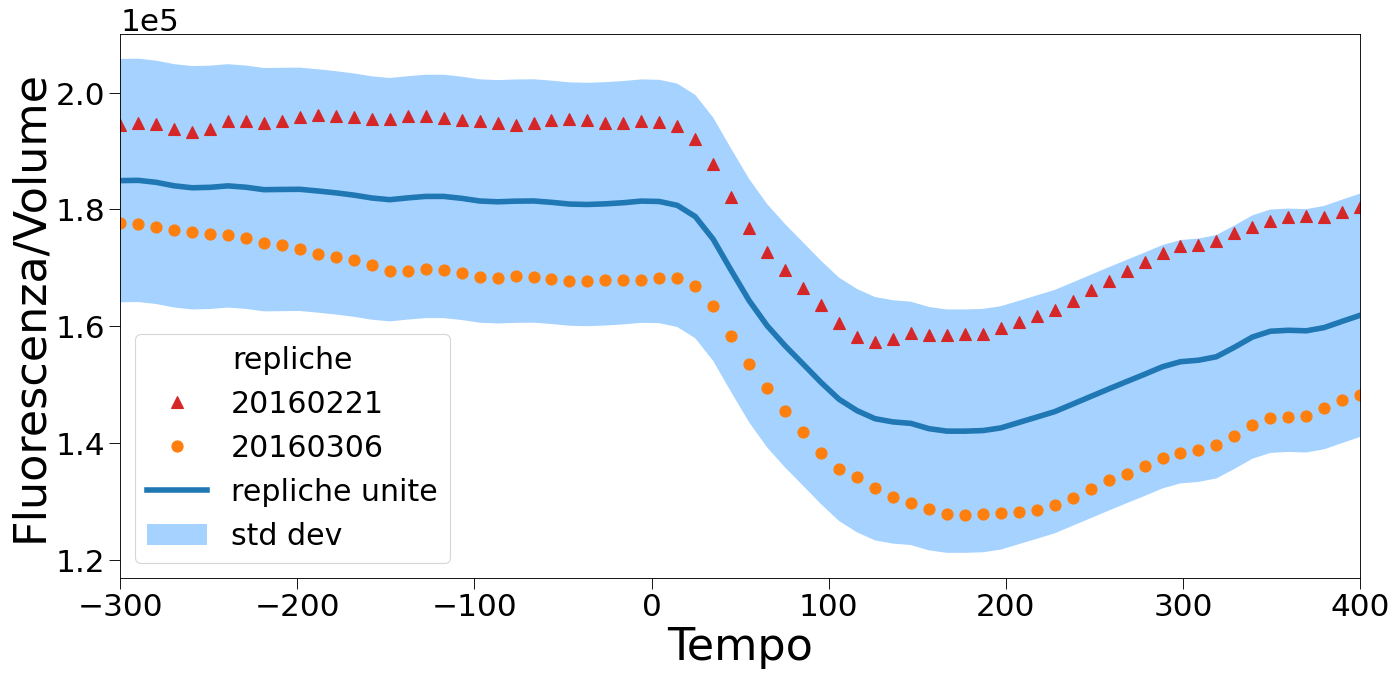

In [41]:
#p5ter plot di tutte le repliche
fig=plt.figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1 )
ax.set_xlabel("Tempo", fontsize=40)
ax.set_ylabel('Fluorescenza/Volume', fontsize=40)
ax.tick_params(which='major', length=10, labelsize=28)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.yaxis.offsetText.set_fontsize(28)

#ax.set_title('p5ter Fluorescenza ', fontsize=40)


unified_p5ter=unify_replicas_tot('P5ter3', p5ter3_index)

k=0

for i in p5ter3_index:
    df_p5ter=read_replica_tot('P5ter3',i)
    t_bin_mean=bin_mean(df_p5ter.tTrans,(df_p5ter.Itot/df_p5ter.V),10,20,-300,400,interval='custom')
    ax.set_xlim(-300,400)
    ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, markers[k],color=colors[k],markersize=10,
            linewidth=2, label= str(i))
    k=k+1

t_bin_mean=bin_mean(unified_p5ter.tTrans,(unified_p5ter.Itot/unified_p5ter.V),10,20,-300,400,interval='custom')

ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-', color='tab:blue',markersize=5, linewidth=5,label= 'repliche unite')

t_bin_std_dev=scipy.stats.binned_statistic(unified_p5ter.tTrans, (unified_p5ter.Itot/unified_p5ter.V)
                                           , statistic='std', bins=175)


ax.fill_between(np.linspace(-300,400,len(t_bin_mean)), t_bin_mean+(t_bin_std_dev[0].min()),
                t_bin_mean-(t_bin_std_dev[0].min()), facecolor='dodgerblue', alpha=0.4, label='std dev')

ax.legend(fontsize=27, title='repliche',title_fontsize=27)
#ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=4, label= 'repliche unificate')

    
plt.savefig('/home/valerio/tesi/data_managment/p5ter_replicas1.pdf')

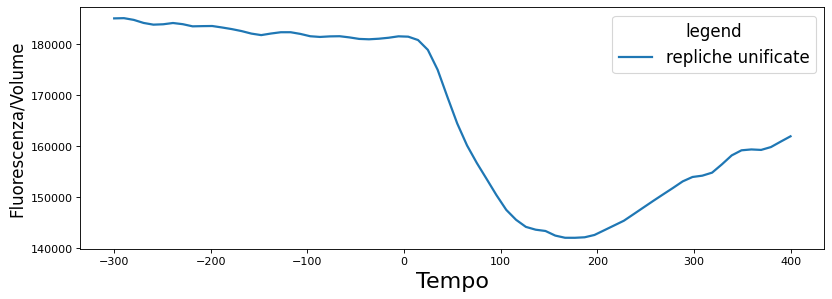

In [42]:
#plot correto p5ter repliche unificate

fig=plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot( )
ax.set_xlabel("Tempo", fontsize=20)
ax.set_ylabel('Fluorescenza/Volume', fontsize=15)

unified_p5ter=unify_replicas_tot('P5ter3', p5ter3_index)

t_bin_mean=bin_mean(unified_p5ter.tTrans,(unified_p5ter.Itot/unified_p5ter.V),10,20,-300,400,interval='custom')
ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=2, label= 'repliche unificate')
ax.legend(fontsize=15, title='legend',title_fontsize=15)

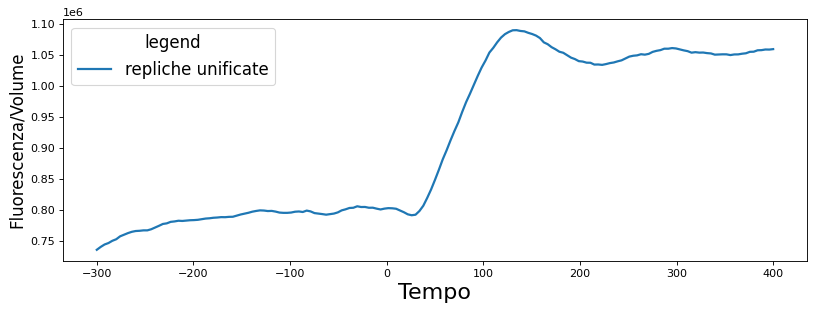

In [43]:
#plot correto p5ter repliche unificate

fig=plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot( )
ax.set_xlabel("Tempo", fontsize=20)
ax.set_ylabel('Fluorescenza/Volume', fontsize=15)

unified_p5ter=unify_replicas_tot('P5ter3', p5ter3_index)

t_bin_mean=bin_mean(unified_p1longori.tTrans,(unified_p1longori.Itot/unified_p1longori.V),4,20,-300,400,interval='custom')

ax.plot(np.linspace(-300,400,len(t_bin_mean)),t_bin_mean, '-',markersize=4, linewidth=2, label= 'repliche unificate')
ax.legend(fontsize=15, title='legend',title_fontsize=15)

In [44]:
#FACCIO UN DATASET CON FLUORESCENZA BINNATA+STD DEV
p1longori_fluo_mean=bin_mean(unified_p1longori.tTrans,(unified_p1longori.Itot/unified_p1longori.V),4,20,-300,400,interval='custom')
p1longori_fluo_std_dev=scipy.stats.binned_statistic(unified_p1longori.tTrans, (unified_p1longori.Itot/unified_p1longori.V)
                                           , statistic='std', bins=175)
p1ori_fluo_mean=bin_mean(unified_p1ori.tTrans,(unified_p1ori.Itot/unified_p1ori.V),4,20,-300,400,interval='custom')
p1ori_fluo_std_dev=scipy.stats.binned_statistic(unified_p1ori.tTrans, (unified_p1ori.Itot/unified_p1ori.V)
                                           , statistic='std', bins=175)
p5ori_fluo_mean=bin_mean(unified_p5ori.tTrans,(unified_p5ori.Itot/unified_p5ori.V),4,20,-300,400,interval='custom')
p5ori_fluo_std_dev=scipy.stats.binned_statistic(unified_p5ori.tTrans, (unified_p5ori.Itot/unified_p5ori.V)
                                           , statistic='std', bins=175)
p5ter_fluo_mean=bin_mean(unified_p5ter.tTrans,(unified_p5ter.Itot/unified_p5ter.V),4,20,-300,400,interval='custom')
p5ter_fluo_std_dev=scipy.stats.binned_statistic(unified_p5ter.tTrans, (unified_p5ter.Itot/unified_p5ter.V)
                                           , statistic='std', bins=175)
p1longter_fluo_mean=bin_mean(unified_p1longter.tTrans,(unified_p1longter.Itot/unified_p1longter.V),4,20,-300,400,interval='custom')
p1longter_fluo_std_dev=scipy.stats.binned_statistic(unified_p1longter.tTrans, (unified_p1longter.Itot/unified_p1longter.V)
                                           , statistic='std', bins=175)


In [45]:
len(p1ori_fluo_mean)

175

In [46]:
df_fluo_unified=pd.DataFrame()

In [49]:

df_fluo_unified['p1ori_fluo']=p1ori_fluo_mean
df_fluo_unified['p1ori_std_dev']=p1ori_fluo_std_dev[0]

df_fluo_unified['p1longori_fluo']=p1longori_fluo_mean
df_fluo_unified['p1longori_std_dev']=p1longori_fluo_std_dev[0]

df_fluo_unified['p5ter_fluo']=p5ter_fluo_mean
df_fluo_unified['p5ter_std_dev']=p5ter_fluo_std_dev[0]

df_fluo_unified['p5ori_fluo']=p5ori_fluo_mean
df_fluo_unified['p5ori_std_dev']=p5ori_fluo_std_dev[0]

df_fluo_unified['p1longter_fluo']=p1longter_fluo_mean
df_fluo_unified['p1longter_std_dev']=p1longter_fluo_std_dev[0]

df_fluo_unified['time']=np.linspace(-300,400,175)

df_fluo_unified.to_csv(growth_path+'fluo_unified.csv')

In [48]:
unified_p1longori_new.to_csv(growth_path+'unified_p1longori.csv')
unified_p1ori_new.to_csv(growth_path+'unified_p1ori.csv')
unified_p5ori_new.to_csv(growth_path+'unified_p5ori.csv')
unified_p1longter_new.to_csv(growth_path+'unified_p1longter.csv')
unified_p5ter_new.to_csv(growth_path+'unified_p5ter.csv')


NameError: name 'unified_p1longori_new' is not defined

# in questa sezione faccio i plot delle fluorescenze, e facendo i fit della relazione ϕR+ϕP=1 trovo le costanti che legano fluorescenza su volume e settore


in particolare ϕR+ϕP=1 tramite calcoli diventa A1*(Ip1/Vp1)+A2*(Ip5/Vp5)=1, quindi fittando questa relazione con i dati che ho trovo le du costanti A1 e A2 che legano la fluorescenza ai settori


In [28]:
unified_p5ter=unify_replicas_tot('P5ter3', p5ter3_index)
unified_p5ori=unify_replicas_tot('P5ori3', p5ori3_index)
unified_p5ori_prova=unify_replicas_tot('P5ori3', p5ori3_index[:-1])


unified_p1ori=unify_replicas_tot('P1ori3', p1ori3_index)
unified_p1longori=unify_replicas_tot('P1longori3', p1longori3_index)
unified_p1longori_prova=unify_replicas_tot('P1longori3', p1longori3_index[0:3:2])

In [29]:
p5ter_fluo_mean=bin_mean(unified_p5ter.tTrans,(unified_p5ter.Itot/unified_p5ter.V),4,20,-300,400,interval='custom')
p5ori_fluo_mean=bin_mean(unified_p5ori.tTrans,(unified_p5ori.Itot/unified_p5ori.V),4,20,-300,400,interval='custom')
p5ori_fluo_mean_prova=bin_mean(unified_p5ori_prova.tTrans,(unified_p5ori_prova.Itot/unified_p5ori_prova.V),4,20,-300,400,interval='custom')


p1ori_fluo_mean=bin_mean(unified_p1ori.tTrans,(unified_p1ori.Itot/unified_p1ori.V),4,20,-300,400,interval='custom')
p1longori_fluo_mean=bin_mean(unified_p1longori.tTrans,(unified_p1longori.Itot/unified_p1longori.V),4,20,-300,400,interval='custom')
p1longori_fluo_mean_prova=bin_mean(unified_p1longori_prova.tTrans,(unified_p1longori_prova.Itot/unified_p1longori_prova.V),4,20,-300,400,interval='custom')


In [19]:
np.array(p1longori_fluo_mean_prova)-np.array(p1longori_fluo_mean)

array([-33070.1683222 , -39590.5370797 , -45347.73525757, -51758.63029346,
       -56856.31076074, -59010.8815402 , -63431.32689012, -65891.4087284 ,
       -66932.81199455, -66787.94606325, -68459.06533164, -67419.48779439,
       -66282.03542245, -66179.23899418, -64621.93118408, -64853.69628522,
       -64514.68762552, -64113.85411352, -63297.06285671, -65002.69489325,
       -64991.45452824, -64667.46086638, -66426.45351498, -65116.7346863 ,
       -66865.85771326, -65118.38263668, -65129.92780526, -64979.32308673,
       -66162.67096063, -66168.61277601, -67680.51011314, -70348.32904943,
       -69230.84646815, -70562.50854414, -70353.87386801, -69638.59501835,
       -68715.49692128, -68487.6931586 , -67739.60969142, -66362.81472664,
       -68051.85579156, -68509.43056559, -70389.98645817, -69040.77018721,
       -70972.71061682, -70923.84713799, -71235.91237439, -70849.36922643,
       -71423.20133175, -73479.29216749, -73744.42890925, -73279.63060745,
       -72334.07150699, -

# faccio il calcolo dei settori con varie combinazioni di proxies


In [30]:
#constant values p1ori p1long con p5ter
fluo_params_5t1o,pcov5t1o=scipy.optimize.curve_fit(fit_func_fluo, p5ter_fluo_mean, p1ori_fluo_mean ) 
fluo_params_5t1lo,pcov5t1lo=scipy.optimize.curve_fit(fit_func_fluo, p5ter_fluo_mean, p1longori_fluo_mean ) 
#constant values p1ori p1long con p5ori
fluo_params_5o1o,pcov5o1o=scipy.optimize.curve_fit(fit_func_fluo, p5ori_fluo_mean, p1ori_fluo_mean ) 
fluo_params_5o1lo,pcov5o1lo=scipy.optimize.curve_fit(fit_func_fluo, p5ori_fluo_mean, p1longori_fluo_mean ) 

In [31]:
#constant values p1ori p1long con p5ter
fluo_params_5t1lo_p,pcov5t1lo_p=scipy.optimize.curve_fit(fit_func_fluo, p5ter_fluo_mean, p1longori_fluo_mean_prova ) 
#constant values p1ori p1long con p5ori
fluo_params_5o1o_p,pcov5o1o_p=scipy.optimize.curve_fit(fit_func_fluo, p5ori_fluo_mean_prova, p1ori_fluo_mean ) 
fluo_params_5o1lo_p,pcov5o1lo_p=scipy.optimize.curve_fit(fit_func_fluo, p5ori_fluo_mean_prova, p1longori_fluo_mean ) 

In [32]:
fluo_params_5o1lo_p

array([2.40632490e-07, 1.02254079e-06])

In [33]:
fluo_params_5o1lo

array([2.48683842e-07, 1.11150867e-06])

In [34]:
# a questo punto, conosco le costanti, posso ricavare i settori
p1o_p5t_phi_r=fluo_params_5t1o[0]*np.array(p1ori_fluo_mean)
p1o_p5t_phi_p=fluo_params_5t1o[1]*np.array(p5ter_fluo_mean)

p1lo_p5t_phi_r=fluo_params_5t1lo[0]*np.array(p1longori_fluo_mean)
p1lo_p5t_phi_p=fluo_params_5t1lo[1]*np.array(p5ter_fluo_mean)

p1o_p5o_phi_r=fluo_params_5o1o[0]*np.array(p1ori_fluo_mean)
p1o_p5o_phi_p=fluo_params_5o1o[1]*np.array(p5ori_fluo_mean)

p1lo_p5o_phi_r=fluo_params_5o1lo[0]*np.array(p1longori_fluo_mean)
p1lo_p5o_phi_p=fluo_params_5o1lo[1]*np.array(p5ori_fluo_mean)


In [35]:
# PROVE

p1lo_p5t_phi_r_p=fluo_params_5t1lo_p[0]*np.array(p1longori_fluo_mean_prova)
p1lo_p5t_phi_p_p=fluo_params_5t1lo_p[1]*np.array(p5ter_fluo_mean)

p1o_p5o_phi_r_p=fluo_params_5o1o_p[0]*np.array(p1ori_fluo_mean)
p1o_p5o_phi_p_p=fluo_params_5o1o_p[1]*np.array(p5ori_fluo_mean_prova)

p1lo_p5o_phi_r_p=fluo_params_5o1lo_p[0]*np.array(p1longori_fluo_mean_prova)
p1lo_p5o_phi_p_p=fluo_params_5o1lo_p[1]*np.array(p5ori_fluo_mean_prova)


In [226]:
p1o_p5o_phi_p_p-p1o_p5o_phi_p

array([-4.02843645e-03, -4.07082160e-03, -4.04105990e-03, -3.51906246e-03,
       -3.84388440e-03, -3.74533853e-03, -3.61084934e-03, -3.38944995e-03,
       -3.05219926e-03, -3.11232805e-03, -3.07874658e-03, -2.76974888e-03,
       -2.65327402e-03, -2.21112130e-03, -2.99612484e-03, -3.10103147e-03,
       -3.19356292e-03, -3.57323434e-03, -4.05109738e-03, -4.21824681e-03,
       -4.85777083e-03, -5.12088828e-03, -5.44943356e-03, -5.58489793e-03,
       -5.89012766e-03, -5.51040854e-03, -5.32716423e-03, -4.74692307e-03,
       -3.90351398e-03, -3.44709546e-03, -3.06664292e-03, -2.61890837e-03,
       -2.96316965e-03, -2.77814811e-03, -2.78406883e-03, -2.94970828e-03,
       -3.31404773e-03, -3.58429760e-03, -3.60782959e-03, -3.72617693e-03,
       -3.46876419e-03, -3.61166107e-03, -3.49467043e-03, -3.36756387e-03,
       -3.38568367e-03, -3.46850945e-03, -2.64452613e-03, -2.35647473e-03,
       -2.38228580e-03, -2.43145704e-03, -2.16721014e-03, -1.75330652e-03,
       -1.52898480e-03, -

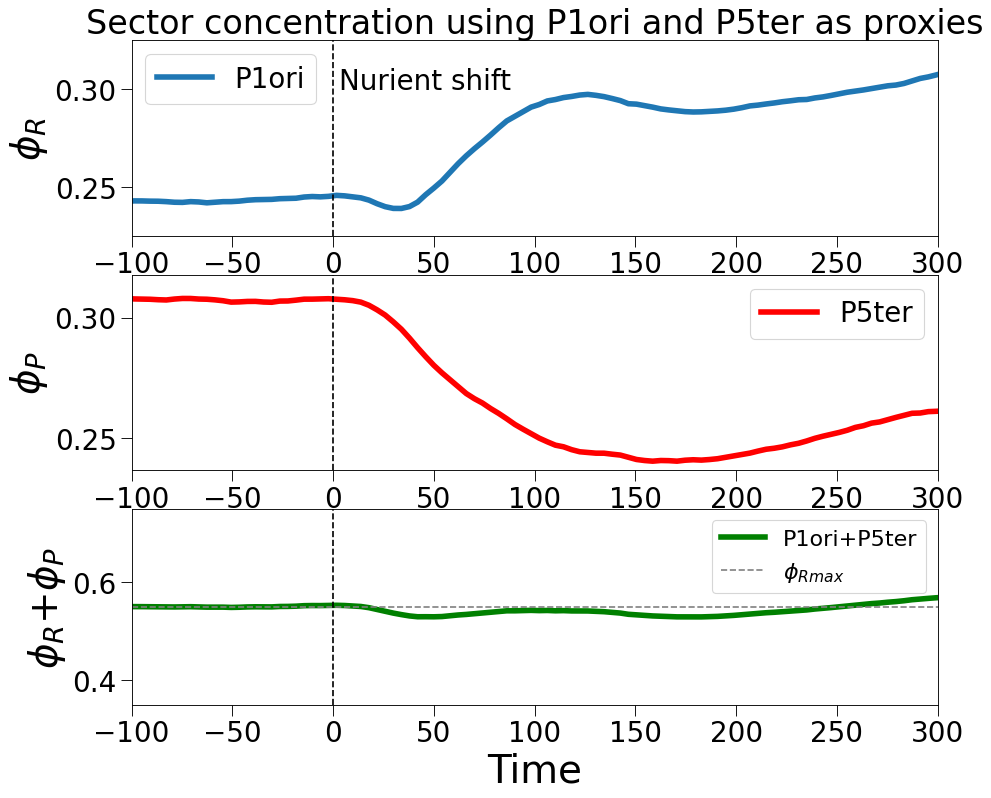

In [227]:
#VARIANTE INGLESE
fig=plt.figure(num=None, figsize=(13, 11), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(3,1,1)

#ax1.set_xlabel("Tempo", fontsize=15)
ax1.set_ylabel('$\phi_R$', fontsize=35)

ax1.set_xlim(-100,300)
ax1.set_title('Sector concentration using P1ori and P5ter as proxies', fontsize=30)

ax2 = fig.add_subplot(3,1,2)
#ax2.set_xlabel("Tempo", fontsize=15)
ax2.set_ylabel('$\phi_P$', fontsize=35)

ax2.set_xlim(-100,300)

ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel("Time", fontsize=35)
ax3.set_ylabel('$\phi_R$+$\phi_P$', fontsize=35)

ax3.set_xlim(-100,300)
ax3.set_ylim(0.35,0.75)

ax3.plot(np.linspace(-300,400,len(p1o_p5t_phi_r)),np.array(p1o_p5t_phi_p)+np.array(p1o_p5t_phi_r), 'g-',markersize=4, linewidth=5, label= 'P1ori+P5ter')
ax3.axhline(0.55, linestyle='--', color='grey', label='$\phi_{Rmax}$')
ax2.plot(np.linspace(-300,400,len(p1o_p5t_phi_p)),p1o_p5t_phi_p, 'r-',markersize=4, linewidth=5, label= 'P5ter')
ax1.plot(np.linspace(-300,400,len(p1o_p5t_phi_r)),p1o_p5t_phi_r, '-',markersize=4, linewidth=5, label= 'P1ori')
ax1.axvline(x=0, linestyle='--', color='black')
ax2.axvline(x=0, linestyle='--', color='black')
ax3.axvline(x=0, linestyle='--', color='black')


#ax1.tick_params(which='major', width=1.0, labelsize=15)
ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
ax3.tick_params(which='major', length=10, labelsize=25)

ax1.text(3,0.30,'Nurient shift', fontsize=25)


ax1.legend(fontsize=25)
ax2.legend(fontsize=25)
ax3.legend(fontsize=20)
#plt.savefig('/home/valerio/tesi/data_managment/sector_p1ori_p5ter.pdf')

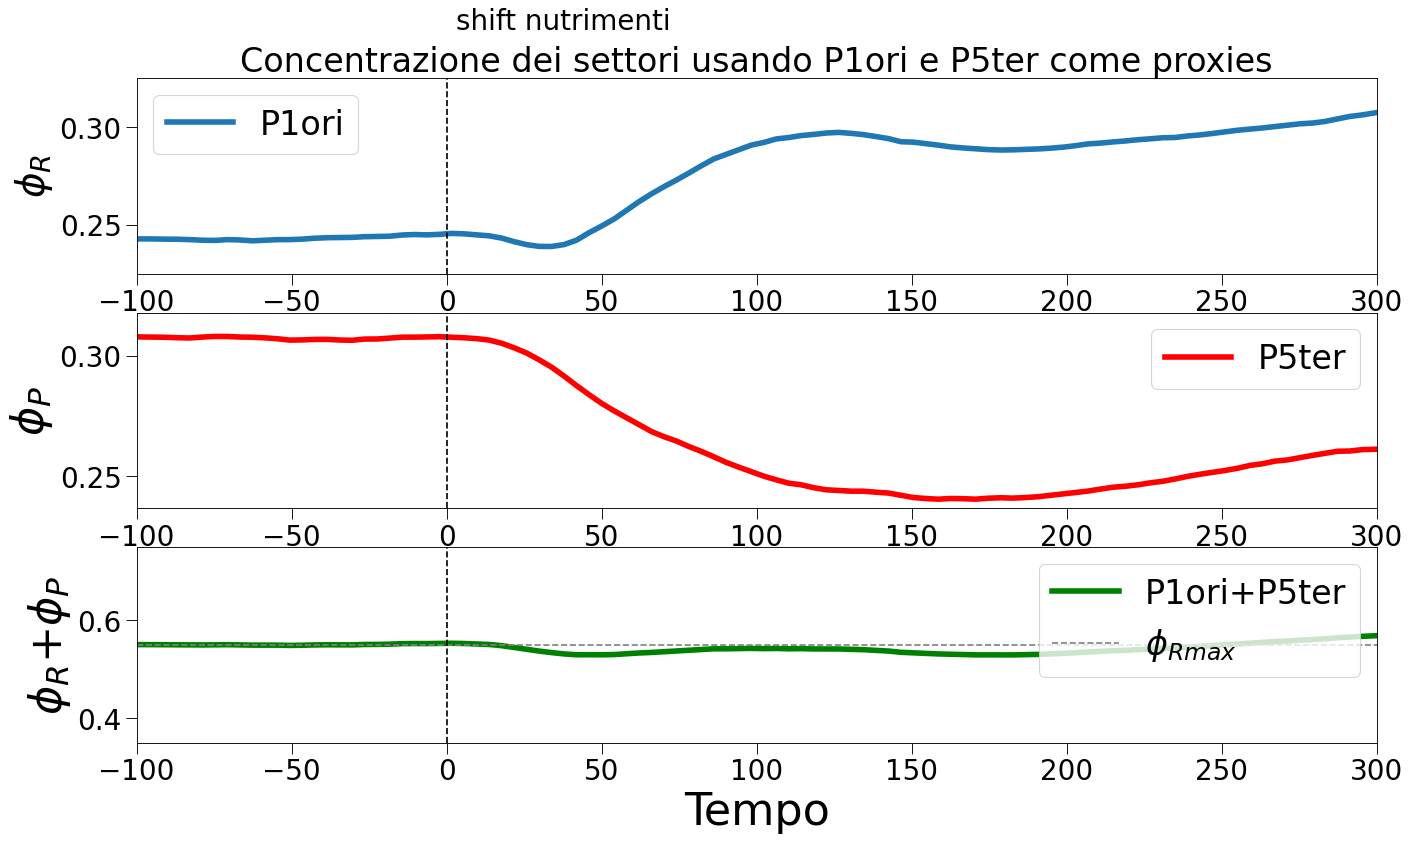

In [228]:
#VARIANTE INGLESE
fig=plt.figure(num=None, figsize=(20, 11), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(3,1,1)

#ax1.set_xlabel("Tempo", fontsize=15)
ax1.set_ylabel('$\phi_R$', fontsize=35)

ax1.set_xlim(-100,300)
ax1.set_title('Concentrazione dei settori usando P1ori e P5ter come proxies', fontsize=30)

ax2 = fig.add_subplot(3,1,2)
#ax2.set_xlabel("Tempo", fontsize=15)
ax2.set_ylabel('$\phi_P$', fontsize=40)

ax2.set_xlim(-100,300)

ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel("Tempo", fontsize=40)
ax3.set_ylabel('$\phi_R$+$\phi_P$', fontsize=40)

ax3.set_xlim(-100,300)
ax3.set_ylim(0.35,0.75)

ax3.plot(np.linspace(-300,400,len(p1o_p5t_phi_r)),np.array(p1o_p5t_phi_p)+np.array(p1o_p5t_phi_r), 'g-',markersize=4, linewidth=5, label= 'P1ori+P5ter')
ax3.axhline(0.55, linestyle='--', color='grey', label='$\phi_{Rmax}$')
ax2.plot(np.linspace(-300,400,len(p1o_p5t_phi_p)),p1o_p5t_phi_p, 'r-',markersize=4, linewidth=5, label= 'P5ter')
ax1.plot(np.linspace(-300,400,len(p1o_p5t_phi_r)),p1o_p5t_phi_r, '-',markersize=4, linewidth=5, label= 'P1ori')
ax1.axvline(x=0, linestyle='--', color='black')
ax2.axvline(x=0, linestyle='--', color='black')
ax3.axvline(x=0, linestyle='--', color='black')


#ax1.tick_params(which='major', width=1.0, labelsize=15)
ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
ax3.tick_params(which='major', length=10, labelsize=25)

ax1.text(3,0.35,'shift nutrimenti', fontsize=25)


ax1.legend(fontsize=30)
ax2.legend(fontsize=30)
ax3.legend(fontsize=30)
plt.savefig('/home/valerio/tesi/data_managment/sector_p1ori_p5ter.pdf')

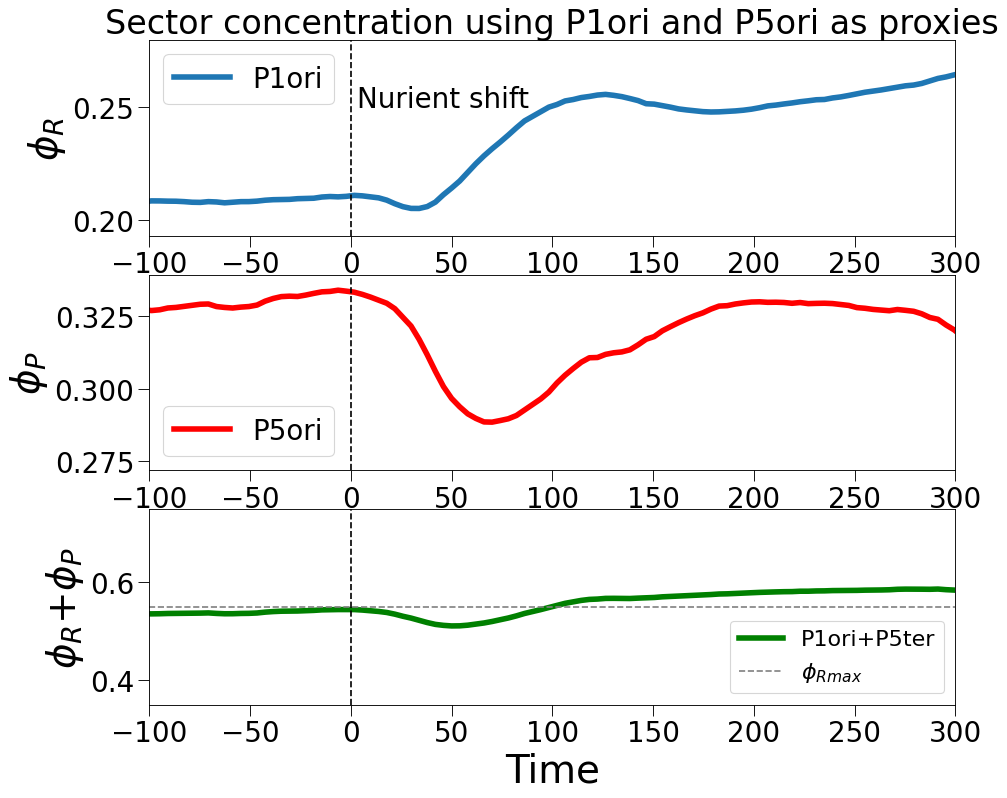

In [229]:
#VARIANTE INGLESE
fig=plt.figure(num=None, figsize=(13, 11), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(3,1,1)

#ax1.set_xlabel("Tempo", fontsize=15)
ax1.set_ylabel('$\phi_R$', fontsize=35)

ax1.set_xlim(-100,300)
ax1.set_title('Sector concentration using P1ori and P5ori as proxies', fontsize=30)

ax2 = fig.add_subplot(3,1,2)
#ax2.set_xlabel("Tempo", fontsize=15)
ax2.set_ylabel('$\phi_P$', fontsize=35)

ax2.set_xlim(-100,300)

ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel("Time", fontsize=35)
ax3.set_ylabel('$\phi_R$+$\phi_P$', fontsize=35)

ax3.set_xlim(-100,300)
ax3.set_ylim(0.35,0.75)

ax3.plot(np.linspace(-300,400,len(p1o_p5o_phi_r)),np.array(p1o_p5o_phi_p)+np.array(p1o_p5o_phi_r), 'g-',markersize=4, linewidth=5, label= 'P1ori+P5ter')
ax3.axhline(0.55, linestyle='--', color='grey', label='$\phi_{Rmax}$')
ax2.plot(np.linspace(-300,400,len(p1o_p5o_phi_p)),p1o_p5o_phi_p, 'r-',markersize=4, linewidth=5, label= 'P5ori')
ax1.plot(np.linspace(-300,400,len(p1o_p5o_phi_r)),p1o_p5o_phi_r, '-',markersize=4, linewidth=5, label= 'P1ori')
ax1.axvline(x=0, linestyle='--', color='black')
ax2.axvline(x=0, linestyle='--', color='black')
ax3.axvline(x=0, linestyle='--', color='black')


#ax1.tick_params(which='major', width=1.0, labelsize=15)
ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
ax3.tick_params(which='major', length=10, labelsize=25)

ax1.text(3,0.250,'Nurient shift', fontsize=25)


ax1.legend(fontsize=25)
ax2.legend(fontsize=25)
ax3.legend(fontsize=20)

#plt.savefig('/home/valerio/tesi/data_managment/sector_p1ori_p5ori.pdf')

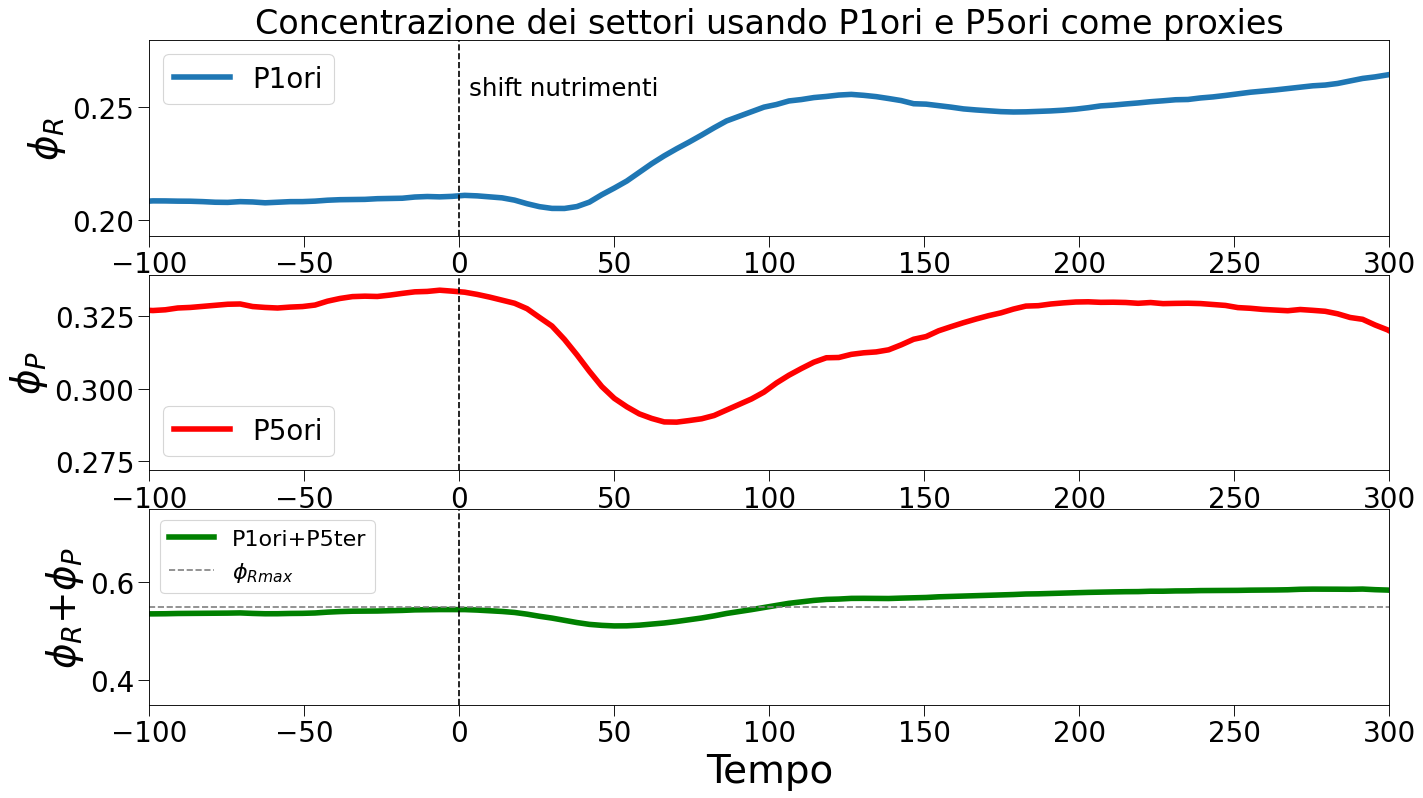

In [230]:
#VARIANTE INGLESE
fig=plt.figure(num=None, figsize=(20, 11), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(3,1,1)

#ax1.set_xlabel("Tempo", fontsize=15)
ax1.set_ylabel('$\phi_R$', fontsize=35)

ax1.set_xlim(-100,300)
ax1.set_title('Concentrazione dei settori usando P1ori e P5ori come proxies', fontsize=30)

ax2 = fig.add_subplot(3,1,2)
#ax2.set_xlabel("Tempo", fontsize=15)
ax2.set_ylabel('$\phi_P$', fontsize=35)

ax2.set_xlim(-100,300)

ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel("Tempo", fontsize=35)
ax3.set_ylabel('$\phi_R$+$\phi_P$', fontsize=35)

ax3.set_xlim(-100,300)
ax3.set_ylim(0.35,0.75)

ax3.plot(np.linspace(-300,400,len(p1o_p5o_phi_r)),np.array(p1o_p5o_phi_p)+np.array(p1o_p5o_phi_r), 'g-',markersize=4, linewidth=5, label= 'P1ori+P5ter')
ax3.axhline(0.55, linestyle='--', color='grey', label='$\phi_{Rmax}$')
ax2.plot(np.linspace(-300,400,len(p1o_p5o_phi_p)),p1o_p5o_phi_p, 'r-',markersize=4, linewidth=5, label= 'P5ori')
ax1.plot(np.linspace(-300,400,len(p1o_p5o_phi_r)),p1o_p5o_phi_r, '-',markersize=4, linewidth=5, label= 'P1ori')
ax1.axvline(x=0, linestyle='--', color='black')
ax2.axvline(x=0, linestyle='--', color='black')
ax3.axvline(x=0, linestyle='--', color='black')


#ax1.tick_params(which='major', width=1.0, labelsize=15)
ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
ax3.tick_params(which='major', length=10, labelsize=25)

ax1.text(3,0.255,'shift nutrimenti', fontsize=22)


ax1.legend(fontsize=25)
ax2.legend(fontsize=25)
ax3.legend(fontsize=20)

plt.savefig('/home/valerio/tesi/data_managment/sector_p1ori_p5ori.pdf')

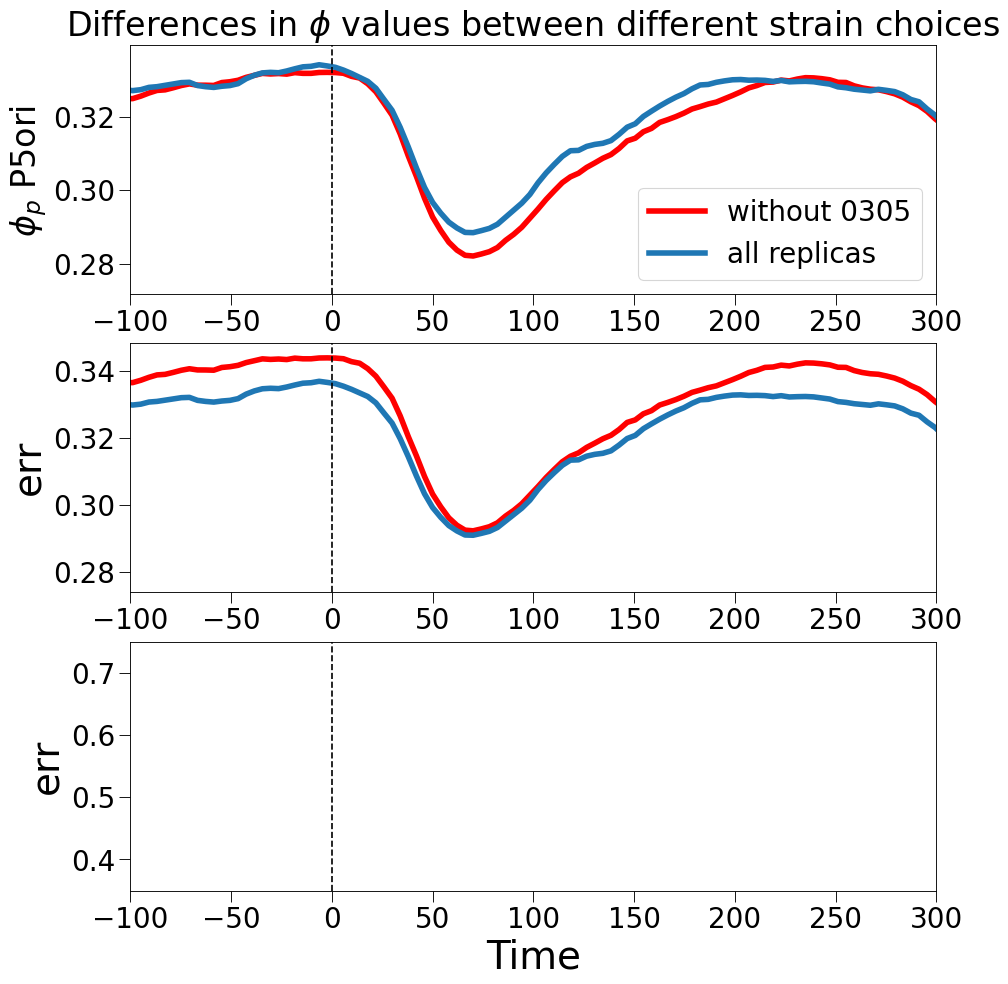

In [231]:
fig=plt.figure(num=None, figsize=(13, 14), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(3,1,1)

#ax1.set_xlabel("Tempo", fontsize=15)
ax1.set_ylabel('$\phi_p$ P5ori ', fontsize=30)

ax1.set_xlim(-100,300)
ax1.set_title('Differences in $\phi$ values between different strain choices', fontsize=30)

ax2 = fig.add_subplot(3,1,2)
#ax2.set_xlabel("Tempo", fontsize=15)
ax2.set_ylabel('err', fontsize=35)

ax2.set_xlim(-100,300)

ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel("Time", fontsize=35)
ax3.set_ylabel('err', fontsize=35)

ax3.set_xlim(-100,300)
ax3.set_ylim(0.35,0.75)

ax1.plot(np.linspace(-300,400,len(p1o_p5o_phi_p_p)),p1o_p5o_phi_p_p, 'r-',markersize=4, linewidth=5, label= 'without 0305')
ax1.plot(np.linspace(-300,400,len(p1o_p5o_phi_p_p)),p1o_p5o_phi_p, '-',markersize=4, linewidth=5, label= 'all replicas ')

ax2.plot(np.linspace(-300,400,len(p1lo_p5o_phi_p_p)),p1lo_p5o_phi_p_p, 'r-',markersize=4, linewidth=5, label= 'without 0305 &')
ax2.plot(np.linspace(-300,400,len(p1lo_p5o_phi_p_p)),p1lo_p5o_phi_p, '-',markersize=4, linewidth=5, label= 'all replicas')


ax1.axvline(x=0, linestyle='--', color='black')
ax2.axvline(x=0, linestyle='--', color='black')
ax3.axvline(x=0, linestyle='--', color='black')


#ax1.tick_params(which='major', width=1.0, labelsize=15)
ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
ax3.tick_params(which='major', length=10, labelsize=25)

ax1.legend(fontsize=25)



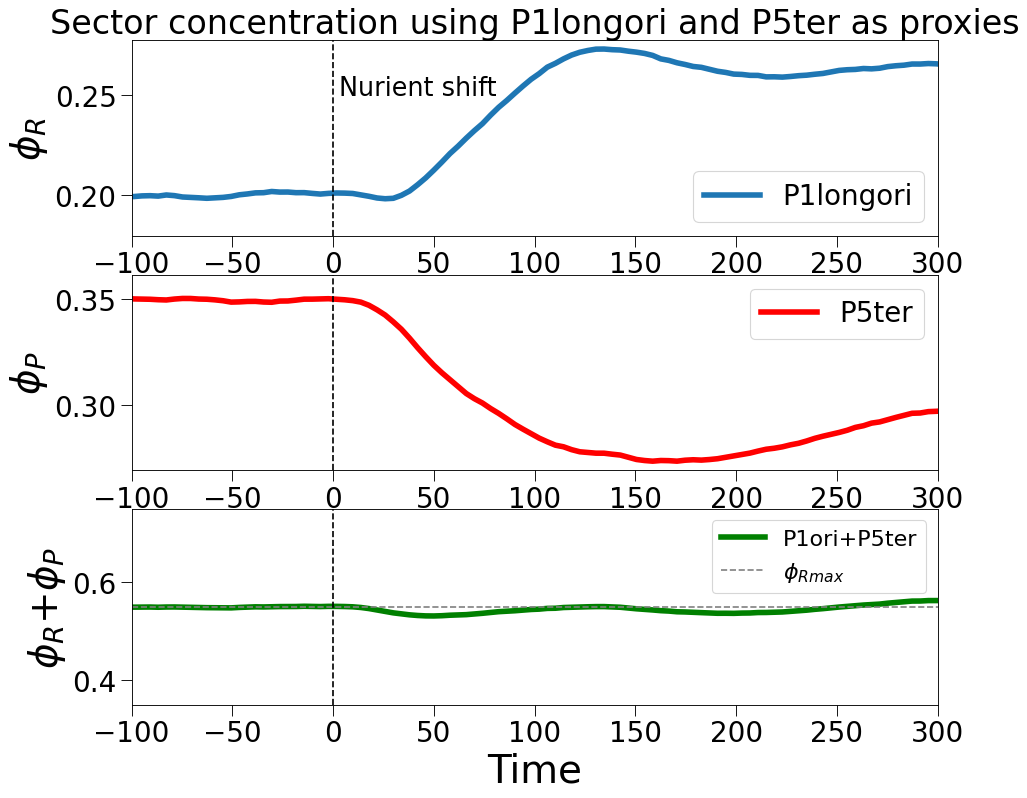

In [232]:
#VARIANTE INGLESE
fig=plt.figure(num=None, figsize=(13, 11), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(3,1,1)

#ax1.set_xlabel("Tempo", fontsize=15)
ax1.set_ylabel('$\phi_R$', fontsize=35)

ax1.set_xlim(-100,300)
ax1.set_title('Sector concentration using P1longori and P5ter as proxies', fontsize=30)

ax2 = fig.add_subplot(3,1,2)
#ax2.set_xlabel("Tempo", fontsize=15)
ax2.set_ylabel('$\phi_P$', fontsize=35)

ax2.set_xlim(-100,300)

ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel("Time", fontsize=35)
ax3.set_ylabel('$\phi_R$+$\phi_P$', fontsize=35)

ax3.set_xlim(-100,300)
ax3.set_ylim(0.35,0.75)

ax3.plot(np.linspace(-300,400,len(p1lo_p5t_phi_r)),np.array(p1lo_p5t_phi_p)+np.array(p1lo_p5t_phi_r), 'g-',markersize=4, linewidth=5, label= 'P1ori+P5ter')
ax3.axhline(0.55, linestyle='--', color='grey', label='$\phi_{Rmax}$')
ax2.plot(np.linspace(-300,400,len(p1lo_p5t_phi_p)),p1lo_p5t_phi_p, 'r-',markersize=4, linewidth=5, label= 'P5ter')
ax1.plot(np.linspace(-300,400,len(p1lo_p5t_phi_r)),p1lo_p5t_phi_r, '-',markersize=4, linewidth=5, label= 'P1longori')
ax1.axvline(x=0, linestyle='--', color='black')
ax2.axvline(x=0, linestyle='--', color='black')
ax3.axvline(x=0, linestyle='--', color='black')


#ax1.tick_params(which='major', width=1.0, labelsize=15)
ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
ax3.tick_params(which='major', length=10, labelsize=25)

ax1.text(3,0.250,'Nurient shift', fontsize=23)


ax1.legend(fontsize=25)
ax2.legend(fontsize=25)
ax3.legend(fontsize=20)

#plt.savefig('/home/valerio/tesi/data_managment/sector_p1longori_p5ter.pdf')

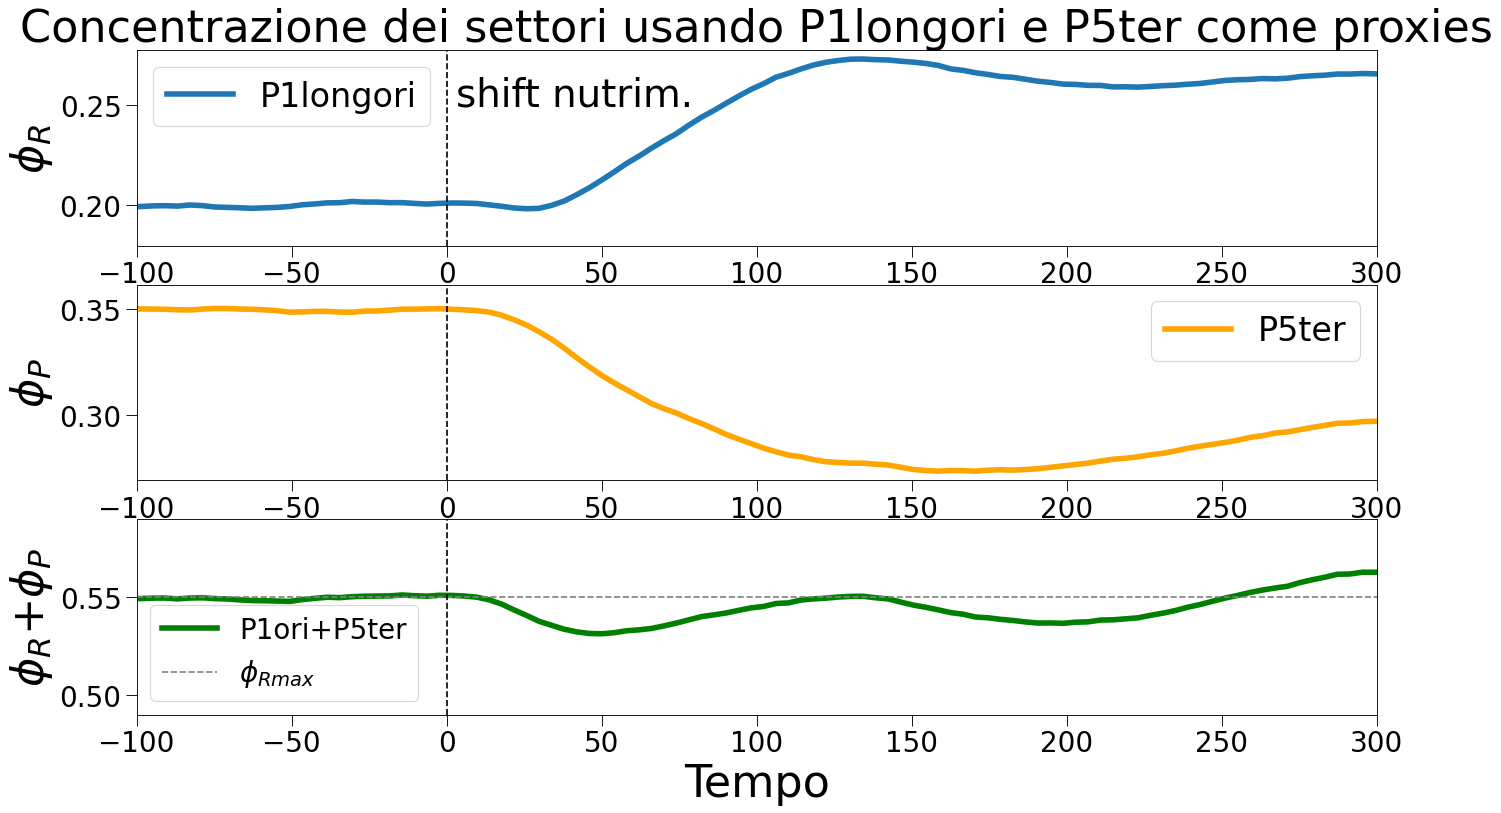

In [233]:
#VARIANTE INGLESE
fig=plt.figure(num=None, figsize=(20, 11), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(3,1,1)

#ax1.set_xlabel("Tempo", fontsize=15)
ax1.set_ylabel('$\phi_R$', fontsize=40)

ax1.set_xlim(-100,300)
ax1.set_title('Concentrazione dei settori usando P1longori e P5ter come proxies', fontsize=40)

ax2 = fig.add_subplot(3,1,2)
#ax2.set_xlabel("Tempo", fontsize=15)
ax2.set_ylabel('$\phi_P$', fontsize=40)

ax2.set_xlim(-100,300)

ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel("Tempo", fontsize=40)
ax3.set_ylabel('$\phi_R$+$\phi_P$', fontsize=40)

ax3.set_xlim(-100,300)
ax3.set_ylim(0.49,0.59)

ax3.plot(np.linspace(-300,400,len(p1lo_p5t_phi_r)),np.array(p1lo_p5t_phi_p)+np.array(p1lo_p5t_phi_r), 'g-',markersize=4, linewidth=5, label= 'P1ori+P5ter')
ax3.axhline(0.55, linestyle='--', color='grey', label='$\phi_{Rmax}$')
ax2.plot(np.linspace(-300,400,len(p1lo_p5t_phi_p)),p1lo_p5t_phi_p, '-',color='orange',markersize=4, linewidth=5, label= 'P5ter')
ax1.plot(np.linspace(-300,400,len(p1lo_p5t_phi_r)),p1lo_p5t_phi_r, '-',markersize=4, linewidth=5, label= 'P1longori')
ax1.axvline(x=0, linestyle='--', color='black')
ax2.axvline(x=0, linestyle='--', color='black')
ax3.axvline(x=0, linestyle='--', color='black')


#ax1.tick_params(which='major', width=1.0, labelsize=15)
ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
ax3.tick_params(which='major', length=10, labelsize=25)

ax1.text(3,0.250,'shift nutrim.', fontsize=35)


ax1.legend(fontsize=30)
ax2.legend(fontsize=30)
ax3.legend(fontsize=25, loc='lower left' )

plt.savefig('/home/valerio/tesi/data_managment/sector_p1longori_p5ter.pdf')

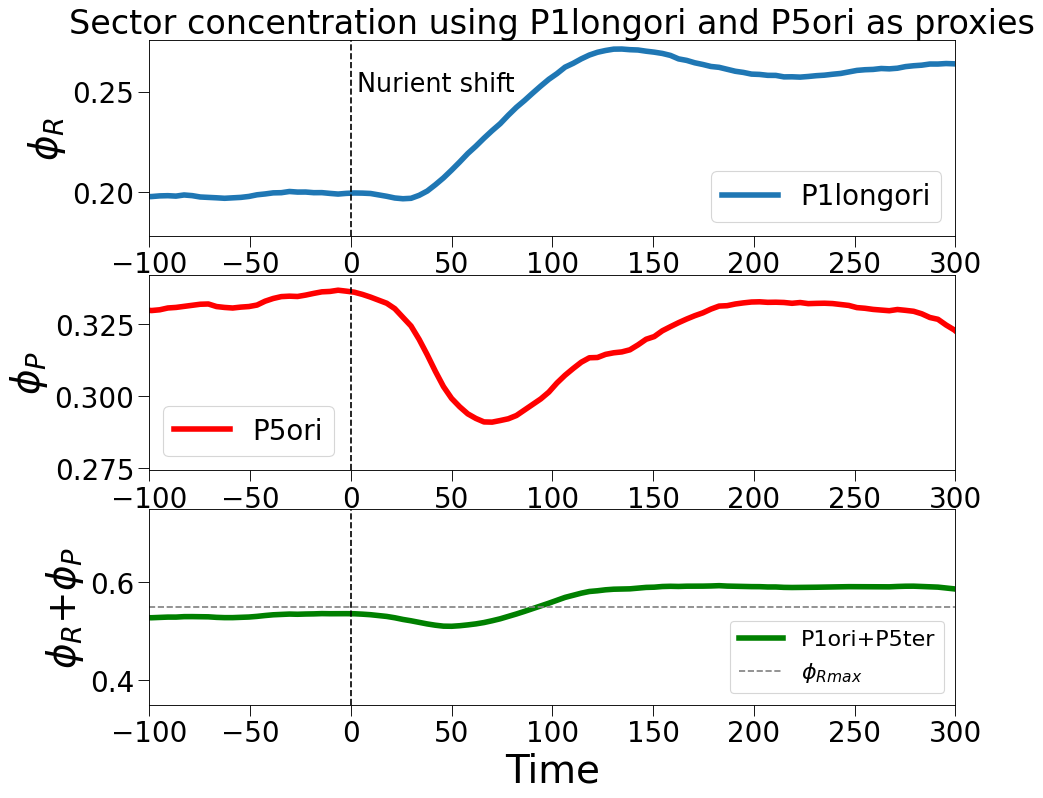

In [234]:
#VARIANTE INGLESE
fig=plt.figure(num=None, figsize=(13, 11), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(3,1,1)

#ax1.set_xlabel("Tempo", fontsize=15)
ax1.set_ylabel('$\phi_R$', fontsize=35)

ax1.set_xlim(-100,300)
ax1.set_title('Sector concentration using P1longori and P5ori as proxies', fontsize=30)

ax2 = fig.add_subplot(3,1,2)
#ax2.set_xlabel("Tempo", fontsize=15)
ax2.set_ylabel('$\phi_P$', fontsize=35)

ax2.set_xlim(-100,300)

ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel("Time", fontsize=35)
ax3.set_ylabel('$\phi_R$+$\phi_P$', fontsize=35)

ax3.set_xlim(-100,300)
ax3.set_ylim(0.35,0.75)

ax3.plot(np.linspace(-300,400,len(p1lo_p5o_phi_r)),np.array(p1lo_p5o_phi_p)+np.array(p1lo_p5o_phi_r), 'g-',markersize=4, linewidth=5, label= 'P1ori+P5ter')
ax3.axhline(0.55, linestyle='--', color='grey', label='$\phi_{Rmax}$')
ax2.plot(np.linspace(-300,400,len(p1lo_p5o_phi_p)),p1lo_p5o_phi_p, 'r-',markersize=4, linewidth=5, label= 'P5ori')
ax1.plot(np.linspace(-300,400,len(p1lo_p5o_phi_r)),p1lo_p5o_phi_r, '-',markersize=4, linewidth=5, label= 'P1longori')
ax1.axvline(x=0, linestyle='--', color='black')
ax2.axvline(x=0, linestyle='--', color='black')
ax3.axvline(x=0, linestyle='--', color='black')


#ax1.tick_params(which='major', width=1.0, labelsize=15)
ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
ax3.tick_params(which='major', length=10, labelsize=25)

ax1.text(3,0.250,'Nurient shift', fontsize=23)


ax1.legend(fontsize=25)
ax2.legend(fontsize=25)
ax3.legend(fontsize=20)

#plt.savefig('/home/valerio/tesi/data_managment/sector_p1longori_p5ori.pdf')

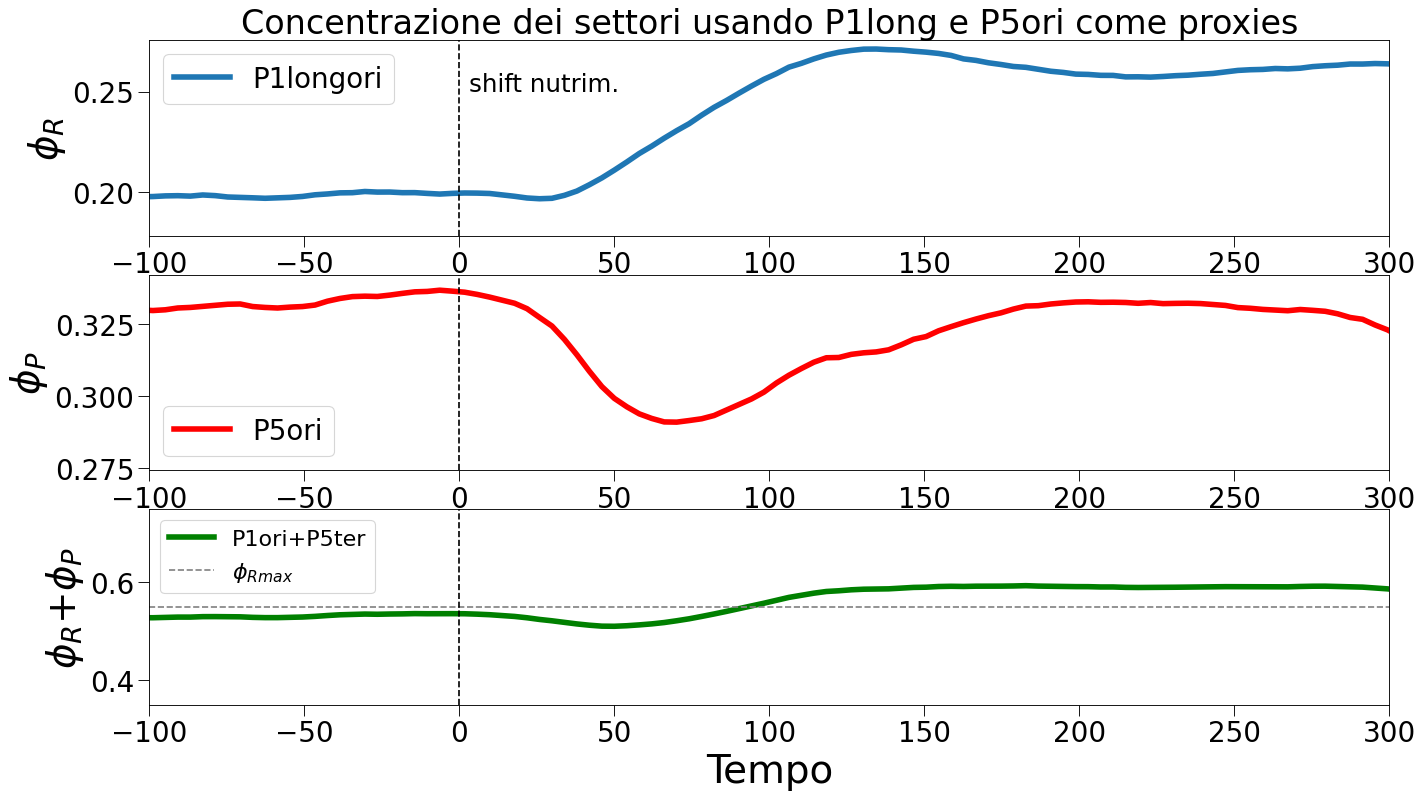

In [235]:
#VARIANTE INGLESE
fig=plt.figure(num=None, figsize=(20, 11), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(3,1,1)

#ax1.set_xlabel("Tempo", fontsize=15)
ax1.set_ylabel('$\phi_R$', fontsize=35)

ax1.set_xlim(-100,300)
ax1.set_title('Concentrazione dei settori usando P1long e P5ori come proxies', fontsize=30)

ax2 = fig.add_subplot(3,1,2)
#ax2.set_xlabel("Tempo", fontsize=15)
ax2.set_ylabel('$\phi_P$', fontsize=35)

ax2.set_xlim(-100,300)

ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel("Tempo", fontsize=35)
ax3.set_ylabel('$\phi_R$+$\phi_P$', fontsize=35)

ax3.set_xlim(-100,300)
ax3.set_ylim(0.35,0.75)

ax3.plot(np.linspace(-300,400,len(p1lo_p5o_phi_r)),np.array(p1lo_p5o_phi_p)+np.array(p1lo_p5o_phi_r), 'g-',markersize=4, linewidth=5, label= 'P1ori+P5ter')
ax3.axhline(0.55, linestyle='--', color='grey', label='$\phi_{Rmax}$')
ax2.plot(np.linspace(-300,400,len(p1lo_p5o_phi_p)),p1lo_p5o_phi_p, 'r-',markersize=4, linewidth=5, label= 'P5ori')
ax1.plot(np.linspace(-300,400,len(p1lo_p5o_phi_r)),p1lo_p5o_phi_r, '-',markersize=4, linewidth=5, label= 'P1longori')
ax1.axvline(x=0, linestyle='--', color='black')
ax2.axvline(x=0, linestyle='--', color='black')
ax3.axvline(x=0, linestyle='--', color='black')


#ax1.tick_params(which='major', width=1.0, labelsize=15)
ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
ax3.tick_params(which='major', length=10, labelsize=25)

ax1.text(3,0.250,'shift nutrim.', fontsize=22)


ax1.legend(fontsize=25)
ax2.legend(fontsize=25)
ax3.legend(fontsize=20)

plt.savefig('/home/valerio/tesi/data_managment/sector_p1longori_p5ori.pdf')

# sezione dedicata a derivate e calcolo di growth rate P1ori


In [25]:
columns=['index','fov','line', 'cellID', 'parentID','frame', 'tTrans', 'V', 'L', 'Itot','xCM','yCM','orientation']

In [26]:
#aggiungo al dataframe una colonna di zeri che è il growth rate, lascio le repliche separate per facilità nel calcolo del growth rate

p1ori_r1=read_replica_tot('P1ori3',p1ori3_index[0])
p1ori_r2=read_replica_tot('P1ori3',p1ori3_index[1])


p1ori_r1=p1ori_r1.drop(['w','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0'],axis='columns')
p1ori_r2=p1ori_r2.drop(['w','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0'],axis='columns')


%run function.py

gg1=p1ori_r1.groupby(['fov','line','cellID'])
gg2=p1ori_r2.groupby(['fov','line','cellID'])


In [27]:
#creo array ausiliari che servono solo come appoggio nel calcolo

array_appoggio_p1ori_1=np.empty(0)
array_appoggio_p1ori_2=np.empty(0)
df_p1ori_div_1=pd.DataFrame(columns=columns)
df_p1ori_div_2=pd.DataFrame(columns=columns)


In [28]:
#calcolo della derivata temporale iterando su tutte le cellule,identificate da (fov,line,cellID)
for name, group in gg1:
    df_p1ori_1=gg1.get_group(name).reset_index()
    array_appoggio_p1ori_1=np.append(array_appoggio_p1ori_1 , derivata_sg(np.array(df_p1ori_1['tTrans']),np.array(df_p1ori_1['V'])))
    df_p1ori_div_1=df_p1ori_div_1.append(df_p1ori_1[:1], ignore_index=True)
    
for name, group in gg2:    
    df_p1ori_2=gg2.get_group(name).reset_index()
    array_appoggio_p1ori_2=np.append(array_appoggio_p1ori_2 , derivata_sg(np.array(df_p1ori_2['tTrans']),np.array(df_p1ori_2['V'])))
    df_p1ori_div_2=df_p1ori_div_2.append(df_p1ori_2[:1], ignore_index=True)
    

In [29]:
#aggiungo la colonna delle derivate al dataframe
p1ori_r1=p1ori_r1.join(pd.Series(array_appoggio_p1ori_1,name='der'))
p1ori_r2=p1ori_r2.join(pd.Series(array_appoggio_p1ori_2,name='der'))


In [30]:
p1ori_r1.to_csv(growth_path+'p1ori_r1.csv')
p1ori_r2.to_csv(growth_path+'p1ori_r2.csv')

In [103]:
p1ori_r1

fov  line  cellID  parentID  frame      tTrans         L         V  \
0         0     1     441       436    117  100.100000  3.019855  2.472282   
1         0     1     441       436    118  105.100000  3.302361  2.729945   
2         0     1     441       436    119  110.100000  3.604927  2.996530   
3         0     1     441       436    120  115.100000  3.953115  3.300001   
4         0     1     445       435    118  105.100000  3.009615  2.145054   
...     ...   ...     ...       ...    ...         ...       ...       ...   
102549   35  3696      76        70     81  -75.683333  3.349571  2.005546   
102550   35  3696      76        70     82  -70.683333  3.682341  2.250738   
102551   35  3696      76        70     83  -65.683333  4.031581  2.534514   
102552   35  3696      76        70     84  -60.683333  4.369949  2.817974   
102553   35  3696      76        70     85  -55.683333  4.702099  3.162740   

             Itot        xCM        yCM  orientation       der  
0       1810203.0  29.784373   9.313442    -0.044999  0.052127  
1       2104651.0  31.328306   9.131371    -0.101593  0.053753  
2       2465213.0  30.474760   9.125297    -0.090973  0.056708  
3       2706127.0  30.444559   9.092669    -0.086700  0.058037  
4       1471802.0  36.274032   9.845500     0.010664  0.036956  
...           ...        ...        ...          ...       ...  
102549  1166581.0  28.250370  51.295098     0.165415  0.051851  
102550  1327258.0  27.195116  51.201129     0.114509  0.052897  
102551  1502420.0  26.308048  51.164360     0.103576  0.056724  
102552  1737460.0  25.475939  51.164660     0.095403  0.062823  
102553  1929864.0  24.464786  51.160956     0.101006  0.068953  

[101763 rows x 13 columns]

In [31]:
std_p1ori_1=(p1ori_r1['der']/p1ori_r1['V']).std()
mean_p1ori_1=(p1ori_r1['der']/p1ori_r1['V']).mean()

p1ori_r1=p1ori_r1[((p1ori_r1['der']/p1ori_r1['V'])< mean_p1ori_1 + 3*std_p1ori_1) & ((p1ori_r1['der']/p1ori_r1['V'])> mean_p1ori_1 - 3*std_p1ori_1)]

der_mean_p1ori_1=bin_mean(p1ori_r1.tTrans,(p1ori_r1.der),4,20,-300,400,interval='custom')
growth_mean_p1ori_1=bin_mean(p1ori_r1.tTrans,(p1ori_r1.der/p1ori_r1.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p1ori_1=bin_mean(p1ori_r1.tTrans,(p1ori_r1.V),4,20,-300,400,interval='custom')
growth_bulk_p1ori_1=(np.array(derivata(np.linspace(-300,400,len(volume_mean_p1ori_1)),np.array(volume_mean_p1ori_1)))/np.array(volume_mean_p1ori_1))

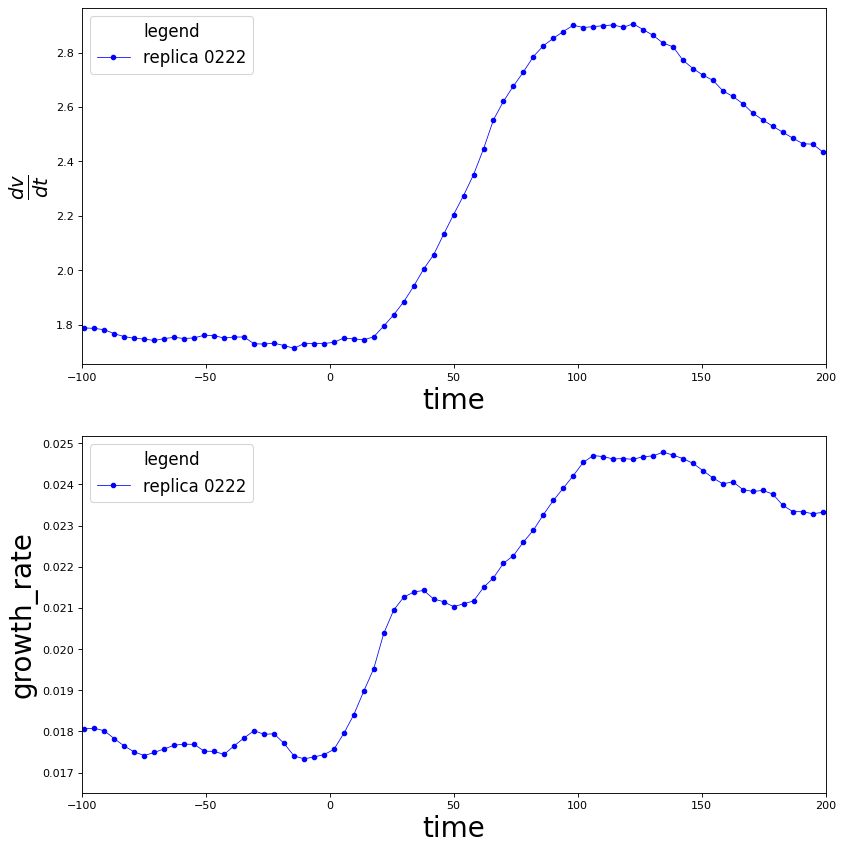

In [32]:
fig=plt.figure(num=None, figsize=(12, 13), dpi=80, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(2,1,2)
ax1= fig.add_subplot(2,1,1)

ax2.set_xlabel("time", fontsize=25)
ax2.set_ylabel('growth_rate', fontsize=25)

ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel(r'$\frac{dv}{dt}$', fontsize=25)

ax2.set_xlim(-100,200)
ax1.set_xlim(-100,200)


ax2.plot(np.linspace(-300,400,len(growth_mean_p1ori_1)),growth_mean_p1ori_1, 'bo-',markersize=4, linewidth=0.7, label= 'replica 0222')
#ax2.plot(np.linspace(-300,400,len(growth_mean_p1ori_1)),growth_bulk_p1ori_1, 'bo-',markersize=4, linewidth=0.7, label= 'replica 0222')

#ax3.plot(p1longori_r3['tTrans'],p1longori_r3['der']/p1longori_r3['V'], 'go',markersize=4, linewidth=0.7, label= 'unified replicas P1longori')
ax1.plot(np.linspace(-300,400,len(der_mean_p1ori_1)),volume_mean_p1ori_1, 'bo-',markersize=4, linewidth=0.7, label= 'replica 0222')

ax1.legend(fontsize=15, title='legend',title_fontsize=15)
ax2.legend(fontsize=15, title='legend',title_fontsize=15)


In [33]:
std_p1ori_2=(p1ori_r2['der']/p1ori_r2['V']).std()
mean_p1ori_2=(p1ori_r2['der']/p1ori_r2['V']).mean()

p1ori_r2=p1ori_r2[((p1ori_r2['der']/p1ori_r2['V'])< mean_p1ori_2 + 3*std_p1ori_2) & ((p1ori_r2['der']/p1ori_r2['V'])> mean_p1ori_2 - 3*std_p1ori_2)]
der_mean_p1ori_2=bin_mean(p1ori_r2.tTrans,(p1ori_r2.der),4,20,-300,400,interval='custom')
growth_mean_p1ori_2=bin_mean(p1ori_r2.tTrans,(p1ori_r2.der/p1ori_r2.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p1ori_2=bin_mean(p1ori_r2.tTrans,(p1ori_r2.V),4,20,-300,400,interval='custom')

# plot P1ori repliche unite serie temporale growth rate 

In [34]:
unified_p1ori_new=pd.concat([p1ori_r1,p1ori_r2], ignore_index=True)



In [35]:
std_p1ori_u=(unified_p1ori_new['der']/unified_p1ori_new['V']).std()
mean_p1ori_u=(unified_p1ori_new['der']/unified_p1ori_new['V']).mean()

unified_p1ori_new=unified_p1ori_new[((unified_p1ori_new['der']/unified_p1ori_new['V'])< mean_p1ori_u + 3*std_p1ori_u) & ((unified_p1ori_new['der']/unified_p1ori_new['V'])> mean_p1ori_u - 3*std_p1ori_u)]

der_mean_p1ori_u=bin_mean(unified_p1ori_new.tTrans,(unified_p1ori_new.der),4,20,-300,400,interval='custom')
growth_mean_p1ori_u=bin_mean(unified_p1ori_new.tTrans,(unified_p1ori_new.der/unified_p1ori_new.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p1ori_u=bin_mean(unified_p1ori_new.tTrans,(unified_p1ori_new.V),4,20,-300,400,interval='custom')

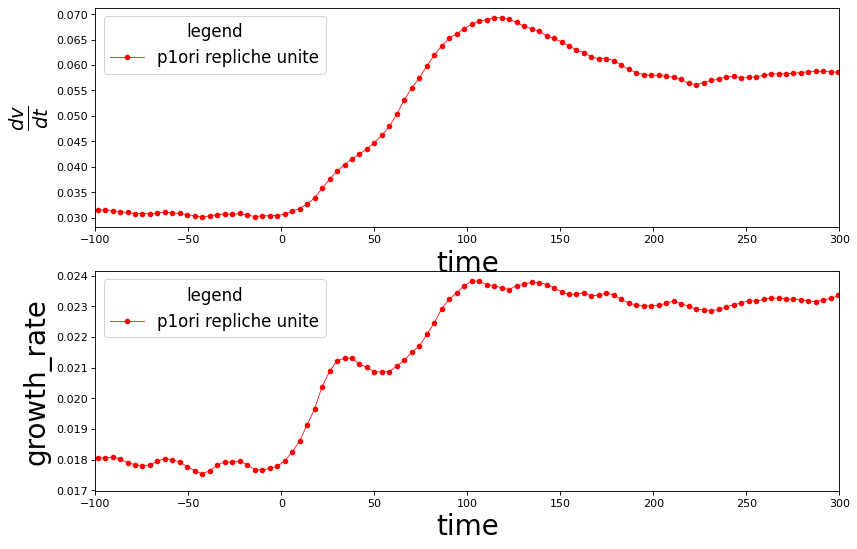

In [36]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(2,1,2)
ax1= fig.add_subplot(2,1,1)

ax2.set_xlabel("time", fontsize=25)
ax2.set_ylabel('growth_rate', fontsize=25)

ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel(r'$\frac{dv}{dt}$', fontsize=25)

ax2.set_xlim(-100,300)
ax1.set_xlim(-100,300)

#ax2.set_ylim(0.015,0.0275)

ax2.plot(np.linspace(-300,400,len(growth_mean_p1ori_u)),growth_mean_p1ori_u, 'ro-',markersize=4, linewidth=0.7, label= 'p1ori repliche unite')
#ax3.plot(p1longori_r3['tTrans'],p1longori_r3['der']/p1longori_r3['V'], 'go',markersize=4, linewidth=0.7, label= 'unified replicas P1longori')
ax1.plot(np.linspace(-300,400,len(volume_mean_p1ori_u)),der_mean_p1ori_u, 'ro-',markersize=4, linewidth=0.7, label= 'p1ori repliche unite')

ax1.legend(fontsize=15, title='legend',title_fontsize=15)
ax2.legend(fontsize=15, title='legend',title_fontsize=15)

#plt.savefig('/home/valerio/tesi/plot_venerdi/growth_p1ori.pdf')

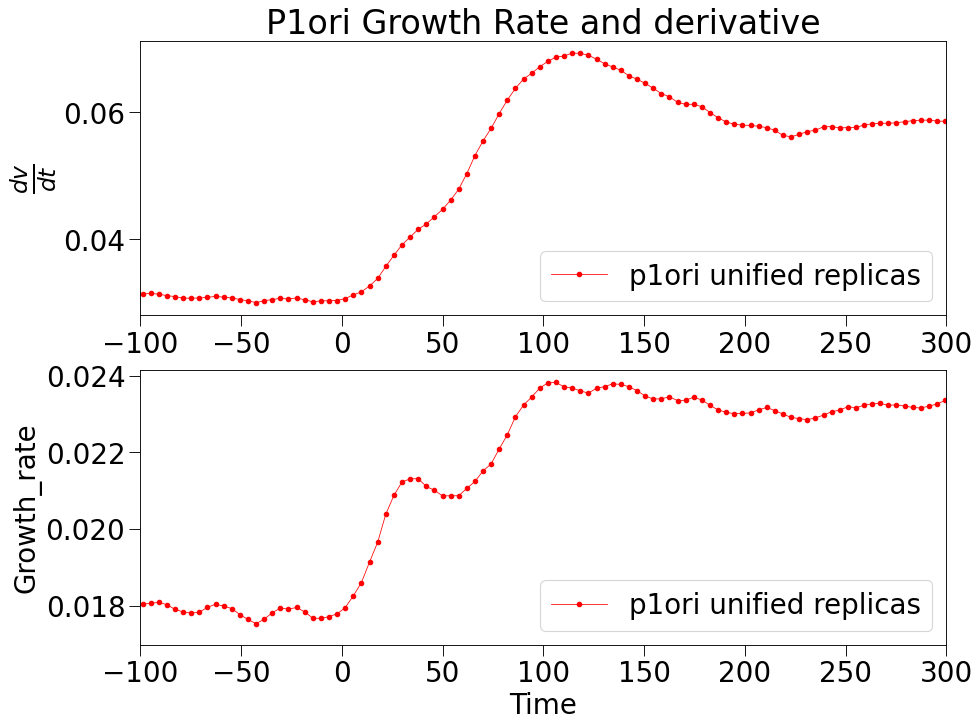

In [37]:
fig=plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(2,1,2)
ax1= fig.add_subplot(2,1,1)

ax2.set_ylabel('Growth_rate', fontsize=25)

ax2.set_xlabel("Time", fontsize=25)
ax1.set_ylabel(r'$\frac{dv}{dt}$', fontsize=30)


ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_title('P1ori Growth Rate and derivative', fontsize=30)


ax2.set_xlim(-100,300)
ax1.set_xlim(-100,300)

#ax2.set_ylim(0.015,0.0275)

ax2.plot(np.linspace(-300,400,len(growth_mean_p1ori_u)),growth_mean_p1ori_u, 'ro-',markersize=4, linewidth=0.7, label= 'p1ori unified replicas')
#ax3.plot(p1longori_r3['tTrans'],p1longori_r3['der']/p1longori_r3['V'], 'go',markersize=4, linewidth=0.7, label= 'unified replicas P1longori')
ax1.plot(np.linspace(-300,400,len(volume_mean_p1ori_u)),der_mean_p1ori_u, 'ro-',markersize=4, linewidth=0.7, label= 'p1ori unified replicas')

ax1.legend(fontsize=25)
ax2.legend(fontsize=25)

plt.savefig('/home/valerio/tesi/data_managment/growth_der_p1ori.pdf')

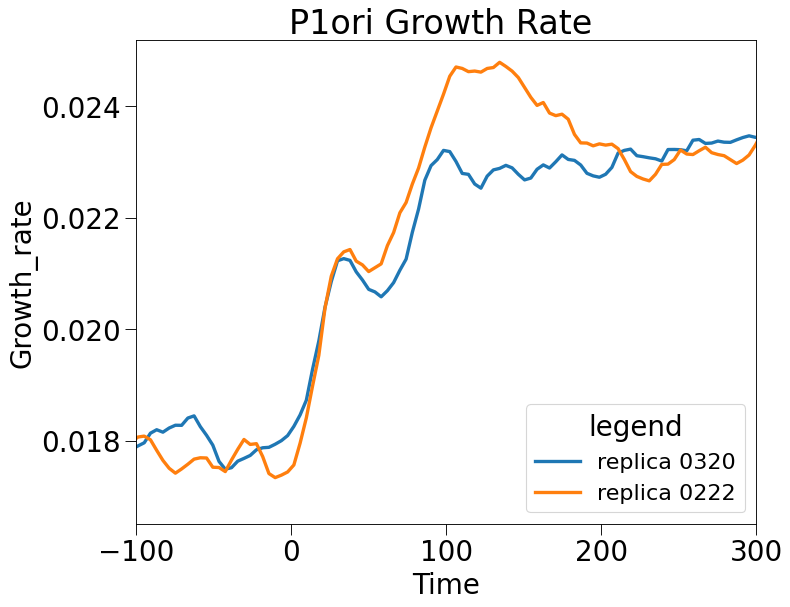

In [38]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('P1ori Growth Rate ', fontsize=30)


ax.set_xlim(-100,300)


ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_2)),growth_mean_p1ori_2, '-',markersize=4, linewidth=3, label= 'replica 0320')
ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_1)),growth_mean_p1ori_1, '-',markersize=4, linewidth=3, label= 'replica 0222')
#ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_u)),growth_mean_p1ori_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
#ax.axhline(y=np.array(growth_mean_p1ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(200,0.0237,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20, title='legend',title_fontsize=25,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_p1ori.pdf')

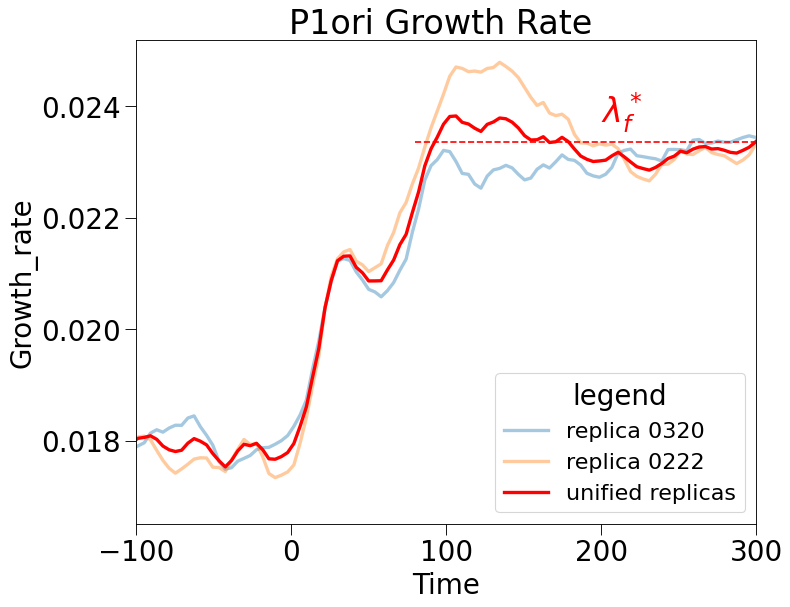

In [39]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('P1ori Growth Rate ', fontsize=30)


ax.set_xlim(-100,300)


ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_2)),growth_mean_p1ori_2, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0320')
ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_1)),growth_mean_p1ori_1, '-',markersize=4, linewidth=3,alpha=0.4,label= 'replica 0222')
ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_u)),growth_mean_p1ori_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
ax.axhline(y=np.array(growth_mean_p1ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
ax.text(200,0.0237,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20, title='legend',title_fontsize=25,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_p1ori_trasparente.pdf')

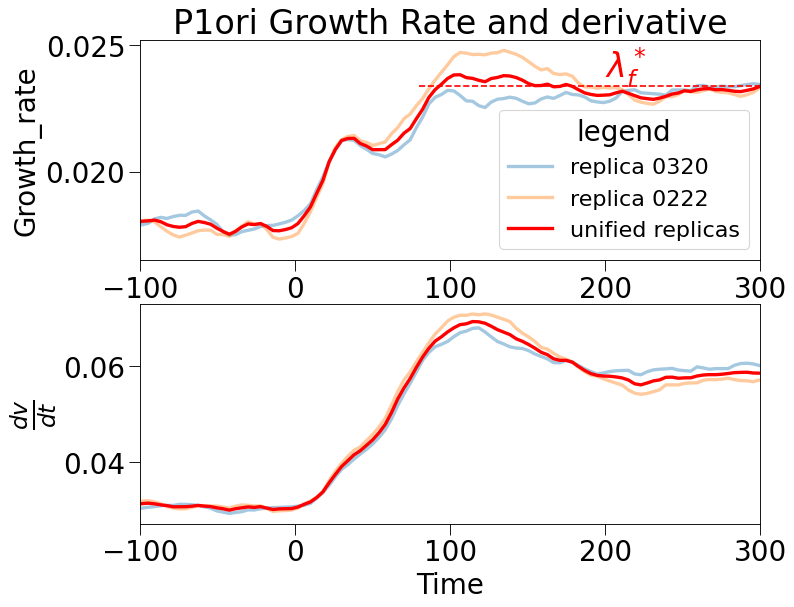

In [40]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(2,1,1)
ax2= fig.add_subplot(2,1,2)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)

ax2.set_xlabel("Time", fontsize=25)
ax2.set_ylabel(r'$\frac{dv}{dt}$', fontsize=30)


ax.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('P1ori Growth Rate and derivative', fontsize=30)



ax.set_xlim(-100,300)
ax2.set_xlim(-100,300)

ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_2)),growth_mean_p1ori_2, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0320')
ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_1)),growth_mean_p1ori_1, '-',markersize=4, linewidth=3,alpha=0.4,label= 'replica 0222')
ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_u)),growth_mean_p1ori_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
ax.axhline(y=np.array(growth_mean_p1ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
ax.text(200,0.0237,'$\lambda^*_{f}$', color='red',fontsize=30)

ax2.plot(np.linspace(-300,400,len(growth_mean_p1ori_2)),der_mean_p1ori_2, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0320')
ax2.plot(np.linspace(-300,400,len(growth_mean_p1ori_1)),der_mean_p1ori_1, '-',markersize=4, linewidth=3,alpha=0.4,label= 'replica 0222')
ax2.plot(np.linspace(-300,400,len(growth_mean_p1ori_u)),der_mean_p1ori_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')

ax.legend(fontsize=20, title='legend',title_fontsize=25,loc='lower right')
#plt.savefig('/home/valerio/tesi/data_managment/growth_p1ori_trasparente.pdf')

# sezione dedicata a derivate e calcolo di growth rate P1longori


In [41]:
#aggiungo al dataframe una colonna di zeri che è il growth rate, lascio le repliche separate per facilità nel calcolo del growth rate

p1longori_r1=read_replica_tot('P1longori3',p1longori3_index[0])
p1longori_r2=read_replica_tot('P1longori3',p1longori3_index[1])
p1longori_r3=read_replica_tot('P1longori3',p1longori3_index[2])


p1longori_r1=p1longori_r1.drop(['w','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0'],axis='columns')
p1longori_r2=p1longori_r2.drop(['w','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0'],axis='columns')
p1longori_r3=p1longori_r3.drop(['w','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0'],axis='columns')

%run function.py

g1=p1longori_r1.groupby(['fov','line','cellID'])
g2=p1longori_r2.groupby(['fov','line','cellID'])
g3=p1longori_r3.groupby(['fov','line','cellID'])


In [42]:
#creo array ausiliari che servono solo come appoggio nel calcolo

array_appoggio1=np.empty(0)
array_appoggio2=np.empty(0)
array_appoggio3=np.empty(0)

df_p1longori_div_1=pd.DataFrame(columns=columns)
df_p1longori_div_2=pd.DataFrame(columns=columns)
df_p1longori_div_3=pd.DataFrame(columns=columns)


In [43]:
#calcolo della derivata temporale iterando su tutte le cellule,identificate da (fov,line,cellID)
for name, group in g1:
    df1=g1.get_group(name).reset_index()
    array_appoggio1=np.append(array_appoggio1 , derivata3(np.array(df1['tTrans']),np.array(df1['V'])))
    df_p1longori_div_1=df_p1longori_div_1.append(df1[:1], ignore_index=True)

    
for name, group in g2:    
    df2=g2.get_group(name).reset_index()
    array_appoggio2=np.append(array_appoggio2 , derivata3(np.array(df2['tTrans']),np.array(df2['V'])))
    df_p1longori_div_2=df_p1longori_div_2.append(df2[:1], ignore_index=True)

for name, group in g3:
    df3=g3.get_group(name).reset_index()
    array_appoggio3=np.append(array_appoggio3 , derivata3(np.array(df3['tTrans']),np.array(df3['V'])))
    df_p1longori_div_3=df_p1longori_div_3.append(df3[:1], ignore_index=True)

    
    
    

In [44]:
#aggiungo la colonna delle derivate al dataframe
p1longori_r1=p1longori_r1.join(pd.Series(array_appoggio1,name='der'))
p1longori_r2=p1longori_r2.join(pd.Series(array_appoggio2,name='der'))
p1longori_r3=p1longori_r3.join(pd.Series(array_appoggio3,name='der'))

In [45]:
std1=(p1longori_r1['der']/p1longori_r1['V']).std()
mean1=(p1longori_r1['der']/p1longori_r1['V']).mean()

p1longori_r1=p1longori_r1[((p1longori_r1['der']/p1longori_r1['V'])< mean1 + 3*std1) & ((p1longori_r1['der']/p1longori_r1['V'])> mean1 - 3*std1)]
der_mean_p1longori_1=bin_mean(p1longori_r1.tTrans,(p1longori_r1.der),4,20,-300,400,interval='custom')
growth_mean_p1longori_1=bin_mean(p1longori_r1.tTrans,(p1longori_r1.der/p1longori_r1.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p1longori_1=bin_mean(p1longori_r1.tTrans,(p1longori_r1.V),4,20,-300,400,interval='custom')

std2=(p1longori_r2['der']/p1longori_r2['V']).std()
mean2=(p1longori_r2['der']/p1longori_r2['V']).mean()

p1longori_r2=p1longori_r2[((p1longori_r2['der']/p1longori_r2['V'])< mean2 + 3*std2) & ((p1longori_r2['der']/p1longori_r2['V'])> mean2 - 3*std2)]
der_mean_p1longori_2=bin_mean(p1longori_r2.tTrans,(p1longori_r2.der),4,20,-300,400,interval='custom')
growth_mean_p1longori_2=bin_mean(p1longori_r2.tTrans,(p1longori_r2.der/p1longori_r2.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p1longori_2=bin_mean(p1longori_r2.tTrans,(p1longori_r2.V),4,20,-300,400,interval='custom')

std3=(p1longori_r3['der']/p1longori_r3['V']).std()
mean3=(p1longori_r3['der']/p1longori_r3['V']).mean()

p1longori_r3=p1longori_r3[((p1longori_r3['der']/p1longori_r3['V'])< mean3 + 3*std3) & ((p1longori_r3['der']/p1longori_r3['V'])> mean3 - 3*std3)]
der_mean_p1longori_3=bin_mean(p1longori_r3.tTrans,(p1longori_r3.der),4,20,-300,400,interval='custom')
growth_mean_p1longori_3=bin_mean(p1longori_r3.tTrans,(p1longori_r3.der/p1longori_r3.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p1longori_3=bin_mean(p1longori_r3.tTrans,(p1longori_r3.V),4,20,-300,400,interval='custom')

In [46]:
p1longori_r1.to_csv(growth_path+'p1longori_r1.csv')
p1longori_r2.to_csv(growth_path+'p1longori_r2.csv')
p1longori_r3.to_csv(growth_path+'p1longori_r3.csv')

# plot P1longori repliche unite serie temporale growth rate 

In [47]:
unified_p1longori_new=pd.concat([p1longori_r1,p1longori_r2,p1longori_r3], ignore_index=True)

In [48]:
std_p1longori_u=(unified_p1longori_new['der']/unified_p1longori_new['V']).std()
mean_p1longori_u=(unified_p1longori_new['der']/unified_p1longori_new['V']).mean()

unified_p1longori_new=unified_p1longori_new[((unified_p1longori_new['der']/unified_p1longori_new['V'])< mean_p1longori_u + 3*std_p1longori_u) & ((unified_p1longori_new['der']/unified_p1longori_new['V'])> mean_p1longori_u - 3*std_p1longori_u)]
der_mean_p1longori_u=bin_mean(unified_p1longori_new.tTrans,(unified_p1longori_new.der),4,20,-300,400,interval='custom')
growth_mean_p1longori_u=bin_mean(unified_p1longori_new.tTrans,(unified_p1longori_new.der/unified_p1longori_new.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p1longori_u=bin_mean(unified_p1longori_new.tTrans,(unified_p1longori_new.V),4,20,-300,400,interval='custom')

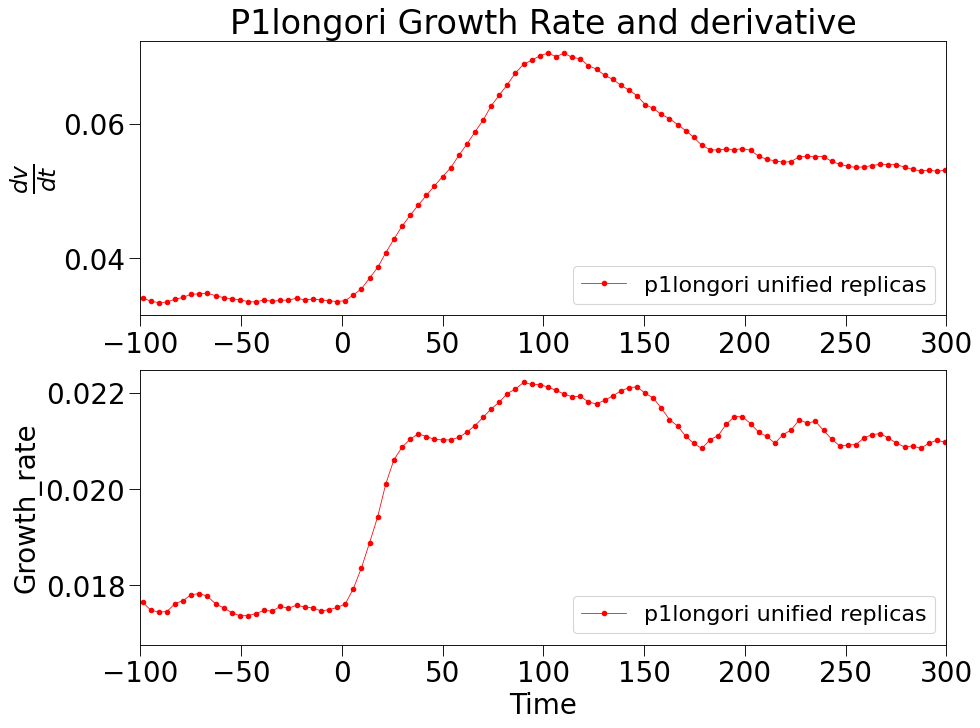

In [49]:
fig=plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(2,1,2)
ax1= fig.add_subplot(2,1,1)

ax2.set_ylabel('Growth_rate', fontsize=25)

ax2.set_xlabel("Time", fontsize=25)
ax1.set_ylabel(r'$\frac{dv}{dt}$', fontsize=30)


ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_title('P1longori Growth Rate and derivative', fontsize=30)



ax1.set_xlim(-100,300)
ax2.set_xlim(-100,300)


ax2.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),growth_mean_p1longori_u, 'ro-',markersize=4, linewidth=0.7, label= 'p1longori unified replicas')
#ax3.plot(p1longori_r3['tTrans'],p1longori_r3['der']/p1longori_r3['V'], 'go',markersize=4, linewidth=0.7, label= 'unified replicas P1longori')
ax1.plot(np.linspace(-300,400,len(volume_mean_p1longori_u)),der_mean_p1longori_u, 'ro-',markersize=4, linewidth=0.7, label= 'p1longori unified replicas')

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)

plt.savefig('/home/valerio/tesi/data_managment/growth_der_p1longori.pdf')

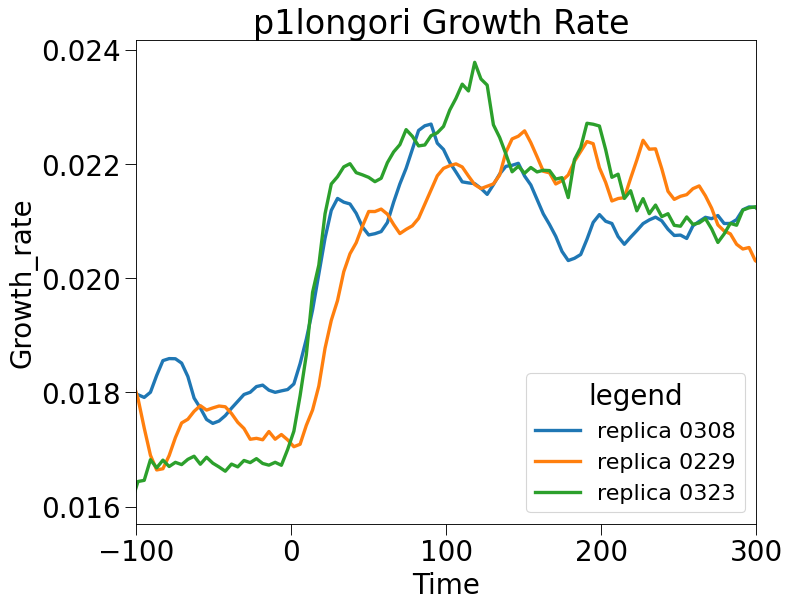

In [50]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('p1longori Growth Rate ', fontsize=30)


ax.set_xlim(-100,300)


ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_2)),growth_mean_p1longori_2, '-',markersize=4, linewidth=3, label= 'replica 0308')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_1)),growth_mean_p1longori_1, '-',markersize=4, linewidth=3, label= 'replica 0229')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_3)),growth_mean_p1longori_3, '-',markersize=4, linewidth=3, label= 'replica 0323')

#ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),growth_mean_p1longori_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
#ax.axhline(y=np.array(growth_mean_p1longori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20, title='legend',title_fontsize=25,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_p1longori.pdf')

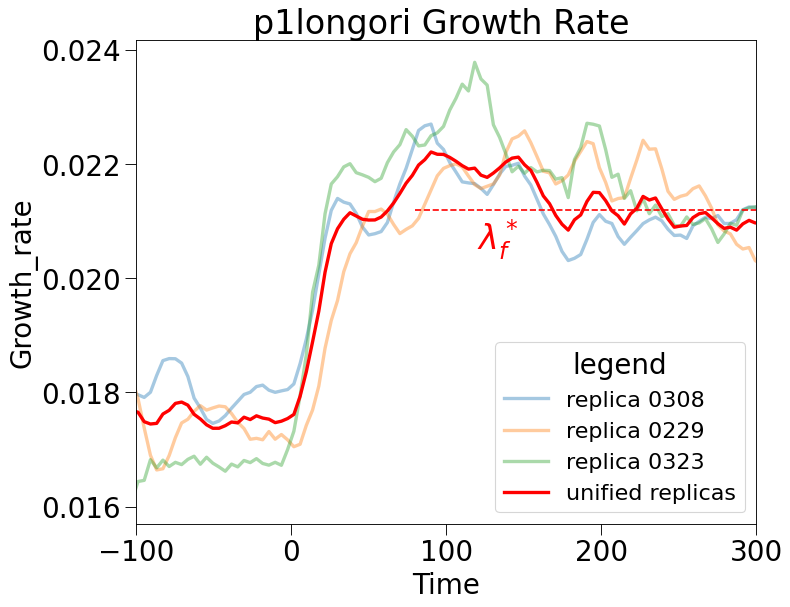

In [51]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('p1longori Growth Rate ', fontsize=30)


ax.set_xlim(-100,300)


ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_2)),growth_mean_p1longori_2, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0308')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_1)),growth_mean_p1longori_1, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0229')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_3)),growth_mean_p1longori_3, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0323')

ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),growth_mean_p1longori_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
ax.axhline(y=np.array(growth_mean_p1longori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20, title='legend',title_fontsize=25,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_p1longori_trasparente.pdf')

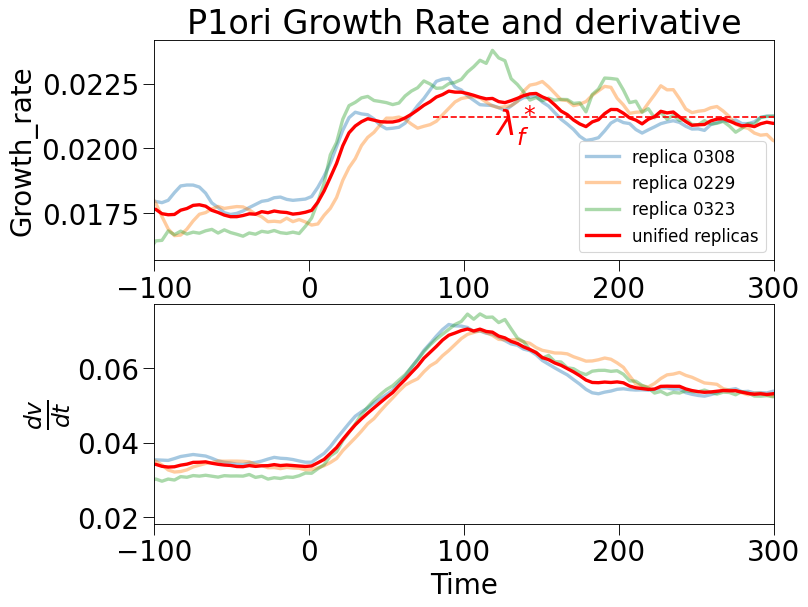

In [52]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(2,1,1)
ax2= fig.add_subplot(2,1,2)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)

ax2.set_xlabel("Time", fontsize=25)
ax2.set_ylabel(r'$\frac{dv}{dt}$', fontsize=30)


ax.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('P1ori Growth Rate and derivative', fontsize=30)



ax.set_xlim(-100,300)
ax2.set_xlim(-100,300)

ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_2)),growth_mean_p1longori_2, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0308')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_1)),growth_mean_p1longori_1, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0229')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_3)),growth_mean_p1longori_3, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0323')

ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),growth_mean_p1longori_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
ax.axhline(y=np.array(growth_mean_p1longori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)


ax2.plot(np.linspace(-300,400,len(growth_mean_p1longori_2)),der_mean_p1longori_2, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0308')
ax2.plot(np.linspace(-300,400,len(growth_mean_p1longori_1)),der_mean_p1longori_1, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0229')
ax2.plot(np.linspace(-300,400,len(growth_mean_p1longori_3)),der_mean_p1longori_3, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0323')

ax2.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),der_mean_p1longori_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')

ax.legend(fontsize=15)
#plt.savefig('/home/valerio/tesi/data_managment/growth_p1ori_trasparente.pdf')

# sezione dedicata a derivate e calcolo di growth rate P5ter


In [53]:
#aggiungo al dataframe una colonna di zeri che è il growth rate, lascio le repliche separate per facilità nel calcolo del growth rate

p5ter_r1=read_replica_tot('P5ter3',p5ter3_index[0])
p5ter_r2=read_replica_tot('P5ter3',p5ter3_index[1])



p5ter_r1=p5ter_r1.drop(['w','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0'],axis='columns')
p5ter_r2=p5ter_r2.drop(['w','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0'],axis='columns')


%run function.py

g1=p5ter_r1.groupby(['fov','line','cellID'])
g2=p5ter_r2.groupby(['fov','line','cellID'])



In [54]:
#creo array ausiliari che servono solo come appoggio nel calcolo

array_appoggio1=np.empty(0)
array_appoggio2=np.empty(0)
df_p5ter_div_1=pd.DataFrame(columns=columns)
df_p5ter_div_2=pd.DataFrame(columns=columns)


In [55]:
#calcolo della derivata temporale iterando su tutte le cellule,identificate da (fov,line,cellID)
for name, group in g1:
    df1=g1.get_group(name).reset_index()
    array_appoggio1=np.append(array_appoggio1 , derivata_sg(np.array(df1['tTrans']),np.array(df1['V'])))
    df_p5ter_div_1=df_p5ter_div_1.append(df1[:1], ignore_index=True)
    
for name, group in g2:    
    df2=g2.get_group(name).reset_index()
    array_appoggio2=np.append(array_appoggio2 , derivata_sg(np.array(df2['tTrans']),np.array(df2['V'])))
    df_p5ter_div_2=df_p5ter_div_2.append(df2[:1], ignore_index=True)

    
    
    

In [56]:
#aggiungo la colonna delle derivate al dataframe
p5ter_r1=p5ter_r1.join(pd.Series(array_appoggio1,name='der'))
p5ter_r2=p5ter_r2.join(pd.Series(array_appoggio2,name='der'))


In [57]:
std1=(p5ter_r1['der']/p5ter_r1['V']).std()
mean1=(p5ter_r1['der']/p5ter_r1['V']).mean()

p5ter_r1=p5ter_r1[((p5ter_r1['der']/p5ter_r1['V'])< mean1 + 3*std1) & ((p5ter_r1['der']/p5ter_r1['V'])> mean1 - 3*std1)]
der_mean_p5ter_1=bin_mean(p5ter_r1.tTrans,(p5ter_r1.der),4,20,-300,400,interval='custom')
growth_mean_p5ter_1=bin_mean(p5ter_r1.tTrans,(p5ter_r1.der/p5ter_r1.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p5ter_1=bin_mean(p5ter_r1.tTrans,(p5ter_r1.V),4,20,-300,400,interval='custom')

std2=(p5ter_r2['der']/p5ter_r2['V']).std()
mean2=(p5ter_r2['der']/p5ter_r2['V']).mean()

p5ter_r2=p5ter_r2[((p5ter_r2['der']/p5ter_r2['V'])< mean2 + 3*std2) & ((p5ter_r2['der']/p5ter_r2['V'])> mean2 - 3*std2)]
der_mean_p5ter_2=bin_mean(p5ter_r2.tTrans,(p5ter_r2.der),4,20,-300,400,interval='custom')
growth_mean_p5ter_2=bin_mean(p5ter_r2.tTrans,(p5ter_r2.der/p5ter_r2.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p5ter_2=bin_mean(p5ter_r2.tTrans,(p5ter_r2.V),4,20,-300,400,interval='custom')



In [58]:
p5ter_r1.to_csv(growth_path+'p5ter_r1.csv')
p5ter_r2.to_csv(growth_path+'p5ter_r2.csv')

# plot P5ter repliche unite serie temporale growth rate 

In [59]:
unified_p5ter_new=pd.concat([p5ter_r1,p5ter_r2], ignore_index=True)

In [118]:
std_p5ter_u=(unified_p5ter_new['der']/unified_p5ter_new['V']).std()
mean_p5ter_u=(unified_p5ter_new['der']/unified_p5ter_new['V']).mean()

unified_p5ter_new=unified_p5ter_new[((unified_p5ter_new['der']/unified_p5ter_new['V'])< mean_p5ter_u + 3*std_p5ter_u) & ((unified_p5ter_new['der']/unified_p5ter_new['V'])> mean_p5ter_u - 3*std_p5ter_u)]
der_mean_p5ter_u=bin_mean(unified_p5ter_new.tTrans,(unified_p5ter_new.der),4,20,-300,400,interval='custom')
growth_mean_p5ter_u=bin_mean(unified_p5ter_new.tTrans,(unified_p5ter_new.der/unified_p5ter_new.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p5ter_u=bin_mean(unified_p5ter_new.tTrans,(unified_p5ter_new.V),4,20,-300,400,interval='custom')

der_prova=derivata_sg(np.linspace(-300,400,len(der_mean_p5ter_u)),np.array(volume_mean_p5ter_u))
der_prova

array([ 2.90900163e-04,  1.64595705e-04,  2.35186817e-04,  7.57897072e-04,
        7.11428046e-04,  9.12612070e-04,  1.60498139e-03,  1.06014512e-03,
        7.93948914e-04,  7.64186375e-04, -3.46694592e-04, -1.18489673e-03,
       -1.13702070e-03, -4.48931327e-04,  5.44563308e-05,  3.35196281e-04,
        6.77830099e-04,  1.37419732e-03,  1.09656551e-03,  6.48695840e-04,
        1.10901695e-03,  1.31496175e-03, -3.78051427e-04, -1.13339351e-03,
        1.29321767e-04, -4.98479907e-04, -1.90257030e-03, -1.24279735e-03,
       -9.52890092e-06, -1.41790507e-04,  7.46508153e-04,  2.07433827e-03,
        1.71001738e-03,  7.34104218e-04,  8.45762443e-04,  4.50838437e-04,
       -1.35226050e-04,  1.09971647e-04, -4.37079096e-04, -1.53011013e-03,
       -1.82289764e-03, -1.37914688e-03, -7.00855693e-04,  1.26303888e-04,
        9.28210481e-04,  1.68577704e-03,  1.69047600e-03,  8.50383066e-04,
        9.06631607e-04,  9.35946532e-04, -5.36631137e-05, -5.65994391e-04,
       -4.56673314e-04, -

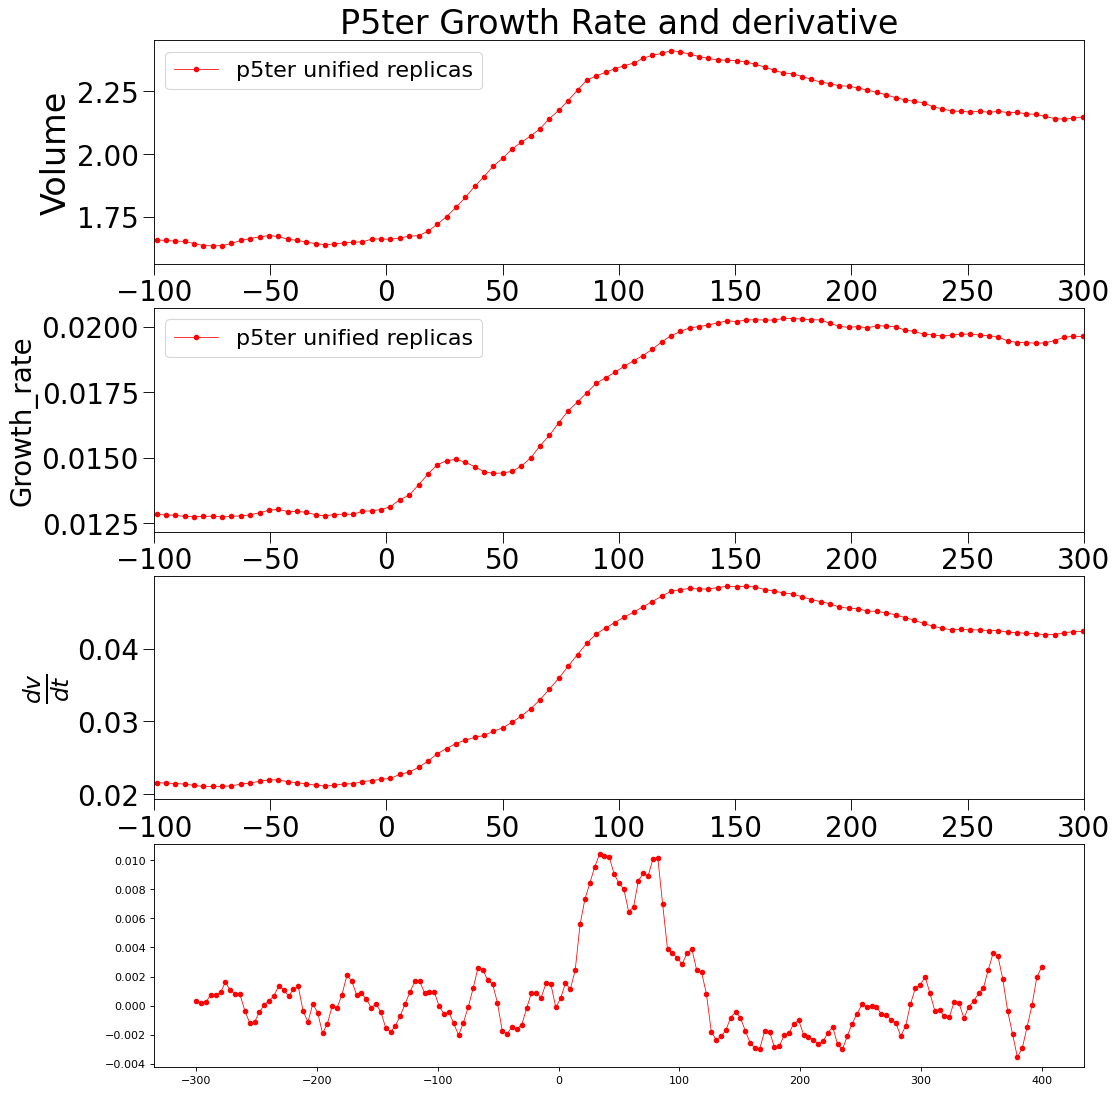

In [119]:
fig=plt.figure(num=None, figsize=(15, 17), dpi=80, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(4,1,2)
ax1= fig.add_subplot(4,1,1)
ax3= fig.add_subplot(4,1,3)
ax4= fig.add_subplot(4,1,4)


ax2.set_ylabel('Growth_rate', fontsize=25)

ax2.set_xlabel("Time", fontsize=25)
ax3.set_ylabel(r'$\frac{dv}{dt}$', fontsize=30)
ax1.set_ylabel('Volume', fontsize=30)


ax1.tick_params(which='major', length=10, labelsize=25)
ax2.tick_params(which='major', length=10, labelsize=25)
ax3.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_title('P5ter Growth Rate and derivative', fontsize=30)



ax1.set_xlim(-100,300)
ax2.set_xlim(-100,300)
ax3.set_xlim(-100,300)



ax2.plot(np.linspace(-300,400,len(growth_mean_p5ter_u)),growth_mean_p5ter_u, 'ro-',markersize=4, linewidth=0.7, label= 'p5ter unified replicas')
#ax3.plot(p5ter_r3['tTrans'],p5ter_r3['der']/p5ter_r3['V'], 'go',markersize=4, linewidth=0.7, label= 'unified replicas p5ter')
ax1.plot(np.linspace(-300,400,len(volume_mean_p5ter_u)),volume_mean_p5ter_u, 'ro-',markersize=4, linewidth=0.7, label= 'p5ter unified replicas')
ax3.plot(np.linspace(-300,400,len(der_mean_p5ter_u)),der_mean_p5ter_u, 'ro-',markersize=4, linewidth=0.7, label= 'p5ter unified replicas')
ax4.plot(np.linspace(-300,400,len(der_mean_p5ter_u)),der_prova, 'ro-',markersize=4, linewidth=0.7, label= 'p5ter unified replicas')

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)

#plt.savefig('/home/valerio/tesi/data_managment/growth_der_p5ter.pdf')

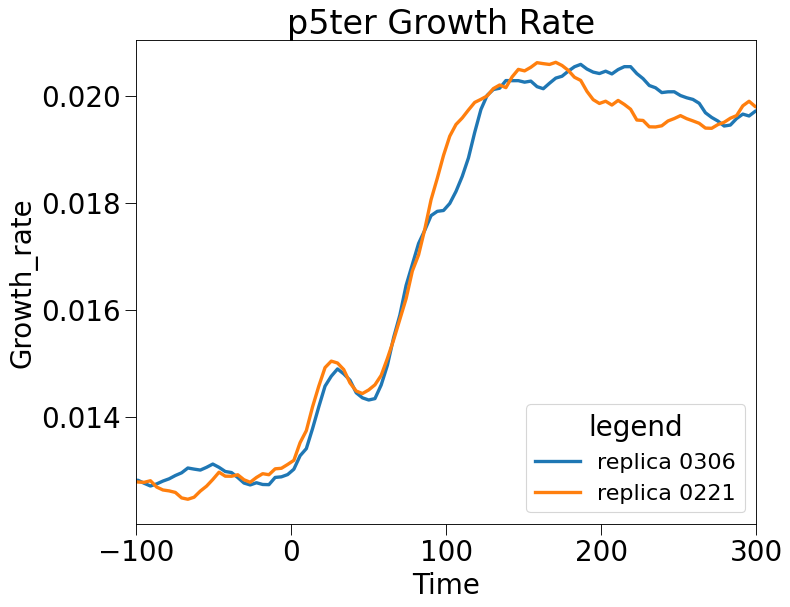

In [120]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('p5ter Growth Rate ', fontsize=30)


ax.set_xlim(-100,300)


ax.plot(np.linspace(-300,400,len(growth_mean_p5ter_2)),growth_mean_p5ter_2, '-',markersize=4, linewidth=3, label= 'replica 0306')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ter_1)),growth_mean_p5ter_1, '-',markersize=4, linewidth=3, label= 'replica 0221')

#ax.plot(np.linspace(-300,400,len(growth_mean_p5ter_u)),growth_mean_p5ter_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
#ax.axhline(y=np.array(growth_mean_p5ter_u[100:300]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20, title='legend',title_fontsize=25,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_p5ter.pdf')

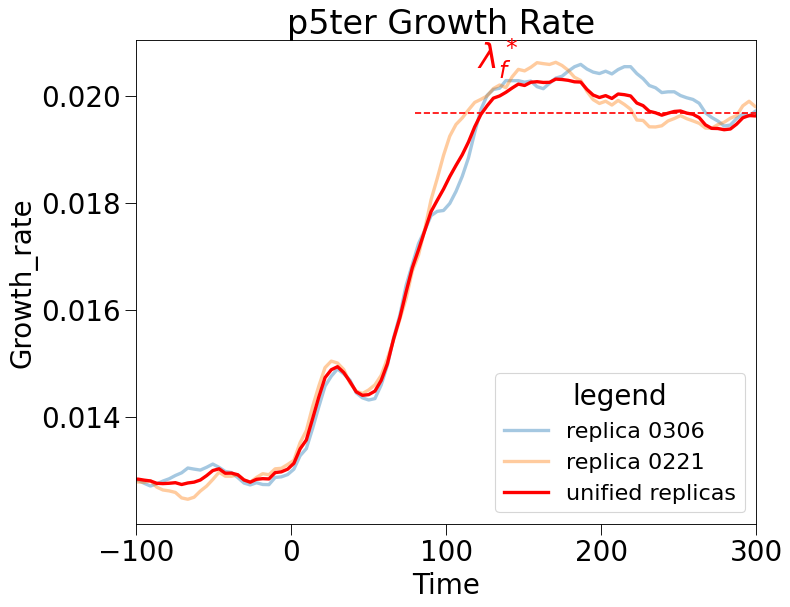

In [121]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('p5ter Growth Rate ', fontsize=30)


ax.set_xlim(-100,300)


ax.plot(np.linspace(-300,400,len(growth_mean_p5ter_2)),growth_mean_p5ter_2, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0306')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ter_1)),growth_mean_p5ter_1, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0221')

ax.plot(np.linspace(-300,400,len(growth_mean_p5ter_u)),growth_mean_p5ter_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
ax.axhline(y=np.array(growth_mean_p5ter_u[100:300]).mean(),xmin=0.45,  linestyle='--', color='red')
ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20, title='legend',title_fontsize=25,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_p5ter_trasparente.pdf')

# sezione dedicata a derivate e calcolo di growth rate P5ori


In [64]:
#aggiungo al dataframe una colonna di zeri che è il growth rate, lascio le repliche separate per facilità nel calcolo del growth rate

p5ori_r1=read_replica_tot('P5ori3',p5ori3_index[0])
p5ori_r2=read_replica_tot('P5ori3',p5ori3_index[1])
p5ori_r3=read_replica_tot('P5ori3',p5ori3_index[2])


p5ori_r1=p5ori_r1.drop(['w','L','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0','xCM','yCM','orientation'],axis='columns')
p5ori_r2=p5ori_r2.drop(['w','L','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0','xCM','yCM','orientation'],axis='columns')
p5ori_r3=p5ori_r3.drop(['w','L','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0','xCM','yCM','orientation'],axis='columns')

%run function.py

g1=p5ori_r1.groupby(['fov','line','cellID'])
g2=p5ori_r2.groupby(['fov','line','cellID'])
g3=p5ori_r3.groupby(['fov','line','cellID'])


In [65]:
#creo array ausiliari che servono solo come appoggio nel calcolo

array_appoggio1=np.empty(0)
array_appoggio2=np.empty(0)
array_appoggio3=np.empty(0)


In [66]:
#calcolo della derivata temporale iterando su tutte le cellule,identificate da (fov,line,cellID)
for name, group in g1:
    df1=g1.get_group(name).reset_index()
    array_appoggio1=np.append(array_appoggio1 , derivata3(np.array(df1['tTrans']),np.array(df1['V'])))

for name, group in g2:    
    df2=g2.get_group(name).reset_index()
    array_appoggio2=np.append(array_appoggio2 , derivata3(np.array(df2['tTrans']),np.array(df2['V'])))

for name, group in g3:
    df3=g3.get_group(name).reset_index()
    array_appoggio3=np.append(array_appoggio3 , derivata3(np.array(df3['tTrans']),np.array(df3['V'])))

    
    
    

In [67]:
#aggiungo la colonna delle derivate al dataframe
p5ori_r1=p5ori_r1.join(pd.Series(array_appoggio1,name='der'))
p5ori_r2=p5ori_r2.join(pd.Series(array_appoggio2,name='der'))
p5ori_r3=p5ori_r3.join(pd.Series(array_appoggio3,name='der'))

In [68]:
std1=(p5ori_r1['der']/p5ori_r1['V']).std()
mean1=(p5ori_r1['der']/p5ori_r1['V']).mean()

p5ori_r1=p5ori_r1[((p5ori_r1['der']/p5ori_r1['V'])< mean1 + 3*std1) & ((p5ori_r1['der']/p5ori_r1['V'])> mean1 - 3*std1)]
growth_mean_p5ori_1=bin_mean(p5ori_r1.tTrans,(p5ori_r1.der/p5ori_r1.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p5ori_1=bin_mean(p5ori_r1.tTrans,(p5ori_r1.V),4,20,-300,400,interval='custom')

std2=(p5ori_r2['der']/p5ori_r2['V']).std()
mean2=(p5ori_r2['der']/p5ori_r2['V']).mean()

p5ori_r2=p5ori_r2[((p5ori_r2['der']/p5ori_r2['V'])< mean2 + 3*std2) & ((p5ori_r2['der']/p5ori_r2['V'])> mean2 - 3*std2)]
growth_mean_p5ori_2=bin_mean(p5ori_r2.tTrans,(p5ori_r2.der/p5ori_r2.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p5ori_2=bin_mean(p5ori_r2.tTrans,(p5ori_r2.V),4,20,-300,400,interval='custom')

std3=(p5ori_r3['der']/p5ori_r3['V']).std()
mean3=(p5ori_r3['der']/p5ori_r3['V']).mean()

p5ori_r3=p5ori_r3[((p5ori_r3['der']/p5ori_r3['V'])< mean3 + 3*std3) & ((p5ori_r3['der']/p5ori_r3['V'])> mean3 - 3*std3)]
growth_mean_p5ori_3=bin_mean(p5ori_r3.tTrans,(p5ori_r3.der/p5ori_r3.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p5ori_3=bin_mean(p5ori_r3.tTrans,(p5ori_r3.V),4,20,-300,400,interval='custom')

# plot P5ori repliche unite serie temporale growth rate 

In [69]:
unified_p5ori_new=pd.concat([p5ori_r2,p5ori_r3], ignore_index=True)#,p5ori_r3]

In [70]:
std_p5ori_u=(unified_p5ori_new['der']/unified_p5ori_new['V']).std()
mean_p5ori_u=(unified_p5ori_new['der']/unified_p5ori_new['V']).mean()

unified_p5ori_new=unified_p5ori_new[((unified_p5ori_new['der']/unified_p5ori_new['V'])< mean_p5ori_u + 3*std_p5ori_u) & ((unified_p5ori_new['der']/unified_p5ori_new['V'])> mean_p5ori_u - 3*std_p5ori_u)]
growth_mean_p5ori_u=bin_mean(unified_p5ori_new.tTrans,(unified_p5ori_new.der/unified_p5ori_new.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p5ori_u=bin_mean(unified_p5ori_new.tTrans,(unified_p5ori_new.V),4,20,-300,400,interval='custom')

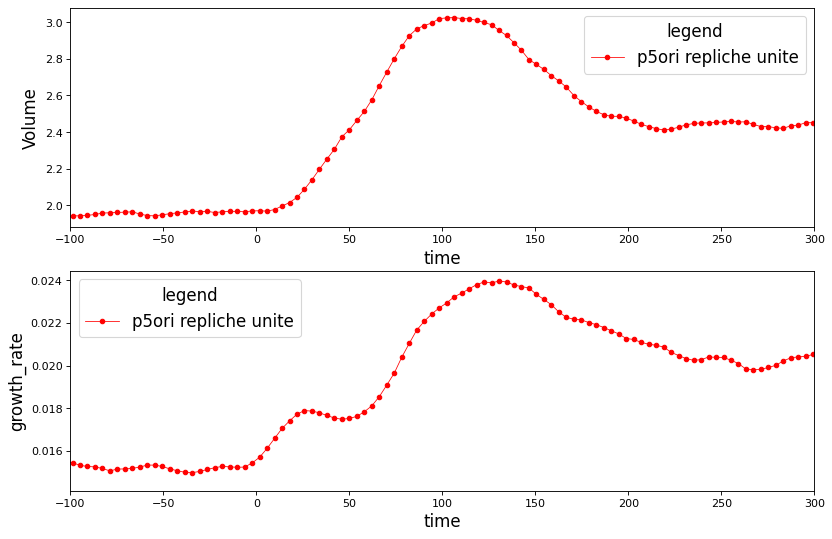

In [71]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(2,1,2)
ax1= fig.add_subplot(2,1,1)

ax2.set_xlabel("time", fontsize=15)
ax2.set_ylabel('growth_rate', fontsize=15)

ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('Volume', fontsize=15)

ax2.set_xlim(-100,300)
ax1.set_xlim(-100,300)


ax2.plot(np.linspace(-300,400,len(growth_mean_p5ori_u)),growth_mean_p5ori_u, 'ro-',markersize=4, linewidth=0.7, label= 'p5ori repliche unite')
#ax3.plot(p5ori_r3['tTrans'],p5ori_r3['der']/p5ori_r3['V'], 'go',markersize=4, linewidth=0.7, label= 'unified replicas p5ori')
ax1.plot(np.linspace(-300,400,len(volume_mean_p5ori_u)),volume_mean_p5ori_u, 'ro-',markersize=4, linewidth=0.7, label= 'p5ori repliche unite')

ax1.legend(fontsize=15, title='legend',title_fontsize=15)
ax2.legend(fontsize=15, title='legend',title_fontsize=15)

plt.savefig('/home/valerio/tesi/plot_venerdi/growth_p5ori.pdf')

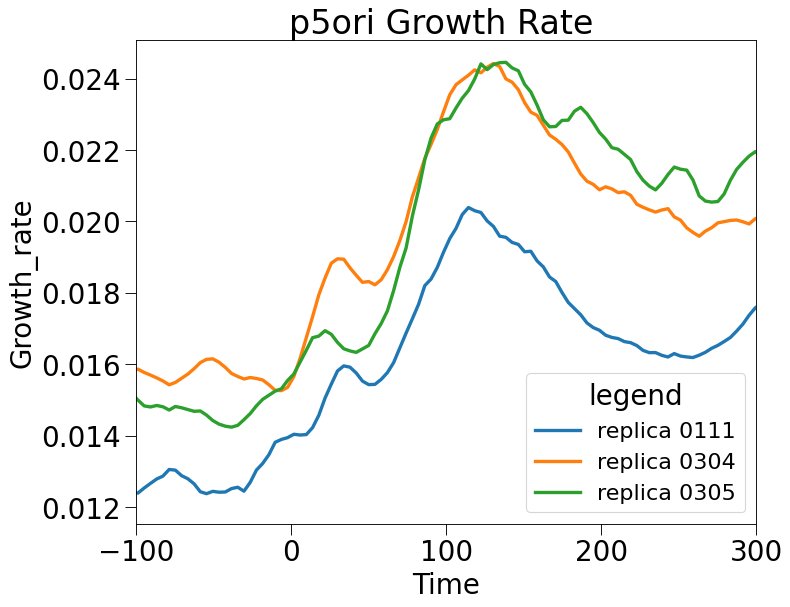

In [72]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('p5ori Growth Rate ', fontsize=30)


ax.set_xlim(-100,300)


ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_1)),growth_mean_p5ori_1, '-',markersize=4, linewidth=3, label= 'replica 0111')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_2)),growth_mean_p5ori_2, '-',markersize=4, linewidth=3, label= 'replica 0304')
#ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_1)),growth_mean_p5ori_1, '-',markersize=4, linewidth=3, label= 'replica ')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_3)),growth_mean_p5ori_3, '-',markersize=4, linewidth=3, label= 'replica 0305')

#ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_u)),growth_mean_p5ori_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
#ax.axhline(y=np.array(growth_mean_p5ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20, title='legend',title_fontsize=25,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_p5ori.pdf')

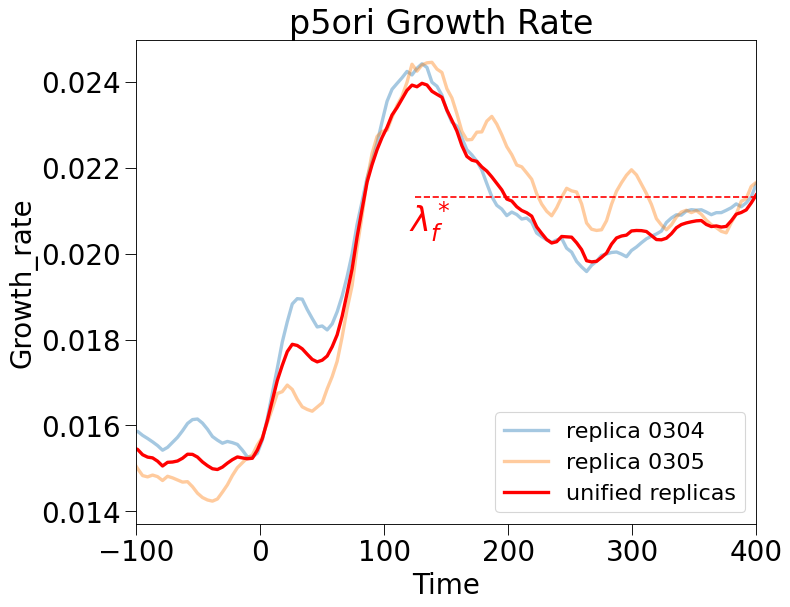

In [73]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('p5ori Growth Rate ', fontsize=30)


ax.set_xlim(-100,400)


ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_2)),growth_mean_p5ori_2, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0304')
#ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_1)),growth_mean_p5ori_1, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica ')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_3)),growth_mean_p5ori_3, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0305')

ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_u)),growth_mean_p5ori_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
ax.axhline(y=np.array(growth_mean_p5ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20,title_fontsize=2,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_p5ori_trasparente.pdf')

# sezione dedicata a derivate e calcolo di growth rate P1longter


In [74]:
#aggiungo al dataframe una colonna di zeri che è il growth rate, lascio le repliche separate per facilità nel calcolo del growth rate

p1longter_r1=read_replica_tot('P1longter3',p1longter3_index[0])
p1longter_r2=read_replica_tot('P1longter3',p1longter3_index[1])



p1longter_r1=p1longter_r1.drop(['w','L','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0','xCM','yCM','orientation'],axis='columns')
p1longter_r2=p1longter_r2.drop(['w','L','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0','xCM','yCM','orientation'],axis='columns')


%run function.py

g1=p1longter_r1.groupby(['fov','line','cellID'])
g2=p1longter_r2.groupby(['fov','line','cellID'])



In [75]:
#creo array ausiliari che servono solo come appoggio nel calcolo

array_appoggio1=np.empty(0)
array_appoggio2=np.empty(0)



In [76]:
#calcolo della derivata temporale iterando su tutte le cellule,identificate da (fov,line,cellID)
for name, group in g1:
    df1=g1.get_group(name).reset_index()
    array_appoggio1=np.append(array_appoggio1 , derivata_sg(np.array(df1['tTrans']),np.array(df1['V'])))

for name, group in g2:    
    df2=g2.get_group(name).reset_index()
    array_appoggio2=np.append(array_appoggio2 , derivata_sg(np.array(df2['tTrans']),np.array(df2['V'])))


    
    
    

In [77]:
#aggiungo la colonna delle derivate al dataframe
p1longter_r1=p1longter_r1.join(pd.Series(array_appoggio1,name='der'))
p1longter_r2=p1longter_r2.join(pd.Series(array_appoggio2,name='der'))


In [78]:
std1=(p1longter_r1['der']/p1longter_r1['V']).std()
mean1=(p1longter_r1['der']/p1longter_r1['V']).mean()

p1longter_r1=p1longter_r1[((p1longter_r1['der']/p1longter_r1['V'])< mean1 + 3*std1) & ((p1longter_r1['der']/p1longter_r1['V'])> mean1 - 3*std1)]
growth_mean_p1longter_1=bin_mean(p1longter_r1.tTrans,(p1longter_r1.der/p1longter_r1.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p1longter_1=bin_mean(p1longter_r1.tTrans,(p1longter_r1.V),4,20,-300,400,interval='custom')

std2=(p1longter_r2['der']/p1longter_r2['V']).std()
mean2=(p1longter_r2['der']/p1longter_r2['V']).mean()

p1longter_r2=p1longter_r2[((p1longter_r2['der']/p1longter_r2['V'])< mean2 + 3*std2) & ((p1longter_r2['der']/p1longter_r2['V'])> mean2 - 3*std2)]
growth_mean_p1longter_2=bin_mean(p1longter_r2.tTrans,(p1longter_r2.der/p1longter_r2.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p1longter_2=bin_mean(p1longter_r2.tTrans,(p1longter_r2.V),4,20,-300,400,interval='custom')


# plot P1longter repliche unite serie temporale growth rate 

In [79]:
unified_p1longter_new=pd.concat([p1longter_r1,p1longter_r2], ignore_index=True)

In [80]:
std_p1longter_u=(unified_p1longter_new['der']/unified_p1longter_new['V']).std()
mean_p1longter_u=(unified_p1longter_new['der']/unified_p1longter_new['V']).mean()

unified_p1longter_new=unified_p1longter_new[((unified_p1longter_new['der']/unified_p1longter_new['V'])< mean_p1longter_u + 3*std_p1longter_u) & ((unified_p1longter_new['der']/unified_p1longter_new['V'])> mean_p1longter_u - 3*std_p1longter_u)]
growth_mean_p1longter_u=bin_mean(unified_p1longter_new.tTrans,(unified_p1longter_new.der/unified_p1longter_new.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p1longter_u=bin_mean(unified_p1longter_new.tTrans,(unified_p1longter_new.V),4,20,-300,400,interval='custom')

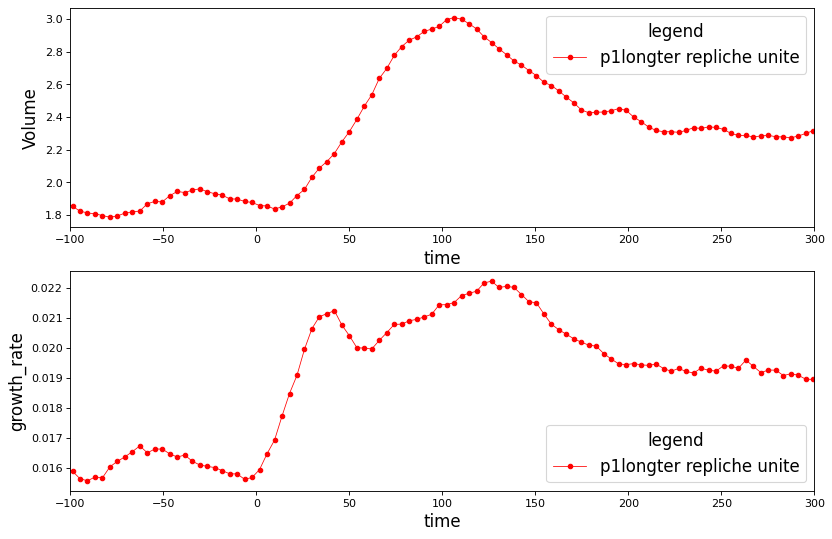

In [81]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(2,1,2)
ax1= fig.add_subplot(2,1,1)

ax2.set_xlabel("time", fontsize=15)
ax2.set_ylabel('growth_rate', fontsize=15)

ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('Volume', fontsize=15)

ax2.set_xlim(-100,300)
ax1.set_xlim(-100,300)



ax2.plot(np.linspace(-300,400,len(growth_mean_p1longter_u)),growth_mean_p1longter_u, 'ro-',markersize=4, linewidth=0.7, label= 'p1longter repliche unite')
#ax3.plot(p1longter_r3['tTrans'],p1longter_r3['der']/p1longter_r3['V'], 'go',markersize=4, linewidth=0.7, label= 'unified replicas p1longter')
ax1.plot(np.linspace(-300,400,len(volume_mean_p1longter_u)),volume_mean_p1longter_u, 'ro-',markersize=4, linewidth=0.7, label= 'p1longter repliche unite')

ax1.legend(fontsize=15, title='legend',title_fontsize=15)
ax2.legend(fontsize=15, title='legend',title_fontsize=15)

plt.savefig('/home/valerio/tesi/plot_venerdi/growth_p1longter.pdf')

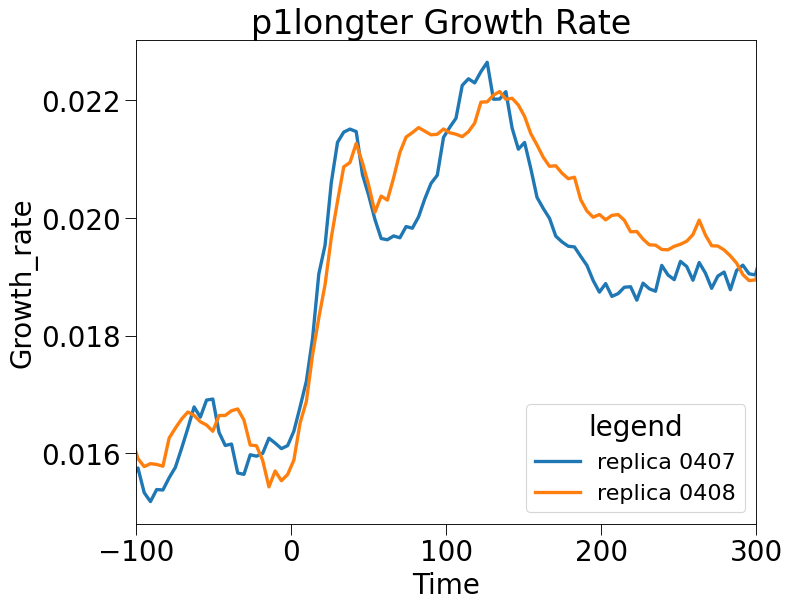

In [82]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('p1longter Growth Rate ', fontsize=30)


ax.set_xlim(-100,300)


ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_1)),growth_mean_p1longter_1, '-',markersize=4, linewidth=3, label= 'replica 0407')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_2)),growth_mean_p1longter_2, '-',markersize=4, linewidth=3, label= 'replica 0408')
#ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_1)),growth_mean_p1longter_1, '-',markersize=4, linewidth=3, label= 'replica ')

#ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_u)),growth_mean_p1longter_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
#ax.axhline(y=np.array(growth_mean_p1longter_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20, title='legend',title_fontsize=25,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_p1longter.pdf')

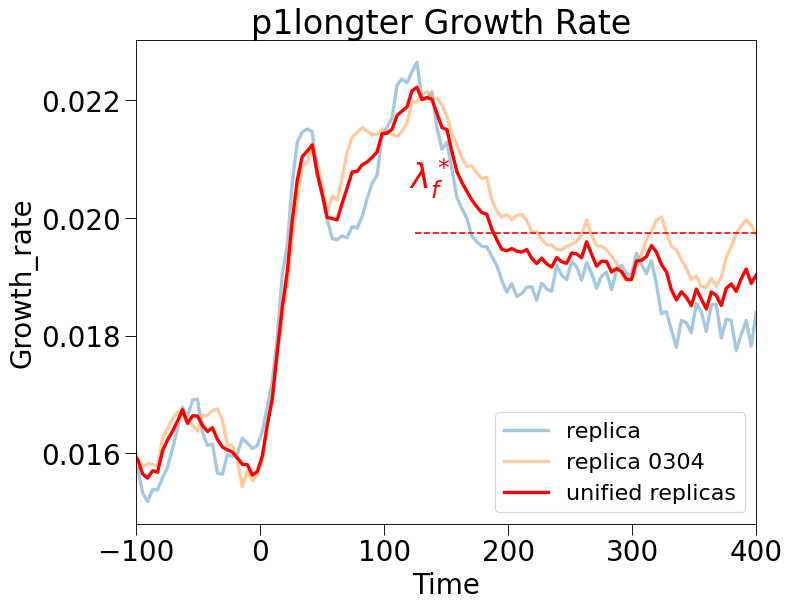

In [83]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('p1longter Growth Rate ', fontsize=30)


ax.set_xlim(-100,400)

ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_1)),growth_mean_p1longter_1, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica ')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_2)),growth_mean_p1longter_2, '-',markersize=4, linewidth=3,alpha=0.4, label= 'replica 0304')

ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_u)),growth_mean_p1longter_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
ax.axhline(y=np.array(growth_mean_p1longter_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20,title_fontsize=2,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_p1longter_trasparente.pdf')

# sezione dedicata a derivate e calcolo di growth rate P1ter


In [84]:
#aggiungo al dataframe una colonna di zeri che è il growth rate, lascio le repliche separate per facilità nel calcolo del growth rate

p1ter_r1=read_replica_tot('P1ter3',p1ter3_index[0])



p1ter_r1=p1ter_r1.drop(['w','L','growthRateL2_0','area','growthRatearea2_0','growthRateV2_0','SA','growthRateSA2_0','beta2SA_V_2_0','xCM','yCM','orientation'],axis='columns')


%run function.py

g1=p1ter_r1.groupby(['fov','line','cellID'])



In [85]:
#creo array ausiliari che servono solo come appoggio nel calcolo

array_appoggio1=np.empty(0)



In [86]:
#calcolo della derivata temporale iterando su tutte le cellule,identificate da (fov,line,cellID)
for name, group in g1:
    df1=g1.get_group(name).reset_index()
    array_appoggio1=np.append(array_appoggio1 , derivata_sg(np.array(df1['tTrans']),np.array(df1['V'])))



    
    
    

In [87]:
#aggiungo la colonna delle derivate al dataframe
p1ter_r1=p1ter_r1.join(pd.Series(array_appoggio1,name='der'))


# plot P1ter repliche unite serie temporale growth rate 

In [88]:
unified_p1ter_new=pd.concat([p1ter_r1], ignore_index=True)

In [89]:
std_p1ter_u=(unified_p1ter_new['der']/unified_p1ter_new['V']).std()
mean_p1ter_u=(unified_p1ter_new['der']/unified_p1ter_new['V']).mean()

unified_p1ter_new=unified_p1ter_new[((unified_p1ter_new['der']/unified_p1ter_new['V'])< mean_p1ter_u + 3*std_p1ter_u) & ((unified_p1ter_new['der']/unified_p1ter_new['V'])> mean_p1ter_u - 3*std_p1ter_u)]
growth_mean_p1ter_u=bin_mean(unified_p1ter_new.tTrans,(unified_p1ter_new.der/unified_p1ter_new.V),4,20,-300,400,interval='custom')
#unified_mod[unified_mod['tTrans']>100]
volume_mean_p1ter_u=bin_mean(unified_p1ter_new.tTrans,(unified_p1ter_new.V),4,20,-300,400,interval='custom')

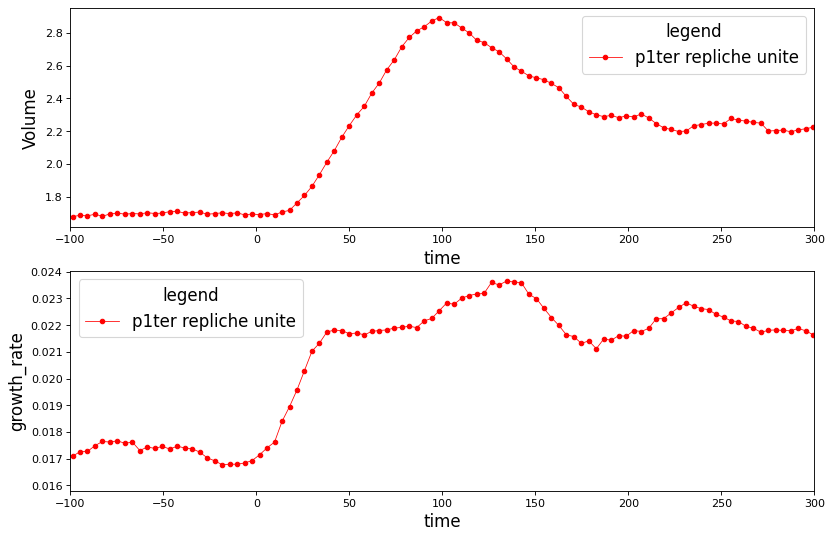

In [90]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(2,1,2)
ax1= fig.add_subplot(2,1,1)

ax2.set_xlabel("time", fontsize=15)
ax2.set_ylabel('growth_rate', fontsize=15)

ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('Volume', fontsize=15)

ax2.set_xlim(-100,300)
ax1.set_xlim(-100,300)



ax2.plot(np.linspace(-300,400,len(growth_mean_p1ter_u)),growth_mean_p1ter_u, 'ro-',markersize=4, linewidth=0.7, label= 'p1ter repliche unite')
#ax3.plot(p1ter_r3['tTrans'],p1ter_r3['der']/p1ter_r3['V'], 'go',markersize=4, linewidth=0.7, label= 'unified replicas p1ter')
ax1.plot(np.linspace(-300,400,len(volume_mean_p1ter_u)),volume_mean_p1ter_u, 'ro-',markersize=4, linewidth=0.7, label= 'p1ter repliche unite')

ax1.legend(fontsize=15, title='legend',title_fontsize=15)
ax2.legend(fontsize=15, title='legend',title_fontsize=15)

plt.savefig('/home/valerio/tesi/plot_venerdi/growth_p1ter.pdf')

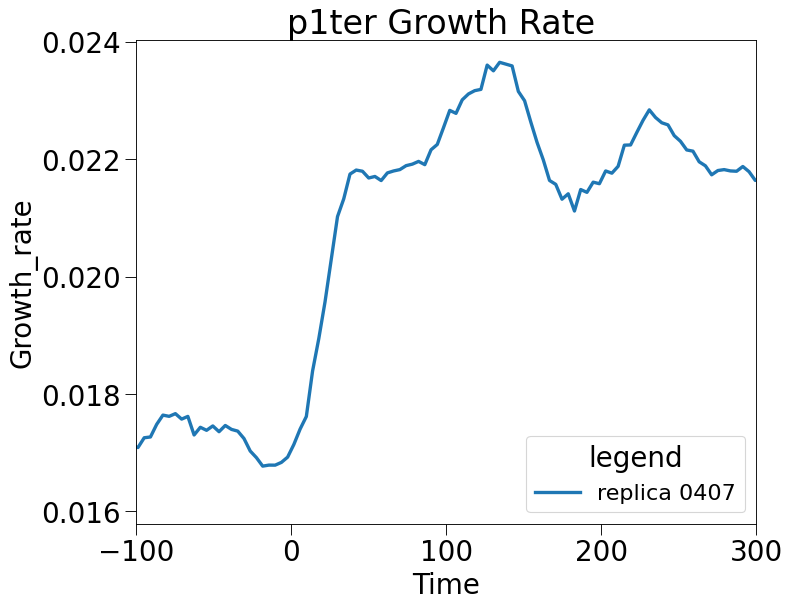

In [91]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('p1ter Growth Rate ', fontsize=30)


ax.set_xlim(-100,300)


ax.plot(np.linspace(-300,400,len(growth_mean_p1ter_u)),growth_mean_p1ter_u, '-',markersize=4, linewidth=3, label= 'replica 0407')
#ax.plot(np.linspace(-300,400,len(growth_mean_p1ter_1)),growth_mean_p1ter_1, '-',markersize=4, linewidth=3, label= 'replica ')

#ax.plot(np.linspace(-300,400,len(growth_mean_p1ter_u)),growth_mean_p1ter_u, 'r-',markersize=4, linewidth=3, label= 'unified replicas')
#ax.axhline(y=np.array(growth_mean_p1ter_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20, title='legend',title_fontsize=25,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_p1ter.pdf')

# Vedere come varia $\lambda$ nelle diverse strain tra steady state 1 e steady state 2

In [92]:
p1ori_growth=[np.array(growth_mean_p1ori_u[50:75]).mean(),np.array(growth_mean_p1ori_u[109:138]).mean()]
p1longori_growth=[np.array(growth_mean_p1longori_u[50:75]).mean(),np.array(growth_mean_p1longori_u[109:138]).mean()]
p5ter_growth=[np.array(growth_mean_p5ter_u[50:75]).mean(),np.array(growth_mean_p5ter_u[109:138]).mean()]
p5ori_growth=[np.array(growth_mean_p5ori_u[50:75]).mean(),np.array(growth_mean_p5ori_u[109:138]).mean()]
p1ter_growth=[np.array(growth_mean_p1ter_u[50:75]).mean(),np.array(growth_mean_p1ter_u[109:138]).mean()]
p1longter_growth=[np.array(growth_mean_p1longter_u[50:75]).mean(),np.array(growth_mean_p1longter_u[109:138]).mean()]

growth_tot=pd.DataFrame({'growth_i':[p1ori_growth[0],p1longori_growth[0],p5ter_growth[0],p5ori_growth[0],
                          p1ter_growth[0],p1longter_growth[0]],
                        'growth_f':[p1ori_growth[1],p1longori_growth[1],p5ter_growth[1],p5ori_growth[1],
                          p1ter_growth[1],p1longter_growth[1]]}, 
                         index=['p1ori','p1longori','p5ter','p5ori','p1ter','p1longter'])

/tmp/ipykernel_4768/1039402946.py:3: RuntimeWarning: Mean of empty slice.
  p5ter_growth=[np.array(growth_mean_p5ter_u[50:75]).mean(),np.array(growth_mean_p5ter_u[109:138]).mean()]
/home/valerio/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [93]:
growth_tot.growth_f-growth_tot.growth_i

p1ori        0.005353
p1longori    0.003798
p5ter             NaN
p5ori        0.006451
p1ter        0.004937
p1longter    0.003896
dtype: float64

In [94]:
np.linspace(0,5,6)

array([0., 1., 2., 3., 4., 5.])

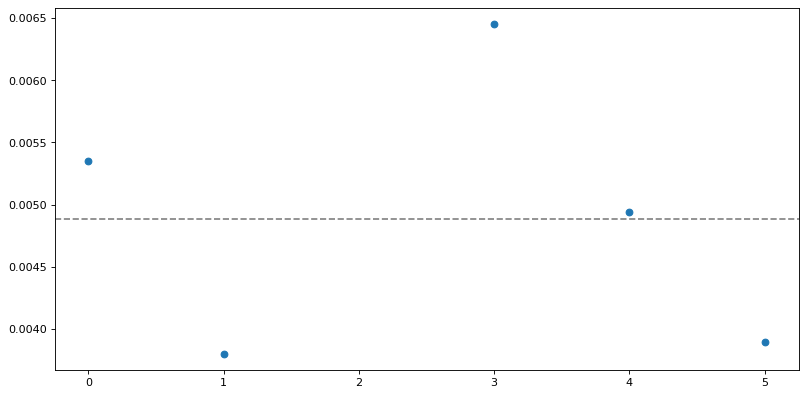

In [95]:
fig=plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
ax1=fig.add_subplot(111)


plt.plot(np.linspace(0,5,6),growth_tot.growth_f-growth_tot.growth_i, 'o')
ax1.axhline(y=(growth_tot.growth_f-growth_tot.growth_i).mean(), linestyle='--', color='grey')


#plt.set_ticklabels(growth_tot.index)
#ax2.scatter(growth_tot.growth_f,growth_tot.growth_i,c=growth_tot.growth_f, cmap='hsv')
#ax.axes.xaxis.set_ticklabels(growth_tot.index.values)

#ax2.plot(np.linspace(-300,400,len(p1longori_mean_df)),p1longori_mean_df.chi_r, '-',color='orange', linewidth=4)

#plt.savefig('/home/valerio/tesi/plot_venerdi/diff_growt.pdf')

# Plot  di tutti i growth rate

In [114]:
df_growth_unified=pd.DataFrame()

In [124]:
df_growth_unified['p1ori']=growth_mean_p1ori_u
df_growth_unified['p1longori']=growth_mean_p1longori_u
df_growth_unified['p5ori']=growth_mean_p5ori_u
df_growth_unified['p5ter']=growth_mean_p5ter_u
df_growth_unified['p1longter']=growth_mean_p1longter_u
df_growth_unified.to_csv(growth_path+'growth_unified.csv')

In [126]:
unified_p1longori_new.to_csv(growth_path+'unified_p1longori.csv')
unified_p1ori_new.to_csv(growth_path+'unified_p1ori.csv')
unified_p5ori_new.to_csv(growth_path+'unified_p5ori.csv')
unified_p1longter_new.to_csv(growth_path+'unified_p1longter.csv')
unified_p5ter_new.to_csv(growth_path+'unified_p5ter.csv')


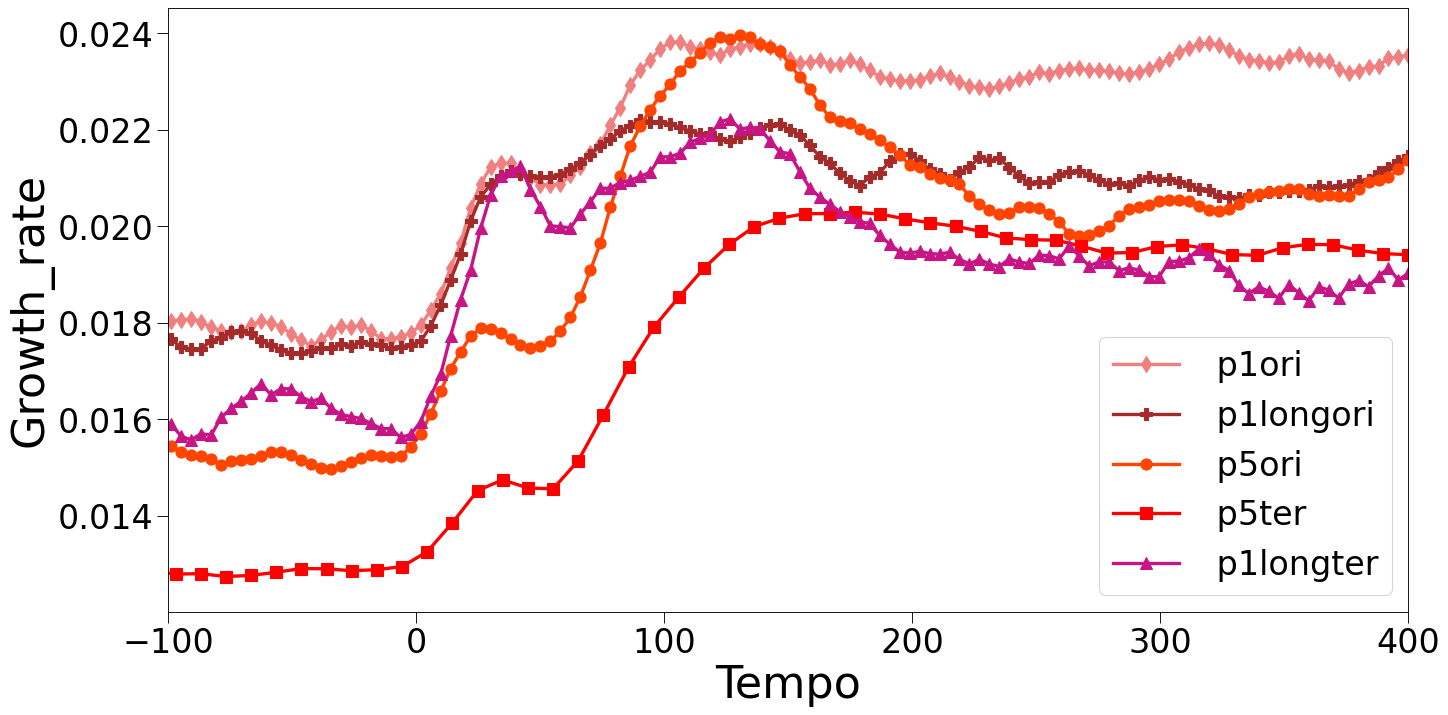

In [96]:
fig=plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)


ax.set_xlabel("Tempo", fontsize=40)
ax.set_ylabel('Growth_rate', fontsize=40)


ax.tick_params(which='major', length=10, labelsize=30)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

#ax.set_title('Growth Rate comparison ', fontsize=40)


ax.set_xlim(-100,400)

colors = plt.cm.Reds(np.linspace(0.1,1,6))

ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_u)),growth_mean_p1ori_u, 'd-',color='lightcoral',markersize=10, linewidth=3, label= ' p1ori')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),growth_mean_p1longori_u, 'P-',color='brown',markersize=10, linewidth=3, label= ' p1longori')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_u)),growth_mean_p5ori_u, 'o-',color='orangered',markersize=10, linewidth=3, label= ' p5ori')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ter_u)),growth_mean_p5ter_u, 's-',color='red',markersize=10, linewidth=3, label= ' p5ter')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_u)),growth_mean_p1longter_u, '^-',color='mediumvioletred',markersize=10, linewidth=3, label= ' p1longter')

#ax.axhline(y=np.array(growth_mean_p5ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=30,title_fontsize=30,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_tot1.pdf')

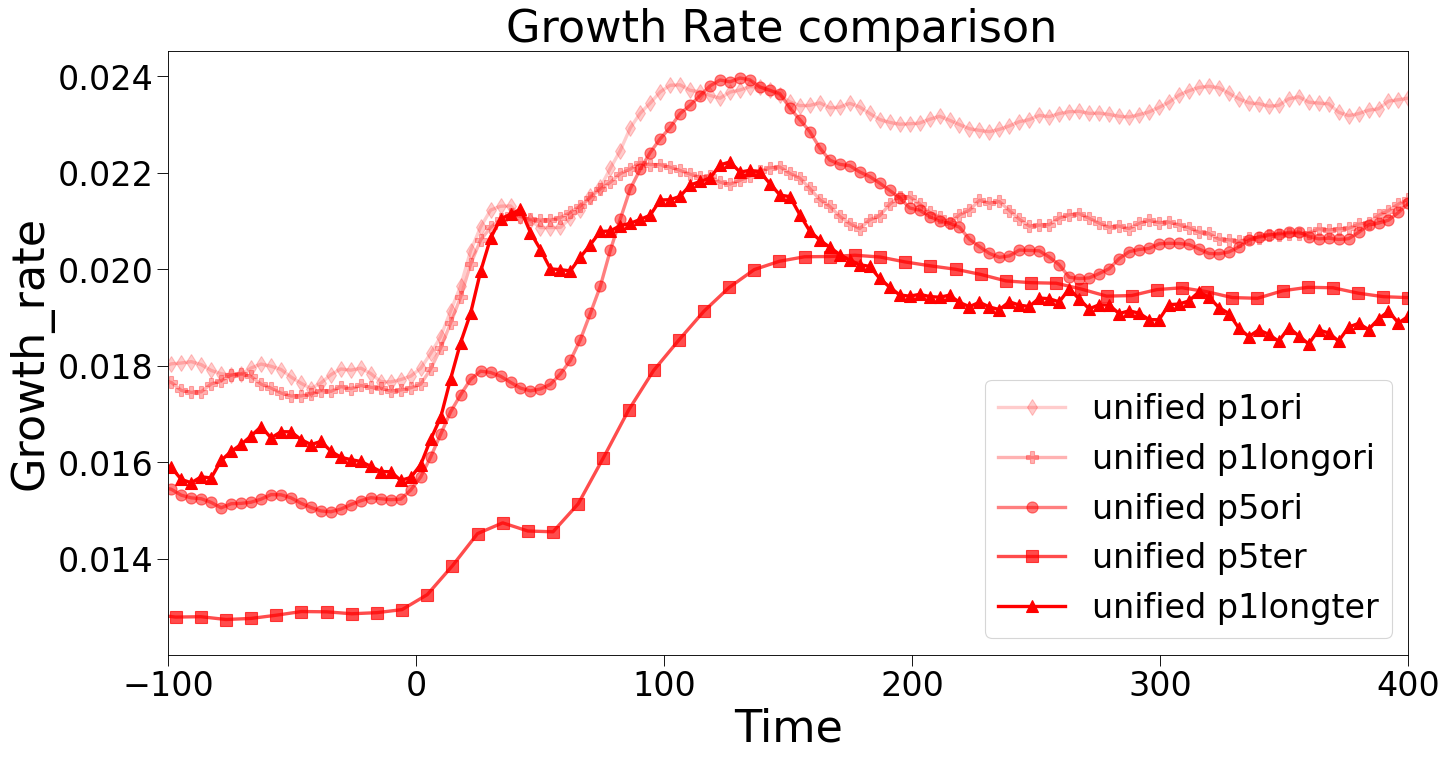

In [97]:
fig=plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)


ax.set_xlabel("Time", fontsize=40)
ax.set_ylabel('Growth_rate', fontsize=40)


ax.tick_params(which='major', length=10, labelsize=30)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Growth Rate comparison ', fontsize=40)


ax.set_xlim(-100,400)

colors = plt.cm.Reds(np.linspace(0.1,1,6))

ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_u)),growth_mean_p1ori_u, 'd-',color='red',markersize=10, linewidth=3,alpha=0.2, label= 'unified p1ori')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),growth_mean_p1longori_u, 'P-',color='red',markersize=10, linewidth=3,alpha=0.3, label= 'unified p1longori')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_u)),growth_mean_p5ori_u, 'o-',color='red',markersize=10, linewidth=3,alpha=0.5, label= 'unified p5ori')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ter_u)),growth_mean_p5ter_u, 's-',color='red',markersize=10, linewidth=3,alpha=0.7, label= 'unified p5ter')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_u)),growth_mean_p1longter_u, '^-',color='red',markersize=10, linewidth=3,alpha=1, label= 'unified p1longter')

#ax.axhline(y=np.array(growth_mean_p5ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=30,title_fontsize=30,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_tot1.pdf')

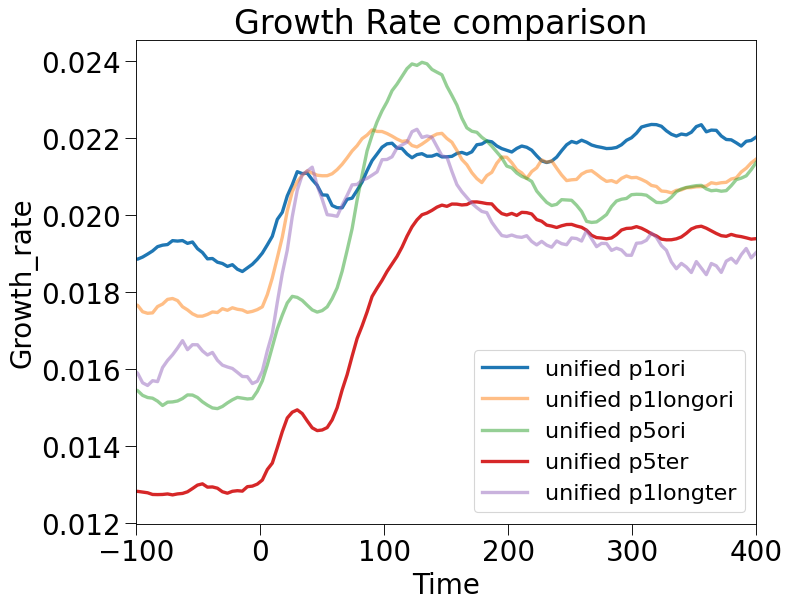

In [190]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Growth Rate comparison ', fontsize=30)


ax.set_xlim(-100,400)


ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_u)),growth_mean_p1ori_u, '-',markersize=4, linewidth=3, label= 'unified p1ori')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),growth_mean_p1longori_u, '-',markersize=4, linewidth=3,alpha=0.5, label= 'unified p1longori')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_u)),growth_mean_p5ori_u, '-',markersize=4, linewidth=3,alpha=0.5, label= 'unified p5ori')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ter_u)),np.array(growth_mean_p5ter_u), '-',markersize=4, linewidth=3, label= 'unified p5ter')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_u)),growth_mean_p1longter_u, '-',markersize=4, linewidth=3,alpha=0.5, label= 'unified p1longter')

#ax.axhline(y=np.array(growth_mean_p5ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20,title_fontsize=2,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_tot2.pdf')

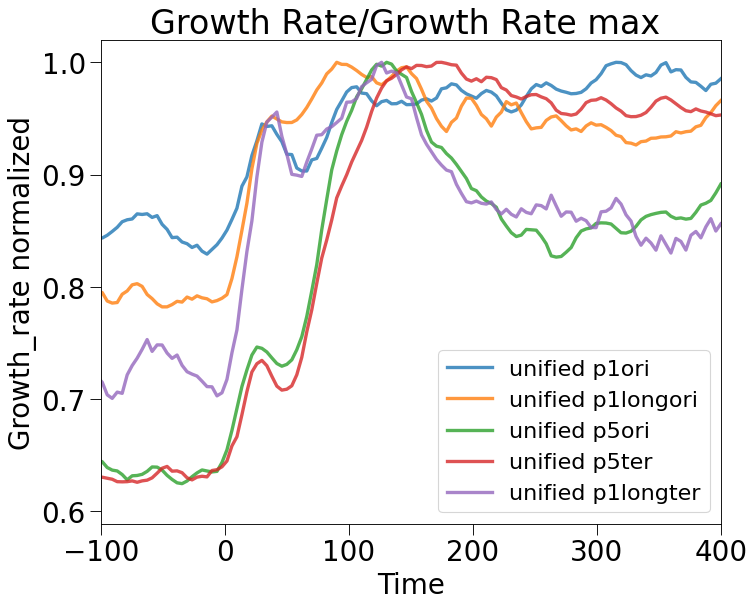

In [104]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate normalized', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Growth Rate/Growth Rate max ', fontsize=30)


ax.set_xlim(-100,400)


ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_u)),growth_mean_p1ori_u/np.array(growth_mean_p1ori_u).max(), '-',markersize=4, linewidth=3,alpha=0.8, label= 'unified p1ori')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),growth_mean_p1longori_u/np.array(growth_mean_p1longori_u).max(), '-',markersize=4, linewidth=3,alpha=0.8, label= 'unified p1longori')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_u)),growth_mean_p5ori_u/np.array(growth_mean_p5ori_u).max(), '-',markersize=4, linewidth=3,alpha=0.8, label= 'unified p5ori')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ter_u)),growth_mean_p5ter_u/np.array(growth_mean_p5ter_u).max(), '-',markersize=4, linewidth=3,alpha=0.8, label= 'unified p5ter')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_u)),growth_mean_p1longter_u/np.array(growth_mean_p1longter_u).max(), '-',markersize=4, linewidth=3,alpha=0.8, label= 'unified p1longter')

#ax.axhline(y=np.array(growth_mean_p5ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20,title_fontsize=2,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_tot3.pdf')

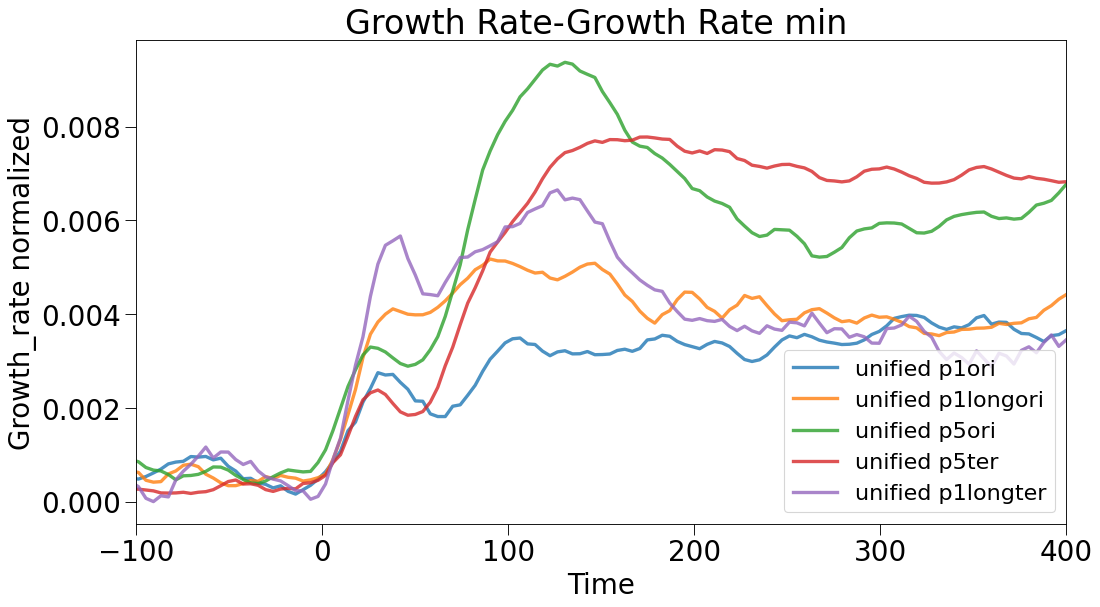

In [105]:
fig=plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel('Growth_rate normalized', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Growth Rate-Growth Rate min ', fontsize=30)


ax.set_xlim(-100,400)


ax.plot(np.linspace(-300,400,len(growth_mean_p1ori_u)),growth_mean_p1ori_u-np.array(growth_mean_p1ori_u).min(), '-',markersize=4, linewidth=3,alpha=0.8, label= 'unified p1ori')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),growth_mean_p1longori_u-np.array(growth_mean_p1longori_u).min(), '-',markersize=4, linewidth=3,alpha=0.8, label= 'unified p1longori')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ori_u)),growth_mean_p5ori_u-np.array(growth_mean_p5ori_u).min(), '-',markersize=4, linewidth=3,alpha=0.8, label= 'unified p5ori')
ax.plot(np.linspace(-300,400,len(growth_mean_p5ter_u)),growth_mean_p5ter_u-np.array(growth_mean_p5ter_u).min(), '-',markersize=4, linewidth=3,alpha=0.8, label= 'unified p5ter')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longter_u)),growth_mean_p1longter_u-np.array(growth_mean_p1longter_u).min(), '-',markersize=4, linewidth=3,alpha=0.8, label= 'unified p1longter')

#ax.axhline(y=np.array(growth_mean_p5ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20,title_fontsize=2,loc='lower right')
plt.savefig('/home/valerio/tesi/data_managment/growth_tot4.pdf')

# ISTOGRAMMI 


Il primo istogramma che vorrei fare è quello della distribuozione dei tempi di divisione delle cellule

In [106]:
g_len_p1longori=unified_p1longori_new.groupby(['fov','line','cellID'])
array_len_p1longori=np.empty(0)

g_len_p1ori=unified_p1ori_new.groupby(['fov','line','cellID'])
array_len_p1ori=np.empty(0)

g_len_p5ori=unified_p5ori_new.groupby(['fov','line','cellID'])
array_len_p5ori=np.empty(0)

g_len_p5ter=unified_p5ter_new.groupby(['fov','line','cellID'])
array_len_p5ter=np.empty(0)

g_len_p1longter=unified_p1longter_new.groupby(['fov','line','cellID'])
array_len_p1longter=np.empty(0)

In [107]:
for name, group in g_len_p1longori:
    array_len_p1longori=np.append(array_len_p1longori ,5*len(g_len_p1longori.get_group(name)))

for name, group in g_len_p1ori:
    array_len_p1ori=np.append(array_len_p1ori ,5*len(g_len_p1ori.get_group(name)))
    
for name, group in g_len_p5ori:
    array_len_p5ori=np.append(array_len_p5ori ,5*len(g_len_p5ori.get_group(name)))
    
for name, group in g_len_p5ter:
    array_len_p5ter=np.append(array_len_p5ter ,5*len(g_len_p5ter.get_group(name)))
    
for name, group in g_len_p1longter:
    array_len_p1longter=np.append(array_len_p1longter ,5*len(g_len_p1longter.get_group(name)))

In [108]:
array_len_p1ori.mean()

43.031277818240675

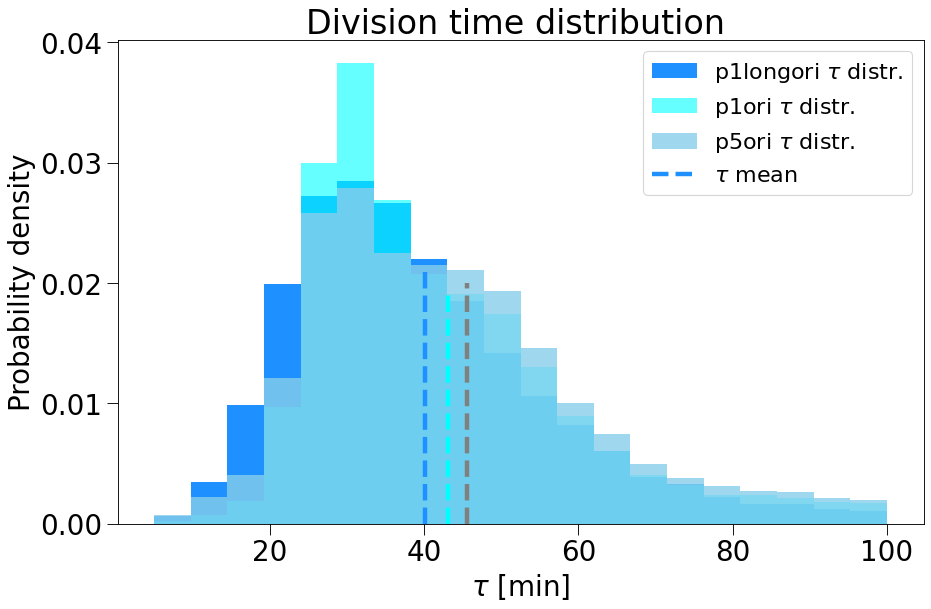

In [109]:
fig=plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel(r"$\tau$ [min]", fontsize=25)
ax.set_ylabel('Probability density', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Division time distribution ', fontsize=30)


#ax.set_xlim(-100,400)


ax.hist(array_len_p1longori ,density=True, bins=20,color='dodgerblue', range= (5,100), label=r'p1longori $\tau$ distr.')
ax.hist(array_len_p1ori ,density=True, bins=20, range= (5,100),color='cyan', alpha=0.6,label=r'p1ori $\tau$ distr.')
ax.hist(array_len_p5ori ,density=True, bins=20, range= (5,100),color='skyblue', alpha=0.8,label=r'p5ori $\tau$ distr.')

ax.vlines([array_len_p1longori.mean(),array_len_p1ori.mean(),array_len_p5ori.mean()],
          ymin=0,ymax=[0.022,0.019,0.02],linestyle='--',linewidth=4,colors=['dodgerblue','cyan','grey'], 
          label=r'$\tau$ mean')

#ax.axhline(y=np.array(growth_mean_p5ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20,title_fontsize=2,loc='upper right')
plt.savefig('/home/valerio/tesi/data_managment/tau_distribution1.pdf')

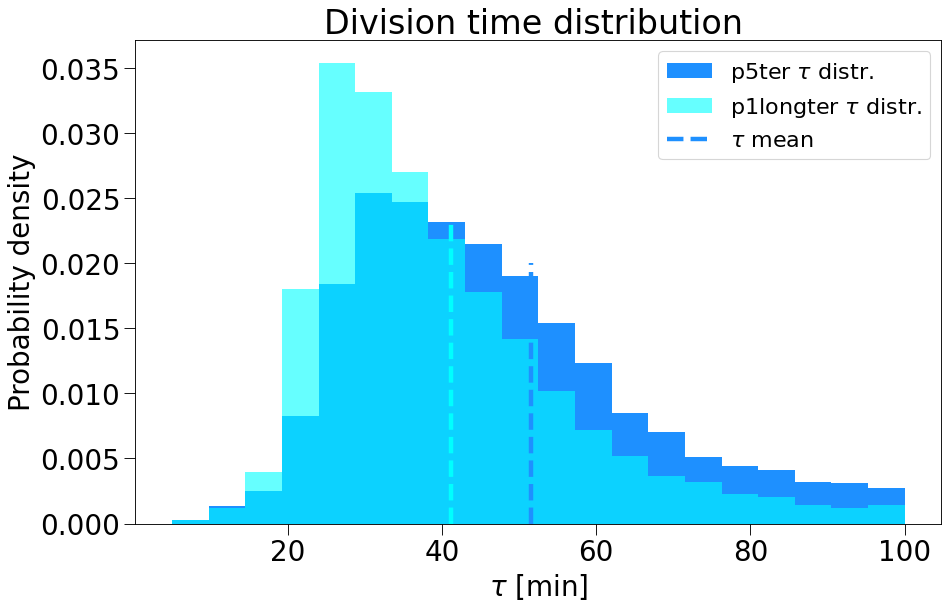

In [110]:
fig=plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel(r"$\tau$ [min]", fontsize=25)
ax.set_ylabel('Probability density', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Division time distribution ', fontsize=30)


#ax.set_xlim(-100,400)


ax.hist(array_len_p5ter ,density=True, bins=20,color='dodgerblue', range= (5,100),label=r'p5ter $\tau$ distr.')
ax.hist(array_len_p1longter ,density=True, bins=20, range= (5,100),color='cyan', alpha=0.6,label=r'p1longter $\tau$ distr.')

ax.vlines([array_len_p5ter.mean(),array_len_p1longter.mean()],
          ymin=0,ymax=[0.020,0.023],linestyle='--',linewidth=4,colors=['dodgerblue','cyan'],label=r'$\tau$ mean')

#ax.axhline(y=np.array(growth_mean_p5ori_u[100:]).mean(),xmin=0.45,  linestyle='--', color='red')
#ax.text(120,0.0205,'$\lambda^*_{f}$', color='red',fontsize=30)

ax.legend(fontsize=20,title_fontsize=2,loc='upper right')
plt.savefig('/home/valerio/tesi/data_managment/tau_distribution2.pdf')

In [111]:
df_p1ori_div_u=df_p1ori_div_1.append(df_p1ori_div_2, ignore_index=True)
df_p1longori_div_u=df_p1longori_div_1.append([df_p1longori_div_2,df_p1longori_div_3], ignore_index=True)
df_p5ter_div_u=df_p5ter_div_1.append(df_p5ter_div_2, ignore_index=True)


In [112]:
#len(h[0]/h[0].max()*np.array(growth_mean_p1ori_u).max())

In [113]:
#len(h[1][:-1])

In [114]:
#h[0]

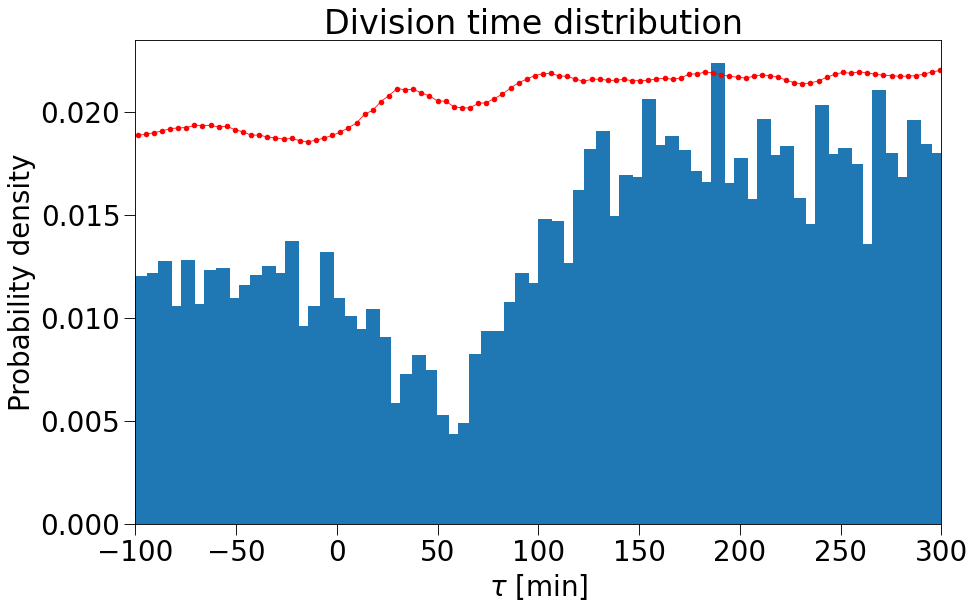

In [115]:
fig=plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel(r"$\tau$ [min]", fontsize=25)
ax.set_ylabel('Probability density', fontsize=25)
ax.set_xlim(-100,300)

ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Division time distribution ', fontsize=30)


#ax.set_xlim(-100,400)


h=ax.hist(df_p1ori_div_u.tTrans , bins=70,density=True, range=(-100,300),color='dodgerblue',label=r'p5ter $\tau$ distr.',alpha=0.)
ax.bar(h[1][:-1],(h[0]/h[0].max()*np.array(growth_mean_p1ori_u).max()),width=7,align='edge')
ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),np.array(growth_mean_p1ori_u),
        'ro-',markersize=4, linewidth=0.7, label= 'p1longori unified replicas')



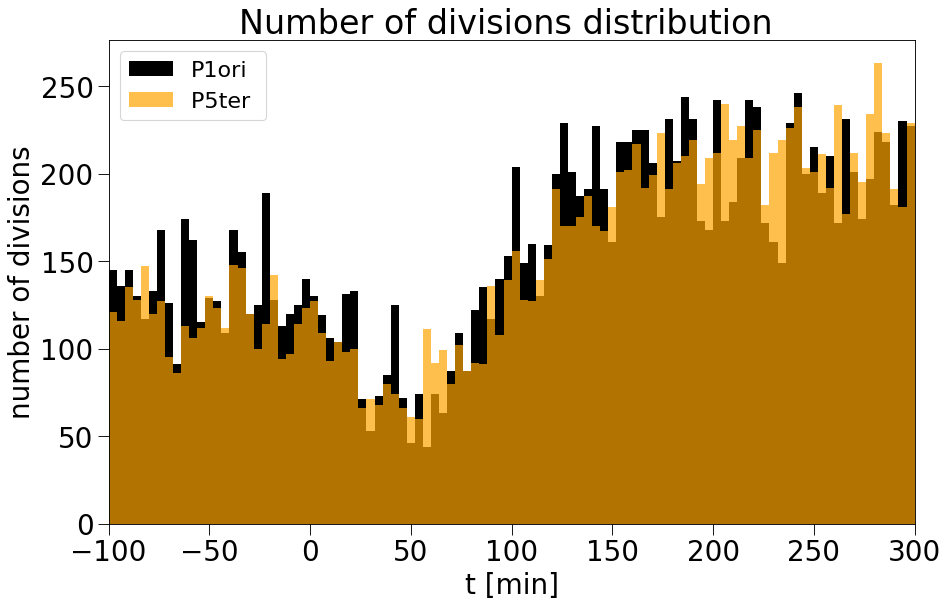

In [116]:
fig=plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("t [min]", fontsize=25)
ax.set_ylabel('number of divisions', fontsize=25)
ax.set_xlim(-100,300)

ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Number of divisions distribution ', fontsize=30)


#ax.set_xlim(-100,400)

#h1=ax.hist(df_p1longori_div_u.tTrans , bins=70, range=(-100,300),color='dodgerblue',label=r'P1longori')
h1=ax.hist(df_p1ori_div_u.tTrans , bins=100, range=(-100,300),color='black',label='P1ori',alpha=1)
h2=ax.hist(df_p5ter_div_u.tTrans , bins=100, range=(-100,300),color='orange',label='P5ter ',alpha=0.7)

ax.legend(fontsize=20)


plt.savefig('/home/valerio/tesi/data_managment/div_distribution.pdf')

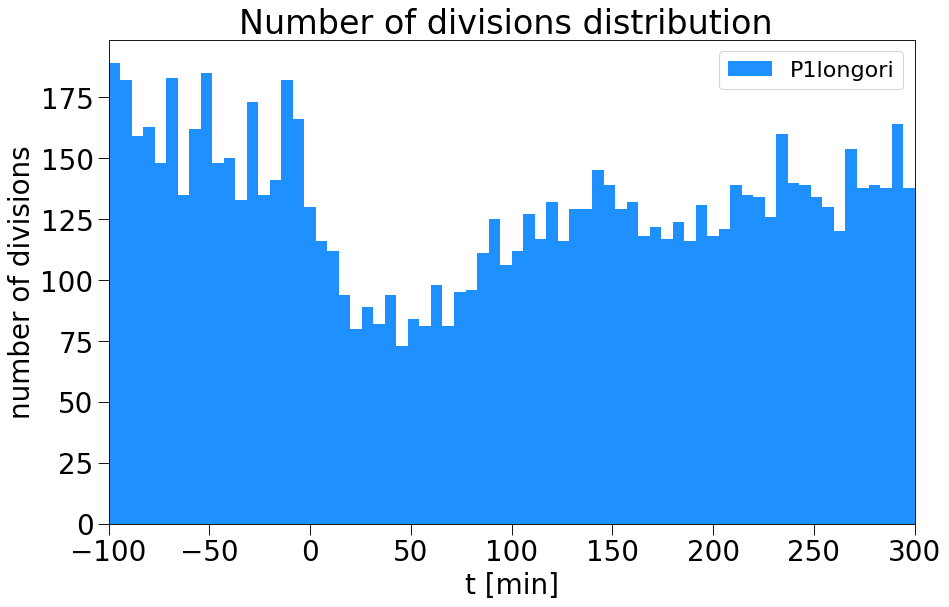

In [117]:
fig=plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("t [min]", fontsize=25)
ax.set_ylabel('number of divisions', fontsize=25)
ax.set_xlim(-100,300)

ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Number of divisions distribution ', fontsize=30)


#ax.set_xlim(-100,400)

h3=ax.hist(df_p1longori_div_u.tTrans , bins=70, range=(-100,300),color='dodgerblue',label=r'P1longori')
#h=ax.hist(df_p1ori_div_u.tTrans , bins=100, range=(-100,300),color='black',label='P1ori',alpha=1)
#h=ax.hist(df_p5ter_div_u.tTrans , bins=100, range=(-100,300),color='orange',label='P5ter ',alpha=0.7)

ax.legend(fontsize=20)


plt.savefig('/home/valerio/tesi/data_managment/div_distribution2.pdf')

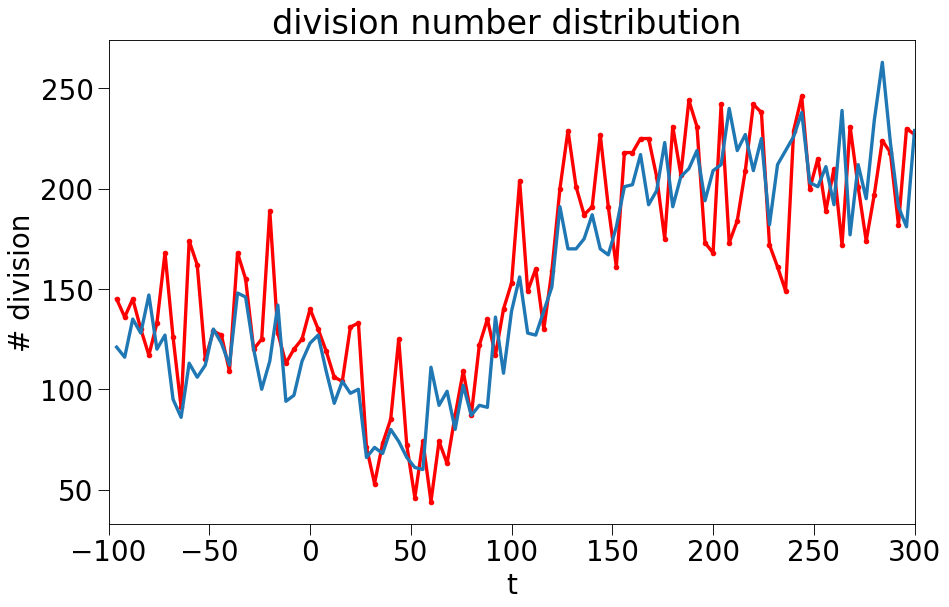

In [118]:
fig=plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel(r"t", fontsize=25)
ax.set_ylabel('# division', fontsize=25)
ax.set_xlim(-100,300)

ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('division number distribution ', fontsize=30)


#ax.set_xlim(-100,400)



ax.plot(h1[1][1:],h1[0],'ro-',markersize=4, linewidth=3, label= 'p1longori unified replicas')
ax.plot(h2[1][1:],h2[0],markersize=4, linewidth=3, label= 'p1longori unified replicas')



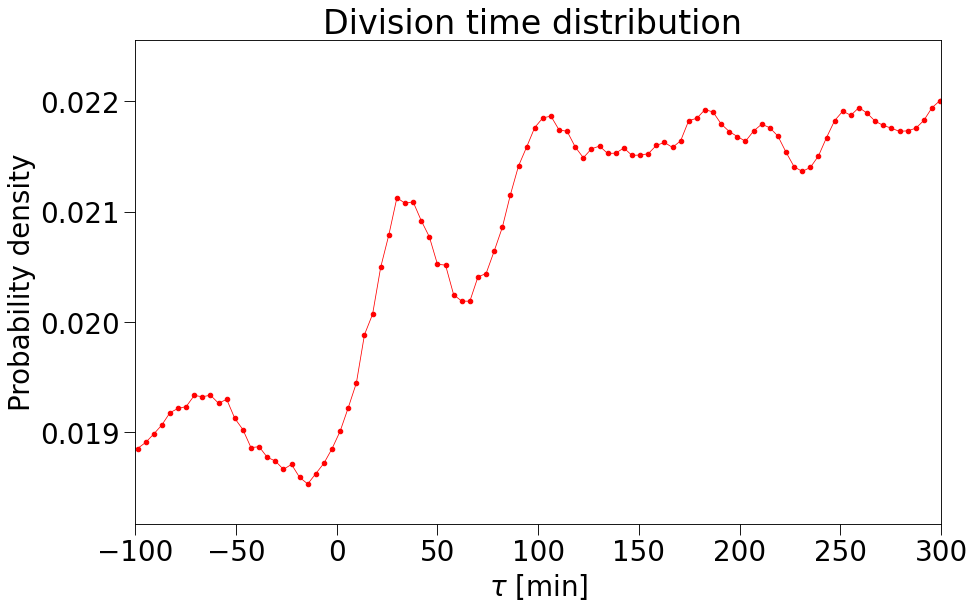

In [119]:
fig=plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel(r"$\tau$ [min]", fontsize=25)
ax.set_ylabel('Probability density', fontsize=25)
ax.set_xlim(-100,300)

ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Division time distribution ', fontsize=30)


#ax.set_xlim(-100,400)



ax.plot(np.linspace(-300,400,len(growth_mean_p1longori_u)),np.array(growth_mean_p1ori_u),
        'ro-',markersize=4, linewidth=0.7, label= 'p1longori unified replicas')



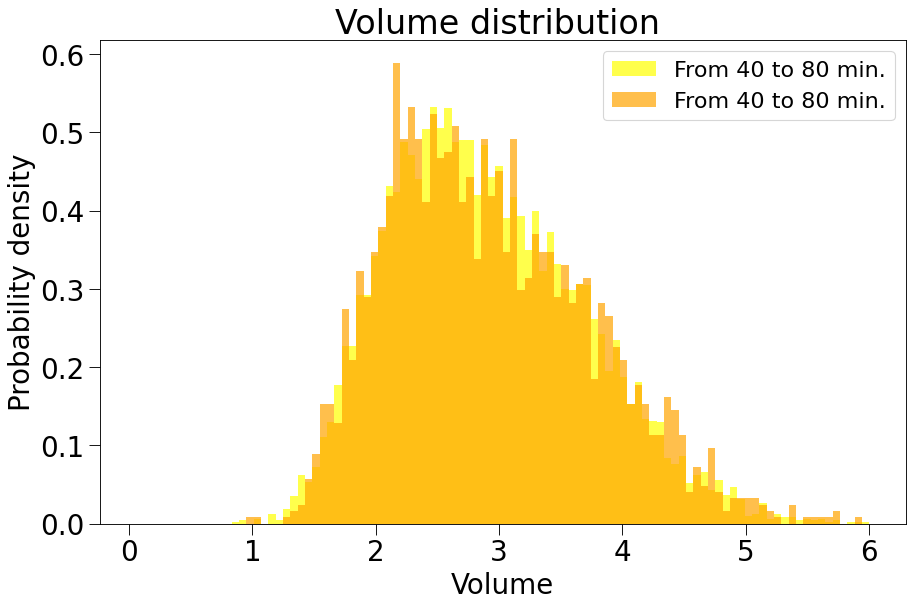

In [120]:
fig=plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Volume", fontsize=25)
ax.set_ylabel('Probability density', fontsize=25)
#ax.set_xlim(-100,300)

ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Volume distribution ', fontsize=30)


#ax.set_xlim(-100,400)


#h1=ax.hist(unified_p1ori_new[(unified_p1ori_new.tTrans>0)& (unified_p1ori_new.tTrans<40)].V , bins=100
#           ,density=True, range=(df_p1ori_div_u.V.min(),6),color='cyan', 
#           label='From 0 to 40 min.')
#h2=ax.hist(unified_p1ori_new[(unified_p1ori_new.tTrans>40)& (unified_p1ori_new.tTrans<80)].V , bins=100
#           ,density=True, range=(df_p1ori_div_u.V.min(),6),color='dodgerblue', alpha=0.7,
#           label='From 40 to 80 min.')
h2=ax.hist(unified_p1ori_new[(unified_p1ori_new.tTrans>80)& (unified_p1ori_new.tTrans<120)].V , bins=100
           ,density=True, range=(df_p1ori_div_u.V.min(),6),color='yellow', alpha=0.7,
           label='From 40 to 80 min.')
h2=ax.hist(unified_p1ori_new[(unified_p1ori_new.tTrans>120)& (unified_p1ori_new.tTrans<130)].V , bins=100
           ,density=True, range=(df_p1ori_div_u.V.min(),6),color='orange', alpha=0.7,
           label='From 40 to 80 min.')
ax.legend(fontsize=20)

In [121]:
volume_prova_u=bin_mean(df_p1ori_div_u.tTrans,(df_p1ori_div_u.V),4,20,-300,400,interval='custom')

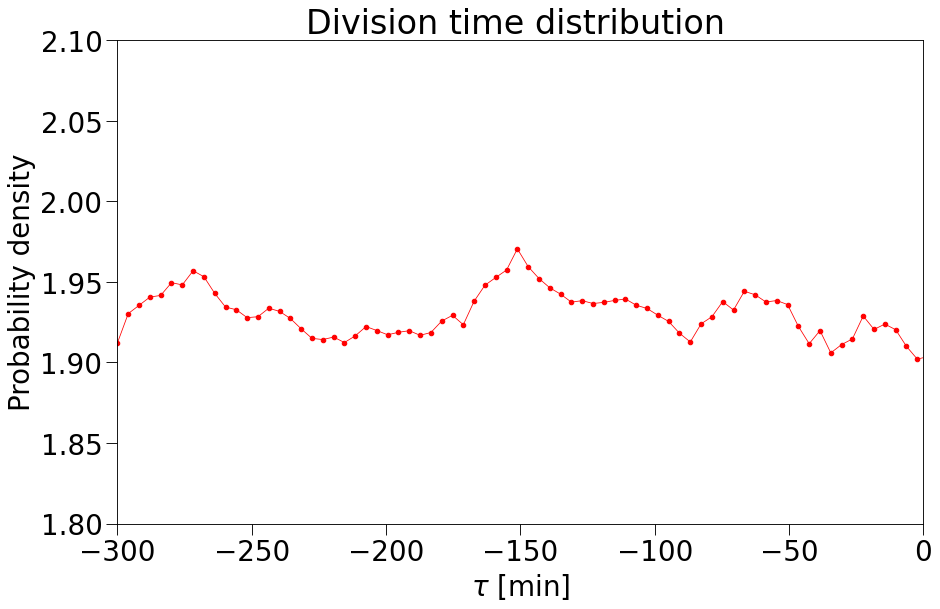

In [122]:
fig=plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel(r"$\tau$ [min]", fontsize=25)
ax.set_ylabel('Probability density', fontsize=25)


ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Division time distribution ', fontsize=30)


ax.set_xlim(-300,0)
ax.set_ylim(1.8,2.1)



ax.plot(np.linspace(-300,400,len(volume_mean_p1longori_1)),np.array(volume_mean_p1longori_u),
        'ro-',markersize=4, linewidth=0.7, label= 'p1longori unified replicas')




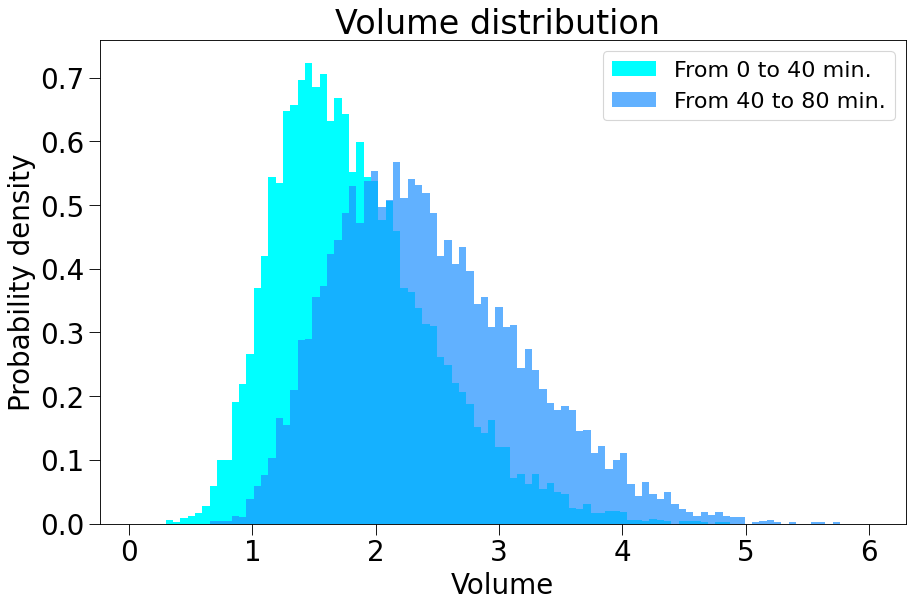

In [123]:
fig=plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Volume", fontsize=25)
ax.set_ylabel('Probability density', fontsize=25)
#ax.set_xlim(-100,300)

ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Volume distribution ', fontsize=30)


#ax.set_xlim(-100,400)


h1=ax.hist(unified_p1ori_new[(unified_p1ori_new.tTrans>0)& (unified_p1ori_new.tTrans<40)].V , bins=100
           ,density=True, range=(df_p1ori_div_u.V.min(),6),color='cyan', 
           label='From 0 to 40 min.')
h2=ax.hist(unified_p1ori_new[(unified_p1ori_new.tTrans>40)& (unified_p1ori_new.tTrans<80)].V , bins=100
           ,density=True, range=(df_p1ori_div_u.V.min(),6),color='dodgerblue', alpha=0.7,
           label='From 40 to 80 min.')
ax.legend(fontsize=20)

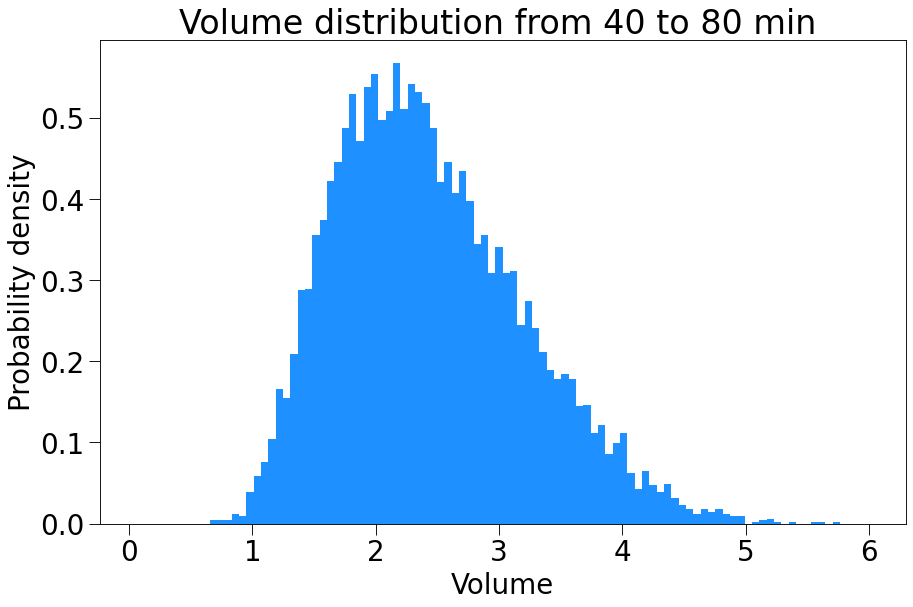

In [124]:
fig=plt.figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Volume", fontsize=25)
ax.set_ylabel('Probability density', fontsize=25)
#ax.set_xlim(-100,300)

ax.tick_params(which='major', length=10, labelsize=25)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_title('Volume distribution from 40 to 80 min ', fontsize=30)


#ax.set_xlim(-100,400)

#unified_p1ori_new.V
h1=ax.hist(unified_p1ori_new[(unified_p1ori_new.tTrans>40)& (unified_p1ori_new.tTrans<80)].V , bins=100
           ,density=True, range=(df_p1ori_div_u.V.min(),6),color='dodgerblue',label=r'p5ter $\tau$ distr.')


# CALCOLO  DI $\sigma$, tramite equazione $\sigma$=$\lambda_bs /\phi_R$. 

In [125]:
#calcolo sigma
sigma_p1lo_p5o=(growth_mean_p1longori_u/p1lo_p5o_phi_r)
sigma_p1lo_p5t=(growth_mean_p1longori_u/p1lo_p5t_phi_r)
sigma_p1o_p5o=(growth_mean_p1ori_u/p1o_p5o_phi_r)
sigma_p1o_p5t=(growth_mean_p1ori_u/p1o_p5t_phi_r)
sigma2_p1lo_p5t=(growth_mean_p5ter_u/p1lo_p5t_phi_r)
sigma2_p1o_p5t=(growth_mean_p5ter_u/p1o_p5t_phi_r)


In [126]:
#creo 2 dataset che contengano i dati bin-mediati per organizzare meglio i plot
p1longori_mean_df=pd.DataFrame({'time':np.linspace(-300,400,len(growth_mean_p1longori_u)), 'growth_rate': growth_mean_p1longori_u,'p1lo_p5t_phi_r': p1lo_p5t_phi_r, 'sigma_p1lo_p5t': sigma_p1lo_p5t,'p1lo_p5o_phi_r': p1lo_p5o_phi_r,'sigma_p1lo_p5o': sigma_p1lo_p5o, 'sigma2_p1lo_p5t': sigma2_p1lo_p5t})
p1ori_mean_df=pd.DataFrame({'time':np.linspace(-300,400,len(growth_mean_p1ori_u)), 'growth_rate': growth_mean_p1ori_u,'p1o_p5t_phi_r': p1o_p5t_phi_r, 'sigma_p1o_p5t': sigma_p1o_p5t,'p1o_p5o_phi_r': p1o_p5o_phi_r,'sigma_p1o_p5o': sigma_p1o_p5o,'sigma2_p1o_p5t': sigma2_p1o_p5t})


# CALCOLO E PLOT DI $\chi_R$

In [127]:
p1longori_d_phi_r=derivata(np.linspace(-300,400,len(growth_mean_p1ori_u)),p1longori_mean_df.p1lo_p5t_phi_r)

p1longori_mean_df=p1longori_mean_df.join(pd.Series(p1longori_d_phi_r, name= 'd_phi_r'))

p1longori_chi1_r=((1/(p1longori_mean_df.sigma_p1lo_p5t*p1longori_mean_df.p1lo_p5t_phi_r))*p1longori_mean_df.d_phi_r)+p1longori_mean_df.p1lo_p5t_phi_r

p1longori_mean_df=p1longori_mean_df.join(pd.Series(p1longori_chi1_r, name= 'chi1_r'))

p1longori_chi2_r=((1/(p1longori_mean_df.sigma2_p1lo_p5t*p1longori_mean_df.p1lo_p5t_phi_r))*p1longori_mean_df.d_phi_r)+p1longori_mean_df.p1lo_p5t_phi_r

p1longori_mean_df=p1longori_mean_df.join(pd.Series(p1longori_chi2_r, name= 'chi2_r'))


In [128]:
p1longori_mean_df.to_csv(growth_path+'p1longori_bin_mean.csv')

In [129]:
p1ori_d_phi_r=derivata(np.linspace(-300,400,len(growth_mean_p1ori_u)),p1ori_mean_df.p1o_p5t_phi_r)

p1ori_mean_df=p1ori_mean_df.join(pd.Series(p1ori_d_phi_r, name= 'd_phi_r'))

p1ori_chi_r=((1/(p1ori_mean_df.sigma_p1o_p5t*p1ori_mean_df.p1o_p5t_phi_r))*p1ori_mean_df.d_phi_r)+p1ori_mean_df.p1o_p5t_phi_r

p1ori_mean_df=p1ori_mean_df.join(pd.Series(p1ori_chi_r, name= 'chi_r'))

p1ori_chi2_r=((1/(p1ori_mean_df.sigma2_p1o_p5t*p1ori_mean_df.p1o_p5t_phi_r))*p1ori_mean_df.d_phi_r)+p1ori_mean_df.p1o_p5t_phi_r

p1ori_mean_df=p1ori_mean_df.join(pd.Series(p1ori_chi2_r, name= 'chi2_r'))

In [130]:
p1ori_mean_df.to_csv(growth_path+'p1ori_bin_mean.csv')

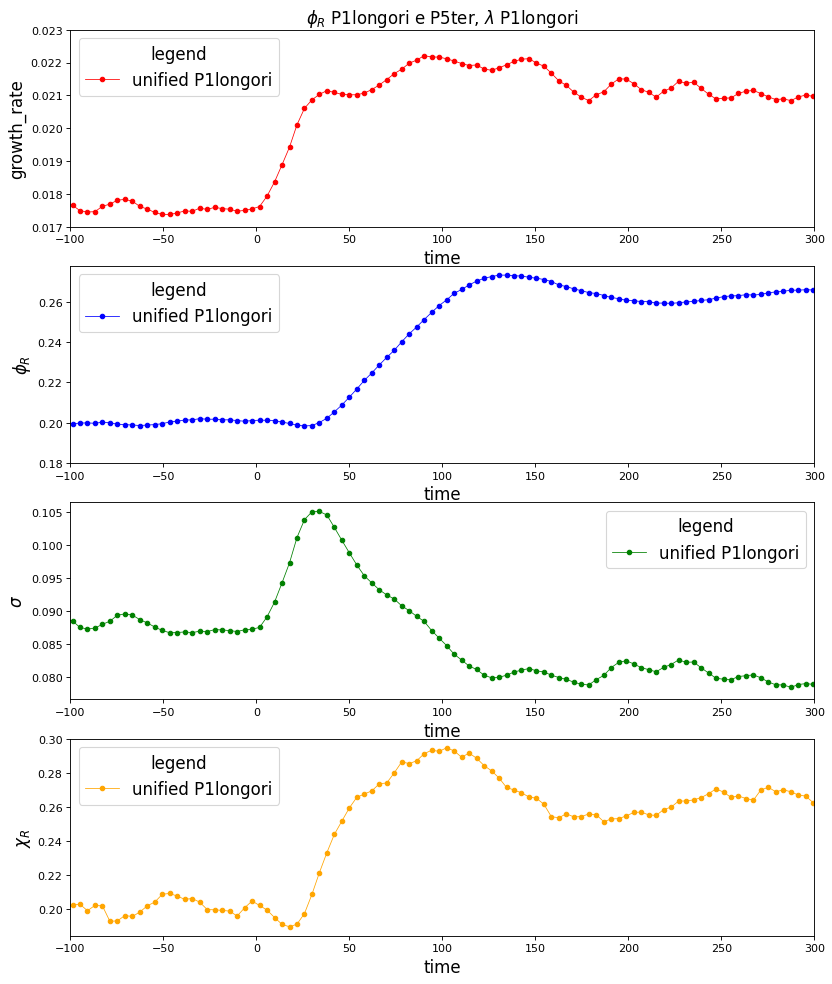

In [131]:
fig=plt.figure(num=None, figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3= fig.add_subplot(4,1,3)
ax4= fig.add_subplot(4,1,4)

ax1.set_title('$\phi_R$ P1longori e P5ter, $\lambda$ P1longori', fontsize=15)

ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('growth_rate', fontsize=15)

ax2.set_xlabel("time", fontsize=15)
ax2.set_ylabel('$\phi_R$', fontsize=15)

ax3.set_xlabel("time", fontsize=15)
ax3.set_ylabel('$\sigma$', fontsize=15)

ax4.set_xlabel("time", fontsize=15)
ax4.set_ylabel('$\chi_R$', fontsize=15)

ax1.set_xlim(-100,300)
ax2.set_xlim(-100,300)
ax3.set_xlim(-100,300)
ax4.set_xlim(-100,300)


ax1.set_ylim(0.017,0.023)

ax1.plot(np.linspace(-300,400,len(p1longori_mean_df)),growth_mean_p1longori_u, 'ro-',markersize=4, linewidth=0.7, label= 'unified P1longori')
ax2.plot(np.linspace(-300,400,len(p1longori_mean_df)),p1longori_mean_df.p1lo_p5t_phi_r, 'bo-',markersize=4, linewidth=0.7, label= 'unified P1longori')
ax3.plot(np.linspace(-300,400,len(p1longori_mean_df)),p1longori_mean_df.sigma_p1lo_p5t, 'go-',markersize=4, linewidth=0.7, label= 'unified P1longori')
ax4.plot(np.linspace(-300,400,len(p1longori_mean_df)),p1longori_mean_df.chi1_r, 'o-',color='orange',markersize=4, linewidth=0.7, label= 'unified P1longori')


ax1.legend(fontsize=15, title='legend',title_fontsize=15)
ax2.legend(fontsize=15, title='legend',title_fontsize=15)
ax3.legend(fontsize=15, title='legend',title_fontsize=15)
ax4.legend(fontsize=15, title='legend',title_fontsize=15)


plt.savefig('/home/valerio/tesi/plot_venerdi/tot1')

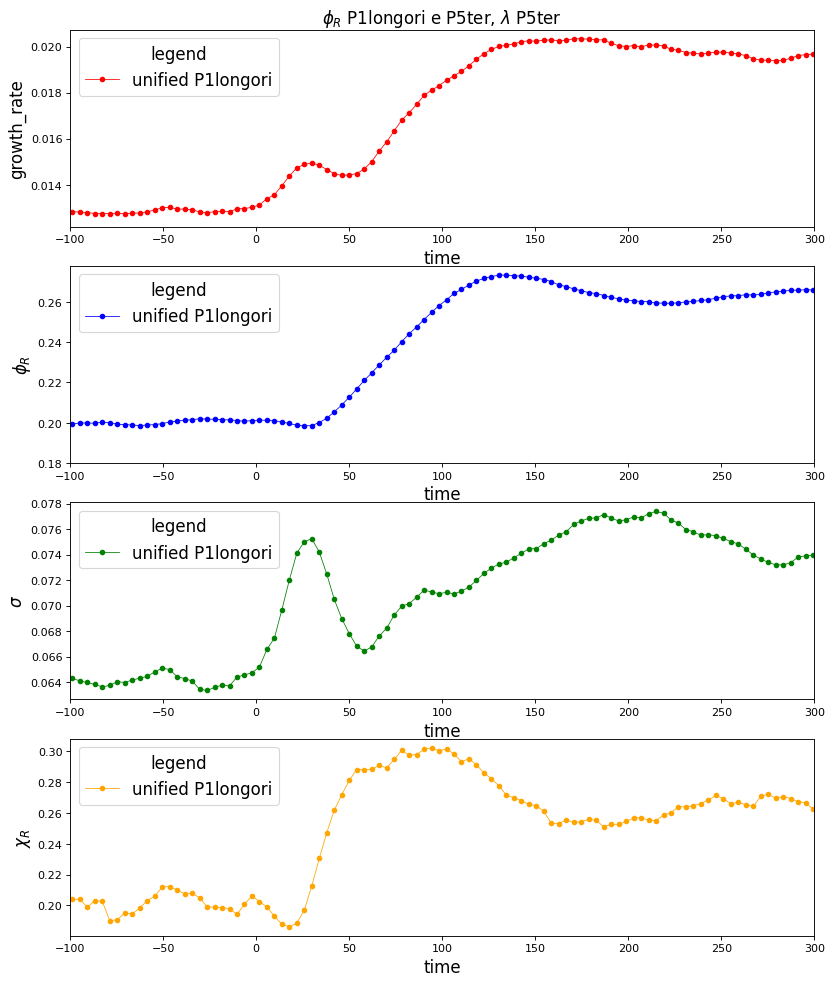

In [132]:
fig=plt.figure(num=None, figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3= fig.add_subplot(4,1,3)
ax4= fig.add_subplot(4,1,4)

ax1.set_title('$\phi_R$ P1longori e P5ter, $\lambda$ P5ter', fontsize=15)

ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('growth_rate', fontsize=15)

ax2.set_xlabel("time", fontsize=15)
ax2.set_ylabel('$\phi_R$', fontsize=15)

ax3.set_xlabel("time", fontsize=15)
ax3.set_ylabel('$\sigma$', fontsize=15)

ax4.set_xlabel("time", fontsize=15)
ax4.set_ylabel('$\chi_R$', fontsize=15)

ax1.set_xlim(-100,300)
ax2.set_xlim(-100,300)
ax3.set_xlim(-100,300)
ax4.set_xlim(-100,300)


#ax1.set_ylim(0.017,0.023)

ax1.plot(np.linspace(-300,400,len(p1longori_mean_df)),growth_mean_p5ter_u, 'ro-',markersize=4, linewidth=0.7, label= 'unified P1longori')
ax2.plot(np.linspace(-300,400,len(p1longori_mean_df)),p1longori_mean_df.p1lo_p5t_phi_r, 'bo-',markersize=4, linewidth=0.7, label= 'unified P1longori')
ax3.plot(np.linspace(-300,400,len(p1longori_mean_df)),p1longori_mean_df.sigma2_p1lo_p5t, 'go-',markersize=4, linewidth=0.7, label= 'unified P1longori')
ax4.plot(np.linspace(-300,400,len(p1longori_mean_df)),p1longori_mean_df.chi2_r, 'o-',color='orange',markersize=4, linewidth=0.7, label= 'unified P1longori')


ax1.legend(fontsize=15, title='legend',title_fontsize=15)
ax2.legend(fontsize=15, title='legend',title_fontsize=15)
ax3.legend(fontsize=15, title='legend',title_fontsize=15)
ax4.legend(fontsize=15, title='legend',title_fontsize=15)

plt.savefig('/home/valerio/tesi/plot_venerdi/tot2.pdf')

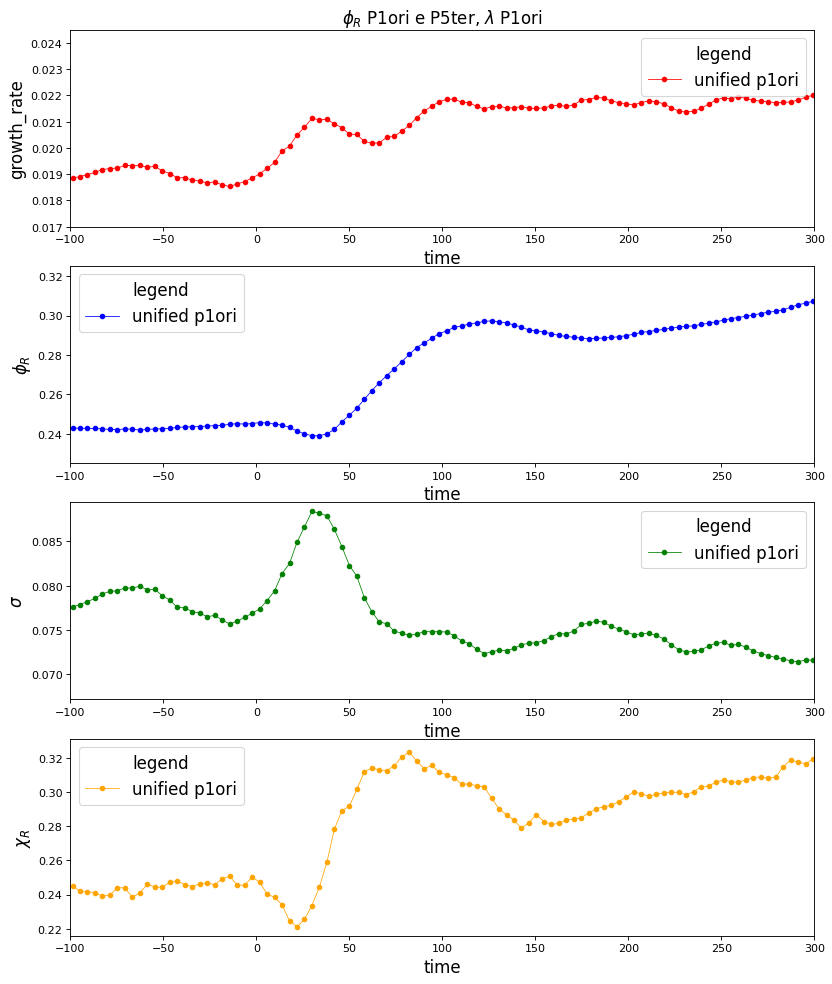

In [133]:
fig=plt.figure(num=None, figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3= fig.add_subplot(4,1,3)
ax4= fig.add_subplot(4,1,4)

ax1.set_title('$\phi_R$ P1ori e P5ter, $\lambda$ P1ori', fontsize=15)

ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('growth_rate', fontsize=15)

ax2.set_xlabel("time", fontsize=15)
ax2.set_ylabel('$\phi_R$', fontsize=15)

ax3.set_xlabel("time", fontsize=15)
ax3.set_ylabel('$\sigma$', fontsize=15)

ax4.set_xlabel("time", fontsize=15)
ax4.set_ylabel('$\chi_R$', fontsize=15)

ax1.set_xlim(-100,300)
ax2.set_xlim(-100,300)
ax3.set_xlim(-100,300)
ax4.set_xlim(-100,300)

ax1.set_ylim(0.017,0.0245)

ax1.plot(np.linspace(-300,400,len(p1ori_mean_df)),p1ori_mean_df.growth_rate, 'ro-',markersize=4, linewidth=0.7, label= 'unified p1ori')
ax2.plot(np.linspace(-300,400,len(p1ori_mean_df)),p1ori_mean_df.p1o_p5t_phi_r, 'bo-',markersize=4, linewidth=0.7, label= 'unified p1ori')
ax3.plot(np.linspace(-300,400,len(p1ori_mean_df)),p1ori_mean_df.sigma_p1o_p5t, 'go-',markersize=4, linewidth=0.7, label= 'unified p1ori')
ax4.plot(np.linspace(-300,400,len(p1ori_mean_df)),p1ori_mean_df.chi_r, 'o-',color='orange',markersize=4, linewidth=0.7, label= 'unified p1ori')



ax1.legend(fontsize=15, title='legend',title_fontsize=15)
ax2.legend(fontsize=15, title='legend',title_fontsize=15)
ax3.legend(fontsize=15, title='legend',title_fontsize=15)
ax4.legend(fontsize=15, title='legend',title_fontsize=15)


plt.savefig('/home/valerio/tesi/plot_venerdi/tot3')

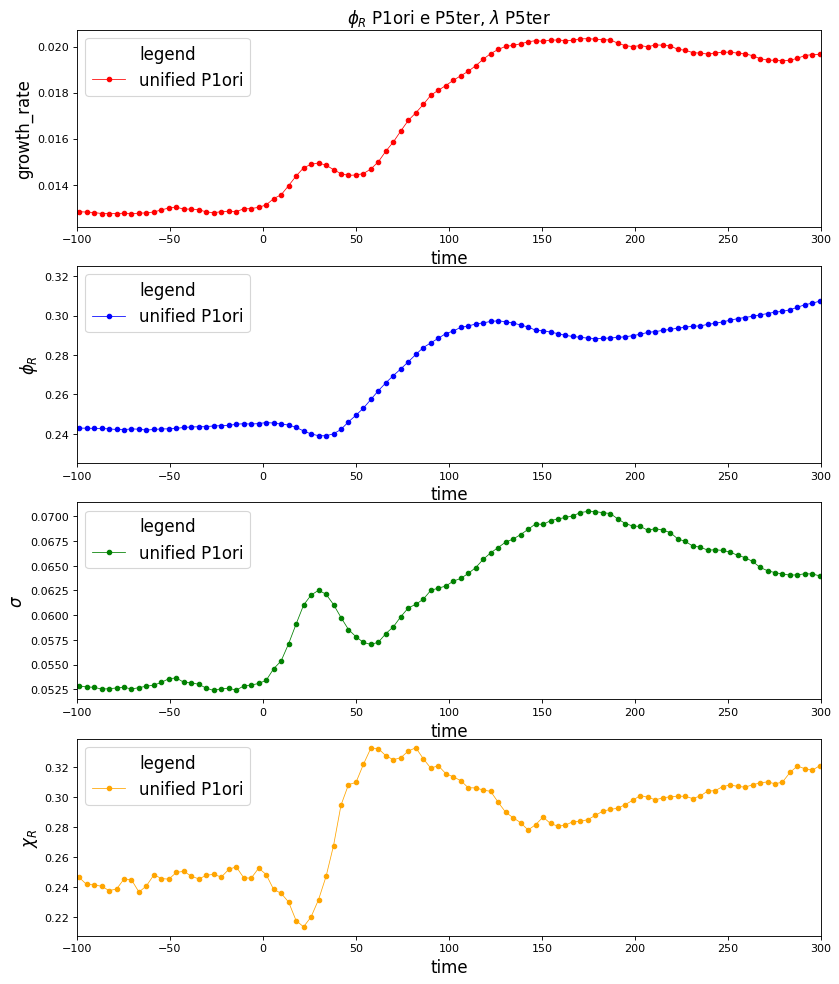

In [134]:
fig=plt.figure(num=None, figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3= fig.add_subplot(4,1,3)
ax4= fig.add_subplot(4,1,4)

ax1.set_title('$\phi_R$ P1ori e P5ter, $\lambda$ P5ter', fontsize=15)

ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('growth_rate', fontsize=15)

ax2.set_xlabel("time", fontsize=15)
ax2.set_ylabel('$\phi_R$', fontsize=15)

ax3.set_xlabel("time", fontsize=15)
ax3.set_ylabel('$\sigma$', fontsize=15)

ax4.set_xlabel("time", fontsize=15)
ax4.set_ylabel('$\chi_R$', fontsize=15)

ax1.set_xlim(-100,300)
ax2.set_xlim(-100,300)
ax3.set_xlim(-100,300)
ax4.set_xlim(-100,300)


#ax1.set_ylim(0.017,0.023)

ax1.plot(np.linspace(-300,400,len(p1longori_mean_df)),growth_mean_p5ter_u, 'ro-',markersize=4, linewidth=0.7, label= 'unified P1ori')
ax2.plot(np.linspace(-300,400,len(p1longori_mean_df)),p1ori_mean_df.p1o_p5t_phi_r, 'bo-',markersize=4, linewidth=0.7, label= 'unified P1ori')
ax3.plot(np.linspace(-300,400,len(p1longori_mean_df)),p1ori_mean_df.sigma2_p1o_p5t, 'go-',markersize=4, linewidth=0.7, label= 'unified P1ori')
ax4.plot(np.linspace(-300,400,len(p1longori_mean_df)),p1ori_mean_df.chi2_r, 'o-',color='orange',markersize=4, linewidth=0.7, label= 'unified P1ori')


ax1.legend(fontsize=15, title='legend',title_fontsize=15)
ax2.legend(fontsize=15, title='legend',title_fontsize=15)
ax3.legend(fontsize=15, title='legend',title_fontsize=15)
ax4.legend(fontsize=15, title='legend',title_fontsize=15)


plt.savefig('/home/valerio/tesi/plot_venerdi/tot4')

# PROVO AD APPLICARE LE NOSTRE EQUAZIONI AI DATI DI ERIKSON


In [ ]:
eriksondf=pd.read_csv('/home/valerio/tesi/eriksondf.csv')

eriksondf['lambda']=eriksondf['lambda']/60
eriksondf['tempo']=eriksondf['tempo']*60


erikson_d_phi_r=derivata3(eriksondf.tempo,eriksondf.phi_r)

eriksondf=eriksondf.join(pd.Series(erikson_d_phi_r,name='d_phi_r'))

erikson_sigma=eriksondf['lambda']/eriksondf.phi_r

eriksondf=eriksondf.join(pd.Series(erikson_sigma,name='sigma'))

erikson_chi_r=((1/(eriksondf.sigma*eriksondf.phi_r))*eriksondf.d_phi_r)+eriksondf.phi_r

eriksondf=eriksondf.join(pd.Series(erikson_chi_r,name='chi_r'))

In [ ]:
eriksondf

In [ ]:
fig=plt.figure(num=None, figsize=(9, 11), dpi=80, facecolor='w', edgecolor='k')


ax1= fig.add_subplot(4,1,1)
#ax1.set_xlim(-100,300)
ax2 = fig.add_subplot(4,1,2,sharex=ax1)
ax3= fig.add_subplot(4,1,3,sharex=ax1)
ax4= fig.add_subplot(4,1,4,sharex=ax1)


#ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('$\lambda_{bs}$', fontsize=25)

#ax2.set_xlabel("time", fontsize=15)
ax2.set_ylabel('$\phi_R$', fontsize=25)

#ax3.set_xlabel("time", fontsize=15)
ax3.set_ylabel('$\sigma$', fontsize=25)

ax4.set_xlabel("time", fontsize=25)
ax4.set_ylabel('$\chi_R$', fontsize=25)


ax1.plot(eriksondf.tempo,eriksondf.phi_r, color='dodgerblue', linewidth=3)

ax2.plot(eriksondf.tempo, eriksondf['lambda'],color='blue', linewidth=4)

ax3.plot(eriksondf.tempo, eriksondf.sigma,color='green', linewidth=4)

ax4.plot(eriksondf.tempo, eriksondf.chi_r,color='black', linewidth=4)





In [ ]:
#eriksondf

In [ ]:

fig10=plt.figure(num=None, figsize=(15,8), dpi=80, facecolor='w', edgecolor='k')
gs1=fig10.add_gridspec(2,2)
ax1=fig10.add_subplot(gs1[:,0])
ax2=fig10.add_subplot(gs1[0,1])
ax3=fig10.add_subplot(gs1[1,1])

ax1.tick_params(which='major', length=10, labelsize=20)
ax2.tick_params(which='major', length=10, labelsize=20)
ax3.tick_params(which='major', length=10, labelsize=20)

ax1.set_title('Scatterplot $\chi_R$ vs $\sigma$ Erikson', fontsize=25)
ax2.set_title('Temporal series $\chi_R$ and $\sigma$ Erikson', fontsize=25)

cm= plt.cm.get_cmap('jet')


#ax2.set_xlim(-100,300)

ax3.set_xlabel("time", fontsize=30)
ax1.set_xlabel('$\sigma$', fontsize=35)
ax1.set_ylabel('$\chi_R$', fontsize=35)

ax3.plot(eriksondf.tempo,eriksondf.sigma, 'g-', linewidth=4)
ax2.plot(eriksondf.tempo,eriksondf.chi_r, '-',color='orange', linewidth=4)
#ax1.plot(eriksondf.sigma,eriksondf.chi_r, '-',color='orange', linewidth=4)

sc=ax1.scatter(eriksondf.sigma, eriksondf.chi_r,c=eriksondf.tempo, cmap='jet')
plt.colorbar(sc,ax=ax1, ticks=np.linspace(-100,400,11))

ax3.axvline(x=0, linestyle='--', color='grey')
ax2.axvline(x=0, linestyle='--', color='grey')

ax3.text(200,0.0950,'$\sigma$', fontsize=40)
ax2.text(200,0.1,'$\chi_R$', fontsize=40)

In [ ]:
eriksondf2=pd.read_csv('/home/valerio/tesi/eriksonproxy.csv')



#erikson2_proxy_r=derivata_sg(eriksondf2.mass_rna,eriksondf2.rna)
#erikson2_proxy_p=derivata_sg(eriksondf2.mass_placz,eriksondf2.placz)

eriksondf2_proxy_r=(eriksondf2.rna/eriksondf2.mass_rna)
eriksondf2_proxy_p=(eriksondf2.placz/eriksondf2.mass_placz)


eriksondf2=eriksondf2.join(pd.Series(eriksondf2_proxy_r,name='proxy_r'))
eriksondf2=eriksondf2.join(pd.Series(eriksondf2_proxy_p,name='proxy_p'))

#erikson_sigma=eriksondf['lambda']/eriksondf.phi_r

#eriksondf=eriksondf.join(pd.Series(erikson_sigma,name='sigma'))

#erikson_chi_r=((1/(eriksondf.sigma*eriksondf.phi_r))*eriksondf.d_phi_r)+eriksondf.phi_r

#eriksondf=eriksondf.join(pd.Series(erikson_chi_r,name='chi_r'))

In [ ]:
fluo_params_e,pcov_e=scipy.optimize.curve_fit(fit_func_fluo, eriksondf2.proxy_p, eriksondf2.proxy_r )
fluo_params_e

In [ ]:
eriksondf2_phi_r=fluo_params_e[0]*eriksondf2.proxy_r
eriksondf2_phi_p=fluo_params_e[1]*eriksondf2.proxy_p

In [ ]:
fig=plt.figure(num=None, figsize=(9, 11), dpi=80, facecolor='w', edgecolor='k')


ax1= fig.add_subplot(4,1,1)
#ax1.set_xlim(-100,300)
ax2 = fig.add_subplot(4,1,2)
ax3= fig.add_subplot(4,1,3)
ax4= fig.add_subplot(4,1,4)
ax4.set_ylim(0.35,0.75)

#ax1.set_xlabel("time", fontsize=15)
ax1.set_ylabel('$\phi_r$', fontsize=25)

#ax2.set_xlabel("time", fontsize=15)
#ax2.set_ylabel('$\phi_R$', fontsize=25)

#ax3.set_xlabel("time", fontsize=15)
#ax3.set_ylabel('$\sigma$', fontsize=25)

#ax4.set_xlabel("time", fontsize=25)
#ax4.set_ylabel('$\chi_R$', fontsize=25)


ax1.plot(np.linspace(-2,2.5,len(eriksondf2_phi_r)),eriksondf2_phi_r,'o-',  linewidth=3)
ax1.plot(np.linspace(-2,2.5,len(eriksondf2_phi_r)),eriksondf2_phi_p,'o-', color='dodgerblue', linewidth=3)
ax4.plot(np.linspace(-2,2.5,len(eriksondf2_phi_r)),eriksondf2_phi_p+eriksondf2_phi_r,'o-', color='dodgerblue', linewidth=3)


ax2.plot(eriksondf2.mass_rna, eriksondf2.rna,'o',color='blue', linewidth=4)
ax3.plot(eriksondf2.mass_placz, eriksondf2.placz,'o',color='blue', linewidth=4)

#ax3.plot(eriksondf.tempo, eriksondf.sigma,color='green', linewidth=4)

#ax4.plot(eriksondf.tempo, eriksondf.chi_r,color='black', linewidth=4)



